# Classification Task
Implementation of a classification task for the MNIST dataset

# Simple Model

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision

import pandas as pd
import matplotlib.pyplot as plt
import math as mt

from sklearn.model_selection import KFold
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms

Download of the MNIST dataset

In [ ]:
train_dataset = torchvision.datasets.MNIST('classifier_data', train=True, download=True)
test_dataset  = torchvision.datasets.MNIST('classifier_data', train=False, download=True)

Extracting classifier_data/MNIST/raw/train-images-idx3-ubyte.gz to classifier_data/MNIST/raw


Extracting classifier_data/MNIST/raw/train-labels-idx1-ubyte.gz to classifier_data/MNIST/raw


Extracting classifier_data/MNIST/raw/t10k-images-idx3-ubyte.gz to classifier_data/MNIST/raw




Extracting classifier_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to classifier_data/MNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


## Net
Definition of the network processing the image

In [ ]:
class Net(nn.Module):

  def __init__(self, Ni, Nh1, Nh2, No, act_h):
    """
    Ni - number of input units
    Nh1 - number of hidden units 1st layer
    Nh2 - number of hidden units 2nd layer
    Nh3 - number of hidden units 3rd layer
    No - number of output units (correspond to the number of classes)
    """
    super().__init__()

    print("NETWORK INITIALIZATION")
    # Activation functions for the hidden layers
    if act_h=='Lk':
      self.act_h=nn.LeakyReLU()
    elif act_h=='Ge':
      self.act_h=nn.GELU()
    elif act_h=='SiL':
      self.act_h=nn.SiLU()
    elif act_h=='Se':
      self.act_h=nn.SELU()
    elif act_h=='Si':
      self.act_h=nn.Sigmoid()

    self.fc1=nn.Linear(Ni,Nh1)
    self.fc2=nn.Linear(Nh1,Nh2)
    self.out=nn.Linear(Nh2,No)

  def forward(self,x,additional_out=False):
    x=self.act_h(self.fc1(x))
    x=self.act_h(self.fc2(x))
    out=self.out(x)
    return out

## Network Definition
We initialize the different parameters defining the network. Instead, the optimizers will be defined within the training loop, as each new model will use one of three possible optimizers (namely, Adam, AdamW, and Adagrad)

In [ ]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print(f"Training device: {device}")

torch.manual_seed(2)
Ni=784
Nh1=150
Nh2=150
No=10

Training device: cuda


In [ ]:
# Definition of the Loss Functions
Loss_Function=nn.CrossEntropyLoss()

## Transformations for the Training and Test Dataset
Definition of the transformations to apply on the training and test dataset.


In [ ]:
training_transf=transforms.Compose([transforms.ToTensor(),])
test_trasnf=transforms.Compose([transforms.ToTensor(),])

## Training Loop
Notice that we impose an early stopping condition on the training (stochastic in nature - using statistics from the training loss)

NETWORK INITIALIZATION
--------------------
Iteration: 0
--------------------
Avg train loss: 1.509547472000122
Avg Validation Loss: 0.6723982691764832
--------------------
Iteration: 10
--------------------
Avg train loss: 0.2085067629814148
Avg Validation Loss: 0.1977342814207077
--------------------
Iteration: 20
--------------------
Avg train loss: 0.13403497636318207
Avg Validation Loss: 0.13915689289569855
--------------------
Iteration: 30
--------------------
Avg train loss: 0.09217740595340729
Avg Validation Loss: 0.10807152837514877
--------------------
Iteration: 40
--------------------
Avg train loss: 0.06499549746513367
Avg Validation Loss: 0.09391377121210098
--------------------
Iteration: 50
--------------------
Avg train loss: 0.04654602333903313
Avg Validation Loss: 0.0826321691274643
--------------------
Iteration: 60
--------------------
Avg train loss: 0.03363967314362526
Avg Validation Loss: 0.07945486158132553
--------------------
Iteration: 70
------------------

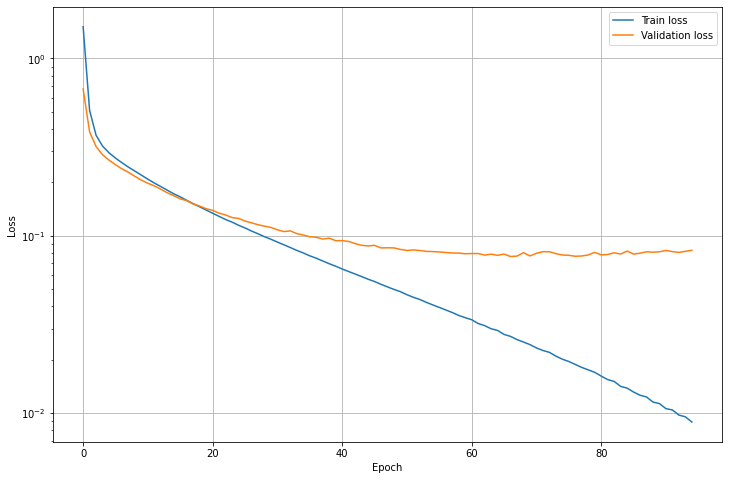

NETWORK INITIALIZATION
--------------------
Iteration: 0
--------------------
Avg train loss: 1.601792573928833
Avg Validation Loss: 0.7577927708625793
--------------------
Iteration: 10
--------------------
Avg train loss: 0.20833584666252136
Avg Validation Loss: 0.19703614711761475
--------------------
Iteration: 20
--------------------
Avg train loss: 0.1358780860900879
Avg Validation Loss: 0.14004871249198914
--------------------
Iteration: 30
--------------------
Avg train loss: 0.09648405015468597
Avg Validation Loss: 0.11159811168909073
--------------------
Iteration: 40
--------------------
Avg train loss: 0.0704893246293068
Avg Validation Loss: 0.09735693782567978
--------------------
Iteration: 50
--------------------
Avg train loss: 0.0518127866089344
Avg Validation Loss: 0.08824930340051651
--------------------
Iteration: 60
--------------------
Avg train loss: 0.03813239187002182
Avg Validation Loss: 0.08227262645959854
--------------------
Iteration: 70
------------------

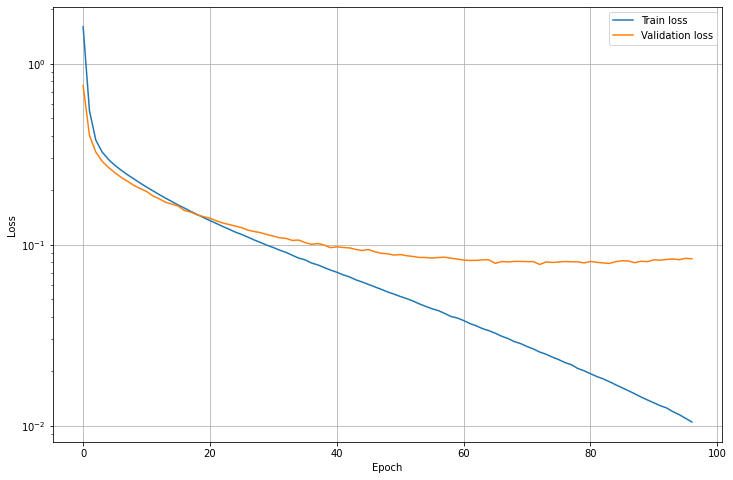

NETWORK INITIALIZATION
--------------------
Iteration: 0
--------------------
Avg train loss: 1.6326608657836914
Avg Validation Loss: 0.8090774416923523
--------------------
Iteration: 10
--------------------
Avg train loss: 0.21094344556331635
Avg Validation Loss: 0.198342427611351
--------------------
Iteration: 20
--------------------
Avg train loss: 0.13862796127796173
Avg Validation Loss: 0.14033247530460358
--------------------
Iteration: 30
--------------------
Avg train loss: 0.0979069322347641
Avg Validation Loss: 0.11242134124040604
--------------------
Iteration: 40
--------------------
Avg train loss: 0.07140126824378967
Avg Validation Loss: 0.09634121507406235
--------------------
Iteration: 50
--------------------
Avg train loss: 0.05333946645259857
Avg Validation Loss: 0.08813504129648209
--------------------
Iteration: 60
--------------------
Avg train loss: 0.03989385813474655
Avg Validation Loss: 0.08197840303182602
--------------------
Iteration: 70
-----------------

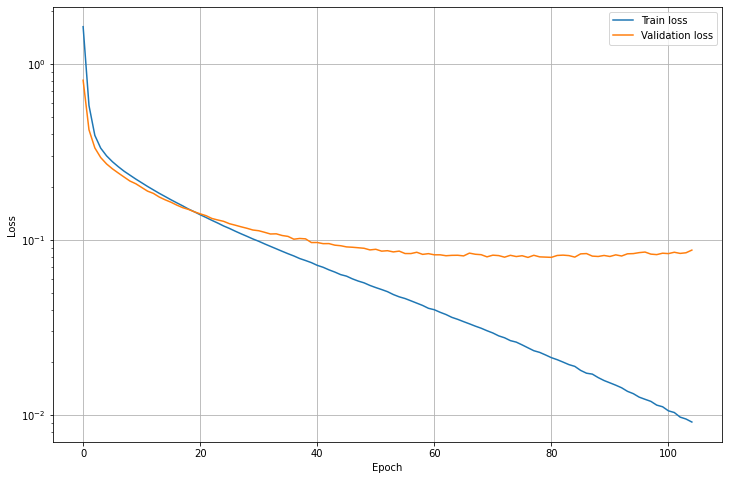

NETWORK INITIALIZATION
--------------------
Iteration: 0
--------------------
Avg train loss: 1.5038505792617798
Avg Validation Loss: 0.6790329813957214
--------------------
Iteration: 10
--------------------
Avg train loss: 0.20447859168052673
Avg Validation Loss: 0.19305473566055298
--------------------
Iteration: 20
--------------------
Avg train loss: 0.13357822597026825
Avg Validation Loss: 0.1362166553735733
--------------------
Iteration: 30
--------------------
Avg train loss: 0.09277048707008362
Avg Validation Loss: 0.10929713398218155
--------------------
Iteration: 40
--------------------
Avg train loss: 0.06708305329084396
Avg Validation Loss: 0.09487929195165634
--------------------
Iteration: 50
--------------------
Avg train loss: 0.04929003864526749
Avg Validation Loss: 0.08847183734178543
--------------------
Iteration: 60
--------------------
Avg train loss: 0.036049552261829376
Avg Validation Loss: 0.08345500379800797
--------------------
Iteration: 70
--------------

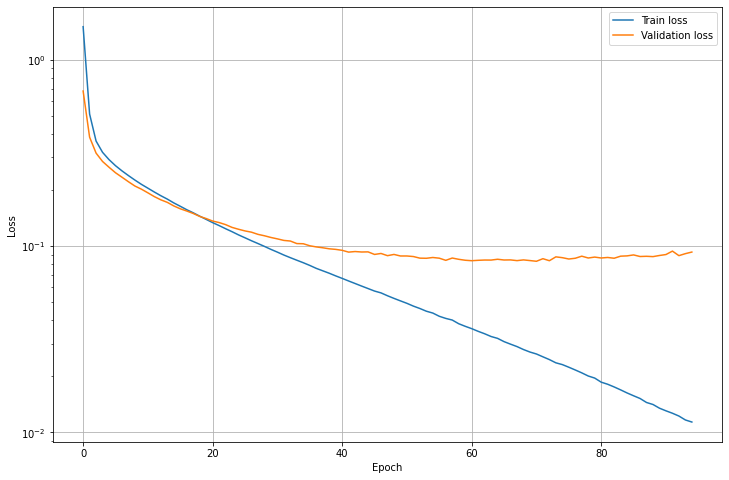

NETWORK INITIALIZATION
--------------------
Iteration: 0
--------------------
Avg train loss: 1.5579711198806763
Avg Validation Loss: 0.7318239212036133
--------------------
Iteration: 10
--------------------
Avg train loss: 0.2112436145544052
Avg Validation Loss: 0.19931888580322266
--------------------
Iteration: 20
--------------------
Avg train loss: 0.13907641172409058
Avg Validation Loss: 0.1400797963142395
--------------------
Iteration: 30
--------------------
Avg train loss: 0.09539560228586197
Avg Validation Loss: 0.11007895320653915
--------------------
Iteration: 40
--------------------
Avg train loss: 0.06785554438829422
Avg Validation Loss: 0.09374632686376572
--------------------
Iteration: 50
--------------------
Avg train loss: 0.04883534833788872
Avg Validation Loss: 0.08565942198038101
--------------------
Iteration: 60
--------------------
Avg train loss: 0.035619329661130905
Avg Validation Loss: 0.08279614895582199
--------------------
Iteration: 70
---------------

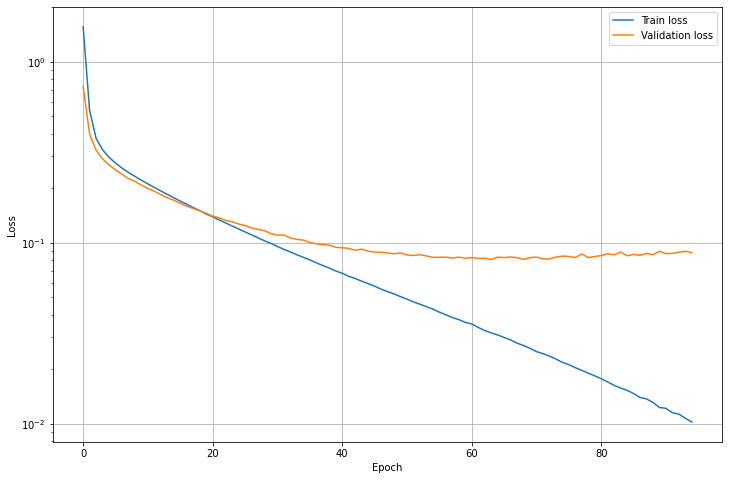

NETWORK INITIALIZATION
--------------------
Iteration: 0
--------------------
Avg train loss: 1.6187230348587036
Avg Validation Loss: 0.7910749316215515
--------------------
Iteration: 10
--------------------
Avg train loss: 0.22216515243053436
Avg Validation Loss: 0.2086210697889328
--------------------
Iteration: 20
--------------------
Avg train loss: 0.14679177105426788
Avg Validation Loss: 0.14658795297145844
--------------------
Iteration: 30
--------------------
Avg train loss: 0.10321316123008728
Avg Validation Loss: 0.11414223164319992
--------------------
Iteration: 40
--------------------
Avg train loss: 0.0743841677904129
Avg Validation Loss: 0.09646811336278915
--------------------
Iteration: 50
--------------------
Avg train loss: 0.054877422749996185
Avg Validation Loss: 0.08763895183801651
--------------------
Iteration: 60
--------------------
Avg train loss: 0.04016322270035744
Avg Validation Loss: 0.08087066560983658
--------------------
Iteration: 70
---------------

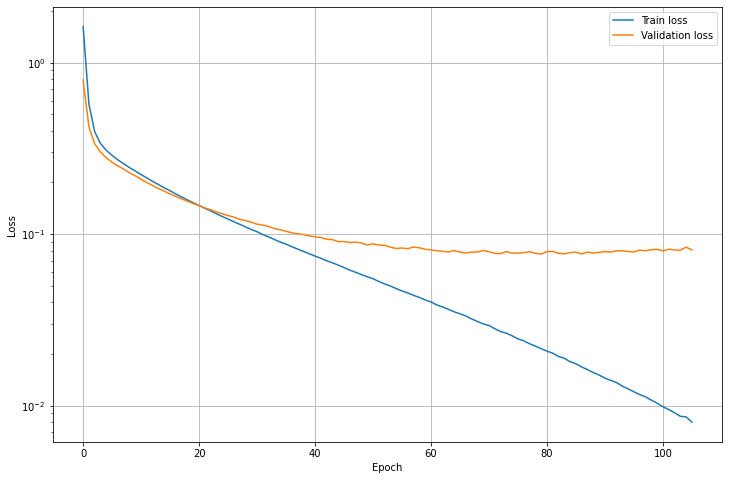

NETWORK INITIALIZATION
--------------------
Iteration: 0
--------------------
Avg train loss: 1.5063450336456299
Avg Validation Loss: 0.5976635813713074
--------------------
Iteration: 10
--------------------
Avg train loss: 0.21281670033931732
Avg Validation Loss: 0.219642773270607
--------------------
Iteration: 20
--------------------
Avg train loss: 0.14498844742774963
Avg Validation Loss: 0.16292667388916016
--------------------
Iteration: 30
--------------------
Avg train loss: 0.10358807444572449
Avg Validation Loss: 0.13465368747711182
--------------------
Iteration: 40
--------------------
Avg train loss: 0.07793556898832321
Avg Validation Loss: 0.11735562235116959
--------------------
Iteration: 50
--------------------
Avg train loss: 0.059528183192014694
Avg Validation Loss: 0.10178034752607346
--------------------
Iteration: 60
--------------------
Avg train loss: 0.04579293727874756
Avg Validation Loss: 0.0955720767378807
--------------------
Iteration: 70
----------------

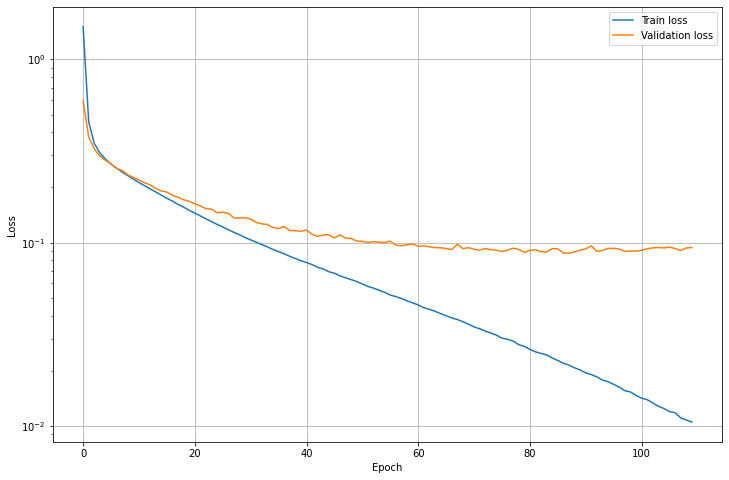

NETWORK INITIALIZATION
--------------------
Iteration: 0
--------------------
Avg train loss: 1.5725151300430298
Avg Validation Loss: 0.6536114811897278
--------------------
Iteration: 10
--------------------
Avg train loss: 0.22819118201732635
Avg Validation Loss: 0.23328757286071777
--------------------
Iteration: 20
--------------------
Avg train loss: 0.15548844635486603
Avg Validation Loss: 0.16848714649677277
--------------------
Iteration: 30
--------------------
Avg train loss: 0.11242596060037613
Avg Validation Loss: 0.13698093593120575
--------------------
Iteration: 40
--------------------
Avg train loss: 0.08415218442678452
Avg Validation Loss: 0.11524295806884766
--------------------
Iteration: 50
--------------------
Avg train loss: 0.06456772983074188
Avg Validation Loss: 0.10485247522592545
--------------------
Iteration: 60
--------------------
Avg train loss: 0.04961197450757027
Avg Validation Loss: 0.09798841923475266
--------------------
Iteration: 70
--------------

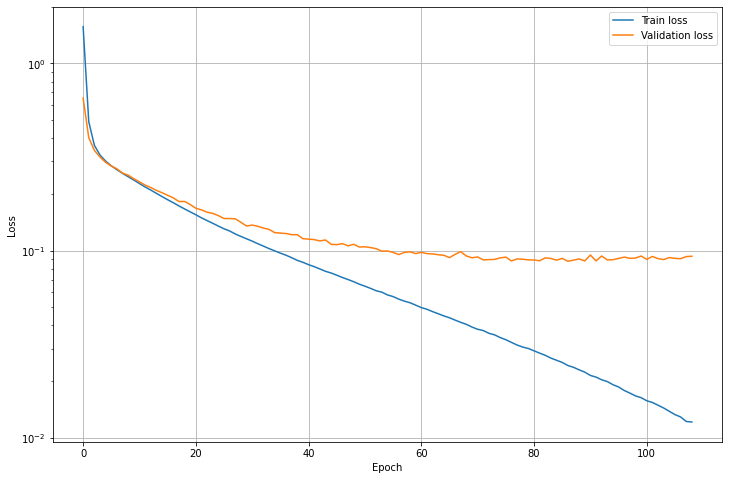

NETWORK INITIALIZATION
--------------------
Iteration: 0
--------------------
Avg train loss: 1.6293981075286865
Avg Validation Loss: 0.7102115750312805
--------------------
Iteration: 10
--------------------
Avg train loss: 0.23119522631168365
Avg Validation Loss: 0.23740242421627045
--------------------
Iteration: 20
--------------------
Avg train loss: 0.16285617649555206
Avg Validation Loss: 0.17780093848705292
--------------------
Iteration: 30
--------------------
Avg train loss: 0.12135916948318481
Avg Validation Loss: 0.14438451826572418
--------------------
Iteration: 40
--------------------
Avg train loss: 0.09273520112037659
Avg Validation Loss: 0.12194517999887466
--------------------
Iteration: 50
--------------------
Avg train loss: 0.07292292267084122
Avg Validation Loss: 0.11109409481287003
--------------------
Iteration: 60
--------------------
Avg train loss: 0.057427287101745605
Avg Validation Loss: 0.10478350520133972
--------------------
Iteration: 70
-------------

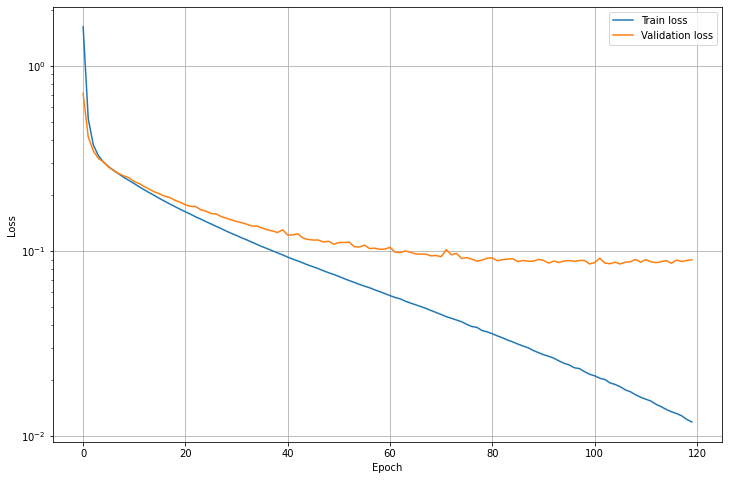

NETWORK INITIALIZATION
--------------------
Iteration: 0
--------------------
Avg train loss: 1.5084792375564575
Avg Validation Loss: 0.6018908619880676
--------------------
Iteration: 10
--------------------
Avg train loss: 0.21292394399642944
Avg Validation Loss: 0.2207353562116623
--------------------
Iteration: 20
--------------------
Avg train loss: 0.14826205372810364
Avg Validation Loss: 0.16949529945850372
--------------------
Iteration: 30
--------------------
Avg train loss: 0.10686110705137253
Avg Validation Loss: 0.13408899307250977
--------------------
Iteration: 40
--------------------
Avg train loss: 0.07961638271808624
Avg Validation Loss: 0.11558932811021805
--------------------
Iteration: 50
--------------------
Avg train loss: 0.06051921099424362
Avg Validation Loss: 0.10707574337720871
--------------------
Iteration: 60
--------------------
Avg train loss: 0.046095628291368484
Avg Validation Loss: 0.09968885779380798
--------------------
Iteration: 70
--------------

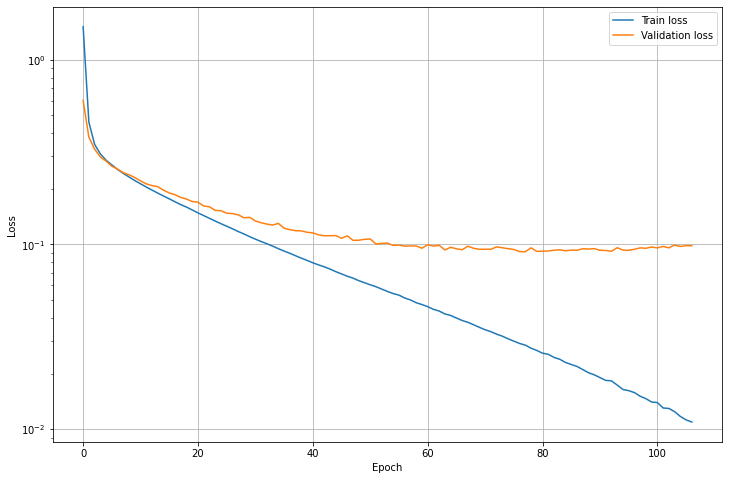

NETWORK INITIALIZATION
--------------------
Iteration: 0
--------------------
Avg train loss: 1.542618989944458
Avg Validation Loss: 0.650850236415863
--------------------
Iteration: 10
--------------------
Avg train loss: 0.2396746426820755
Avg Validation Loss: 0.2474706619977951
--------------------
Iteration: 20
--------------------
Avg train loss: 0.17034472525119781
Avg Validation Loss: 0.1856982260942459
--------------------
Iteration: 30
--------------------
Avg train loss: 0.12320832163095474
Avg Validation Loss: 0.1479986160993576
--------------------
Iteration: 40
--------------------
Avg train loss: 0.0910775363445282
Avg Validation Loss: 0.12455002218484879
--------------------
Iteration: 50
--------------------
Avg train loss: 0.06890429556369781
Avg Validation Loss: 0.10736602544784546
--------------------
Iteration: 60
--------------------
Avg train loss: 0.05292733386158943
Avg Validation Loss: 0.0954677164554596
--------------------
Iteration: 70
--------------------
A

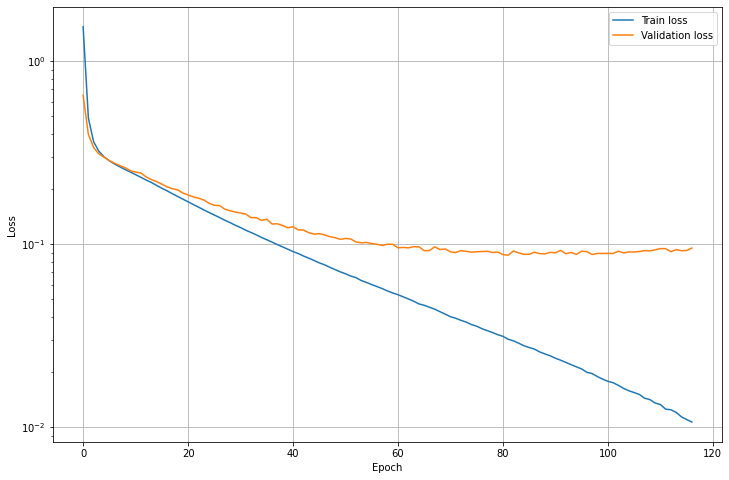

NETWORK INITIALIZATION
--------------------
Iteration: 0
--------------------
Avg train loss: 1.6341246366500854
Avg Validation Loss: 0.6989583969116211
--------------------
Iteration: 10
--------------------
Avg train loss: 0.23835891485214233
Avg Validation Loss: 0.2476155012845993
--------------------
Iteration: 20
--------------------
Avg train loss: 0.17257912456989288
Avg Validation Loss: 0.18717746436595917
--------------------
Iteration: 30
--------------------
Avg train loss: 0.12940354645252228
Avg Validation Loss: 0.15173457562923431
--------------------
Iteration: 40
--------------------
Avg train loss: 0.09858784824609756
Avg Validation Loss: 0.12428645044565201
--------------------
Iteration: 50
--------------------
Avg train loss: 0.07640649378299713
Avg Validation Loss: 0.10904034227132797
--------------------
Iteration: 60
--------------------
Avg train loss: 0.06029230356216431
Avg Validation Loss: 0.09898486733436584
--------------------
Iteration: 70
---------------

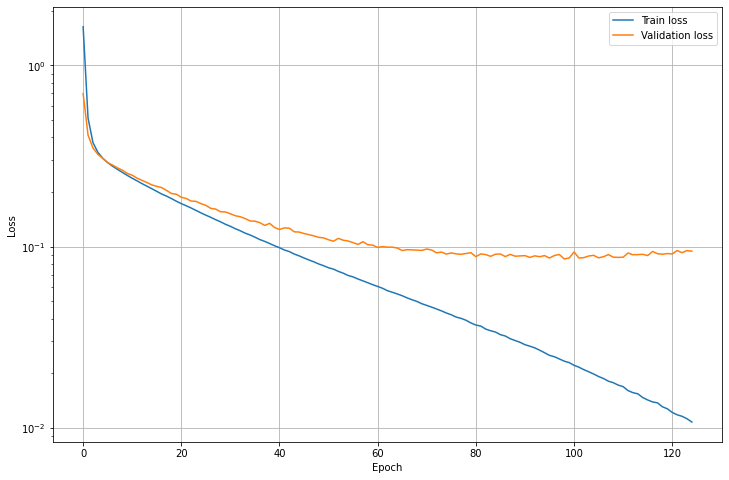

NETWORK INITIALIZATION
--------------------
Iteration: 0
--------------------
Avg train loss: 1.5953916311264038
Avg Validation Loss: 0.7212288975715637
--------------------
Iteration: 10
--------------------
Avg train loss: 0.23062805831432343
Avg Validation Loss: 0.2780054211616516
--------------------
Iteration: 20
--------------------
Avg train loss: 0.16851654648780823
Avg Validation Loss: 0.21410585939884186
--------------------
Iteration: 30
--------------------
Avg train loss: 0.12883834540843964
Avg Validation Loss: 0.17099009454250336
--------------------
Iteration: 40
--------------------
Avg train loss: 0.1006283089518547
Avg Validation Loss: 0.14522536098957062
--------------------
Iteration: 50
--------------------
Avg train loss: 0.08003948628902435
Avg Validation Loss: 0.12422304600477219
--------------------
Iteration: 60
--------------------
Avg train loss: 0.0646149218082428
Avg Validation Loss: 0.11040052771568298
--------------------
Iteration: 70
-----------------

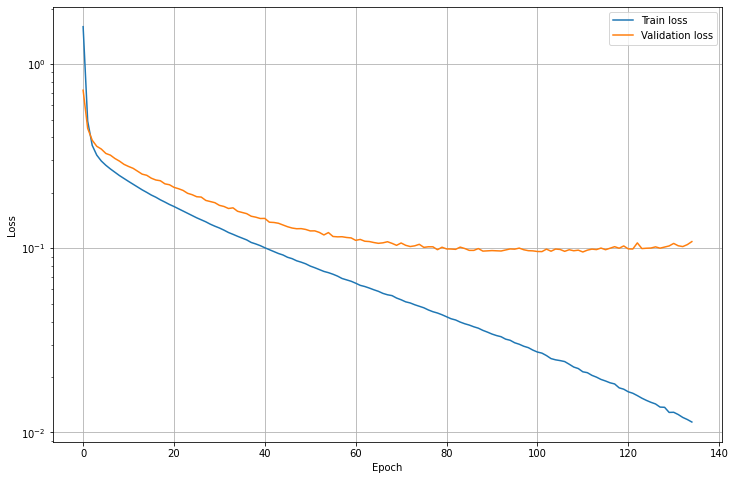

NETWORK INITIALIZATION
--------------------
Iteration: 0
--------------------
Avg train loss: 1.6592652797698975
Avg Validation Loss: 0.7785137295722961
--------------------
Iteration: 10
--------------------
Avg train loss: 0.2443089485168457
Avg Validation Loss: 0.2926122844219208
--------------------
Iteration: 20
--------------------
Avg train loss: 0.18003733456134796
Avg Validation Loss: 0.22213701903820038
--------------------
Iteration: 30
--------------------
Avg train loss: 0.13746412098407745
Avg Validation Loss: 0.17745010554790497
--------------------
Iteration: 40
--------------------
Avg train loss: 0.10757756233215332
Avg Validation Loss: 0.1454828530550003
--------------------
Iteration: 50
--------------------
Avg train loss: 0.08615728467702866
Avg Validation Loss: 0.1293797641992569
--------------------
Iteration: 60
--------------------
Avg train loss: 0.07015766203403473
Avg Validation Loss: 0.11841574311256409
--------------------
Iteration: 70
------------------

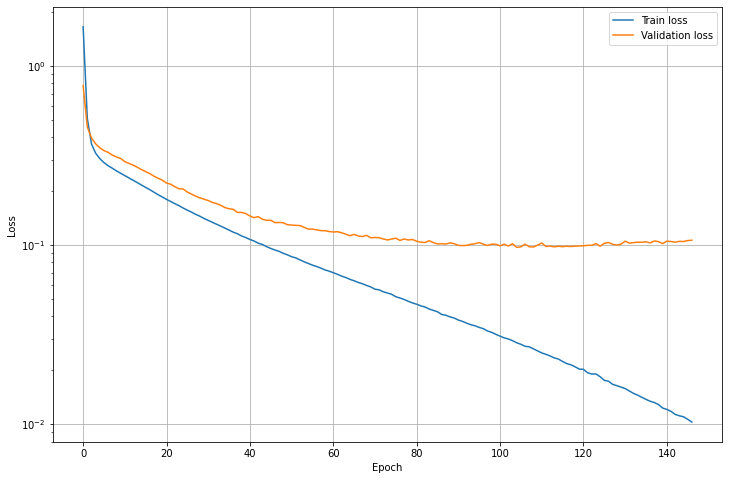

NETWORK INITIALIZATION
--------------------
Iteration: 0
--------------------
Avg train loss: 1.7299308776855469
Avg Validation Loss: 0.8788983225822449
--------------------
Iteration: 10
--------------------
Avg train loss: 0.25338539481163025
Avg Validation Loss: 0.30401182174682617
--------------------
Iteration: 20
--------------------
Avg train loss: 0.1912795752286911
Avg Validation Loss: 0.23669342696666718
--------------------
Iteration: 30
--------------------
Avg train loss: 0.14680007100105286
Avg Validation Loss: 0.1894913911819458
--------------------
Iteration: 40
--------------------
Avg train loss: 0.11596222221851349
Avg Validation Loss: 0.15654440224170685
--------------------
Iteration: 50
--------------------
Avg train loss: 0.09308521449565887
Avg Validation Loss: 0.1351901888847351
--------------------
Iteration: 60
--------------------
Avg train loss: 0.07587449252605438
Avg Validation Loss: 0.1199193224310875
--------------------
Iteration: 70
------------------

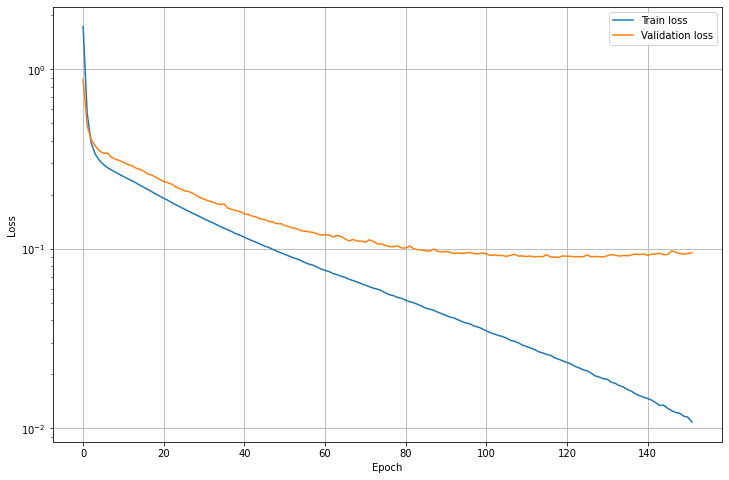

NETWORK INITIALIZATION
--------------------
Iteration: 0
--------------------
Avg train loss: 1.6068185567855835
Avg Validation Loss: 0.7291072010993958
--------------------
Iteration: 10
--------------------
Avg train loss: 0.23817479610443115
Avg Validation Loss: 0.28826043009757996
--------------------
Iteration: 20
--------------------
Avg train loss: 0.17313985526561737
Avg Validation Loss: 0.21825385093688965
--------------------
Iteration: 30
--------------------
Avg train loss: 0.12966512143611908
Avg Validation Loss: 0.17063404619693756
--------------------
Iteration: 40
--------------------
Avg train loss: 0.10028821229934692
Avg Validation Loss: 0.14006587862968445
--------------------
Iteration: 50
--------------------
Avg train loss: 0.07904656231403351
Avg Validation Loss: 0.12266526371240616
--------------------
Iteration: 60
--------------------
Avg train loss: 0.06307333707809448
Avg Validation Loss: 0.10789346694946289
--------------------
Iteration: 70
--------------

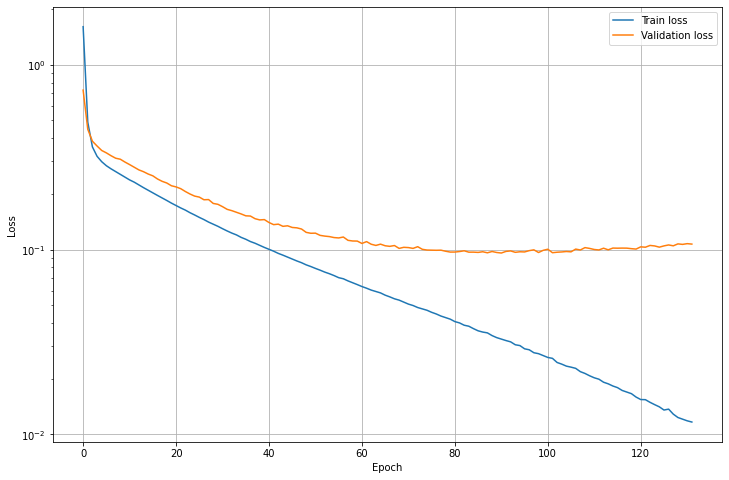

NETWORK INITIALIZATION
--------------------
Iteration: 0
--------------------
Avg train loss: 1.671338438987732
Avg Validation Loss: 0.7882488369941711
--------------------
Iteration: 10
--------------------
Avg train loss: 0.2432994395494461
Avg Validation Loss: 0.2944784462451935
--------------------
Iteration: 20
--------------------
Avg train loss: 0.17775210738182068
Avg Validation Loss: 0.22200627624988556
--------------------
Iteration: 30
--------------------
Avg train loss: 0.13564972579479218
Avg Validation Loss: 0.17716610431671143
--------------------
Iteration: 40
--------------------
Avg train loss: 0.10663773119449615
Avg Validation Loss: 0.14932502806186676
--------------------
Iteration: 50
--------------------
Avg train loss: 0.08441738784313202
Avg Validation Loss: 0.1278640478849411
--------------------
Iteration: 60
--------------------
Avg train loss: 0.06783124059438705
Avg Validation Loss: 0.11368431895971298
--------------------
Iteration: 70
------------------

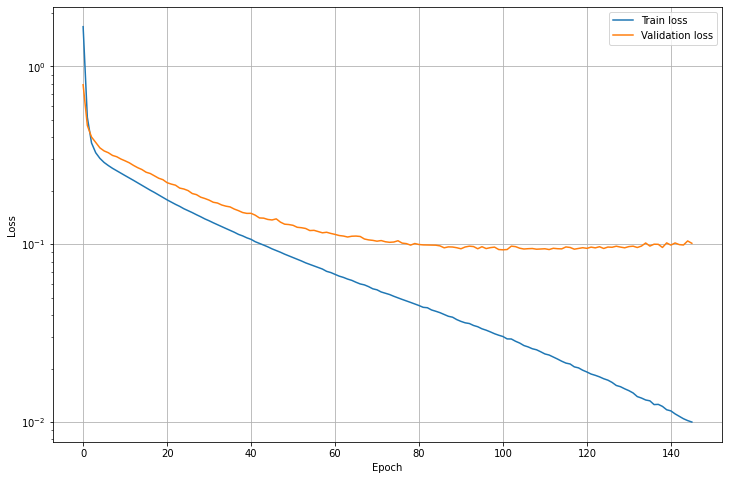

NETWORK INITIALIZATION
--------------------
Iteration: 0
--------------------
Avg train loss: 1.7412409782409668
Avg Validation Loss: 0.8790611624717712
--------------------
Iteration: 10
--------------------
Avg train loss: 0.24799378216266632
Avg Validation Loss: 0.29731056094169617
--------------------
Iteration: 20
--------------------
Avg train loss: 0.186017706990242
Avg Validation Loss: 0.23101599514484406
--------------------
Iteration: 30
--------------------
Avg train loss: 0.14370092749595642
Avg Validation Loss: 0.1813114881515503
--------------------
Iteration: 40
--------------------
Avg train loss: 0.11315442621707916
Avg Validation Loss: 0.149941086769104
--------------------
Iteration: 50
--------------------
Avg train loss: 0.09141308814287186
Avg Validation Loss: 0.129679337143898
--------------------
Iteration: 60
--------------------
Avg train loss: 0.07457702606916428
Avg Validation Loss: 0.11813022941350937
--------------------
Iteration: 70
--------------------


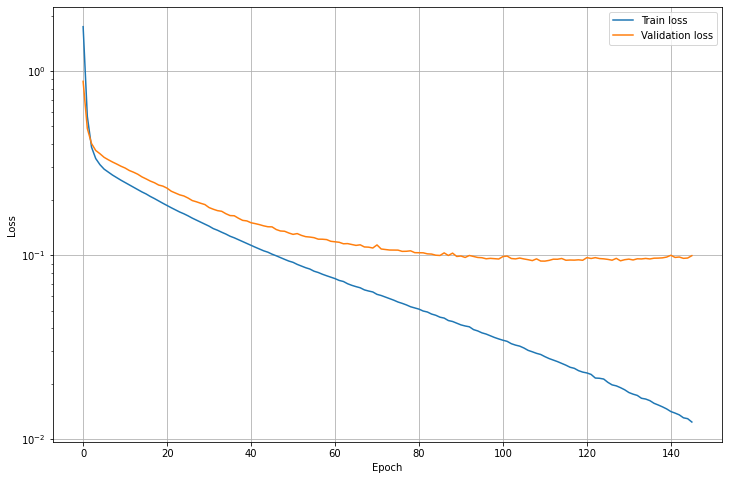

NETWORK INITIALIZATION
--------------------
Iteration: 0
--------------------
Avg train loss: 1.2152808904647827
Avg Validation Loss: 0.5644786357879639
--------------------
Iteration: 10
--------------------
Avg train loss: 0.21899768710136414
Avg Validation Loss: 0.22137565910816193
--------------------
Iteration: 20
--------------------
Avg train loss: 0.15109552443027496
Avg Validation Loss: 0.17051494121551514
--------------------
Iteration: 30
--------------------
Avg train loss: 0.10710268467664719
Avg Validation Loss: 0.1407971829175949
--------------------
Iteration: 40
--------------------
Avg train loss: 0.07799513638019562
Avg Validation Loss: 0.12422489374876022
--------------------
Iteration: 50
--------------------
Avg train loss: 0.05789261311292648
Avg Validation Loss: 0.11344566196203232
--------------------
Iteration: 60
--------------------
Avg train loss: 0.04325755685567856
Avg Validation Loss: 0.107274629175663
--------------------
Iteration: 70
-----------------

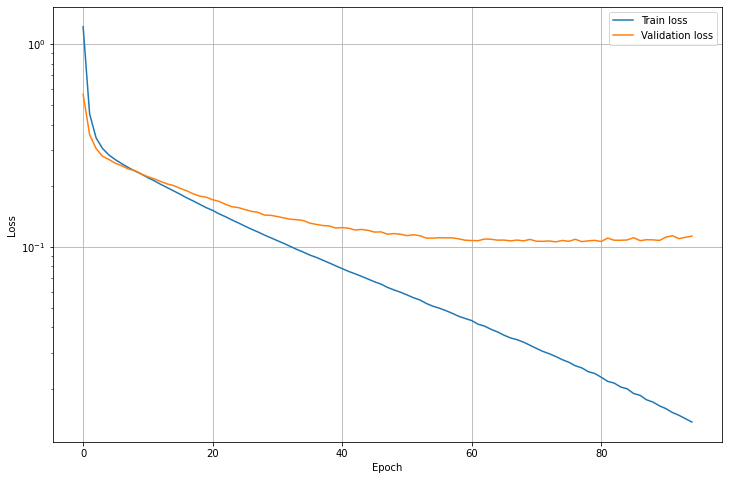

NETWORK INITIALIZATION
--------------------
Iteration: 0
--------------------
Avg train loss: 1.2420495748519897
Avg Validation Loss: 0.5991731286048889
--------------------
Iteration: 10
--------------------
Avg train loss: 0.22735010087490082
Avg Validation Loss: 0.229900524020195
--------------------
Iteration: 20
--------------------
Avg train loss: 0.16400237381458282
Avg Validation Loss: 0.18262429535388947
--------------------
Iteration: 30
--------------------
Avg train loss: 0.12088020145893097
Avg Validation Loss: 0.1533513069152832
--------------------
Iteration: 40
--------------------
Avg train loss: 0.09100811183452606
Avg Validation Loss: 0.13263623416423798
--------------------
Iteration: 50
--------------------
Avg train loss: 0.0688086524605751
Avg Validation Loss: 0.12228504568338394
--------------------
Iteration: 60
--------------------
Avg train loss: 0.052182648330926895
Avg Validation Loss: 0.11541449278593063
--------------------
Iteration: 70
-----------------

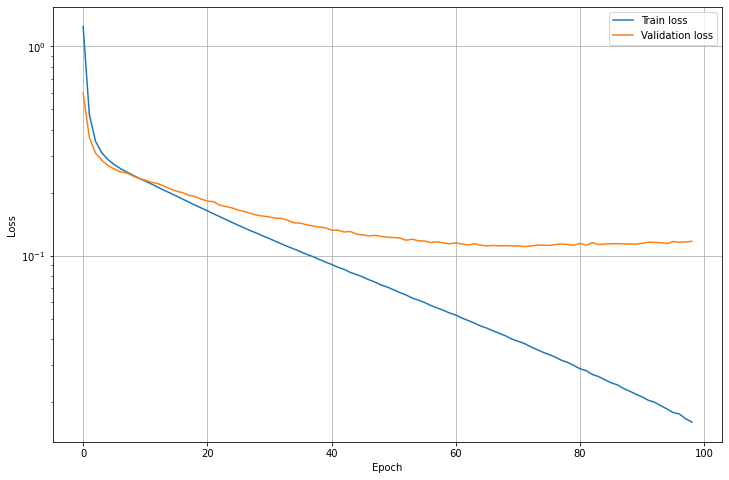

NETWORK INITIALIZATION
--------------------
Iteration: 0
--------------------
Avg train loss: 1.3210901021957397
Avg Validation Loss: 0.6468263268470764
--------------------
Iteration: 10
--------------------
Avg train loss: 0.23425637185573578
Avg Validation Loss: 0.23485468327999115
--------------------
Iteration: 20
--------------------
Avg train loss: 0.17286324501037598
Avg Validation Loss: 0.1888054609298706
--------------------
Iteration: 30
--------------------
Avg train loss: 0.12847600877285004
Avg Validation Loss: 0.15763084590435028
--------------------
Iteration: 40
--------------------
Avg train loss: 0.09788449853658676
Avg Validation Loss: 0.136396586894989
--------------------
Iteration: 50
--------------------
Avg train loss: 0.0750390812754631
Avg Validation Loss: 0.12346965074539185
--------------------
Iteration: 60
--------------------
Avg train loss: 0.057738788425922394
Avg Validation Loss: 0.11500522494316101
--------------------
Iteration: 70
-----------------

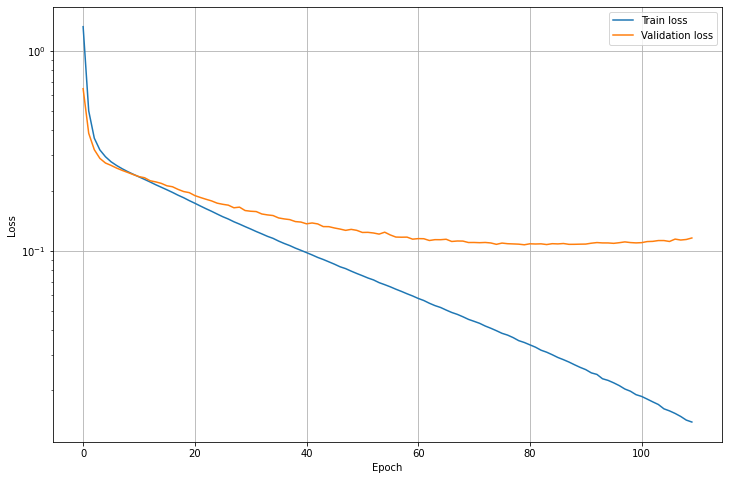

NETWORK INITIALIZATION
--------------------
Iteration: 0
--------------------
Avg train loss: 1.2372994422912598
Avg Validation Loss: 0.5818521976470947
--------------------
Iteration: 10
--------------------
Avg train loss: 0.2189284712076187
Avg Validation Loss: 0.2234119325876236
--------------------
Iteration: 20
--------------------
Avg train loss: 0.15341100096702576
Avg Validation Loss: 0.17293961346149445
--------------------
Iteration: 30
--------------------
Avg train loss: 0.1096436008810997
Avg Validation Loss: 0.14438274502754211
--------------------
Iteration: 40
--------------------
Avg train loss: 0.0797838345170021
Avg Validation Loss: 0.12383393198251724
--------------------
Iteration: 50
--------------------
Avg train loss: 0.05864884704351425
Avg Validation Loss: 0.11439257860183716
--------------------
Iteration: 60
--------------------
Avg train loss: 0.043135374784469604
Avg Validation Loss: 0.1090569794178009
--------------------
Iteration: 70
------------------

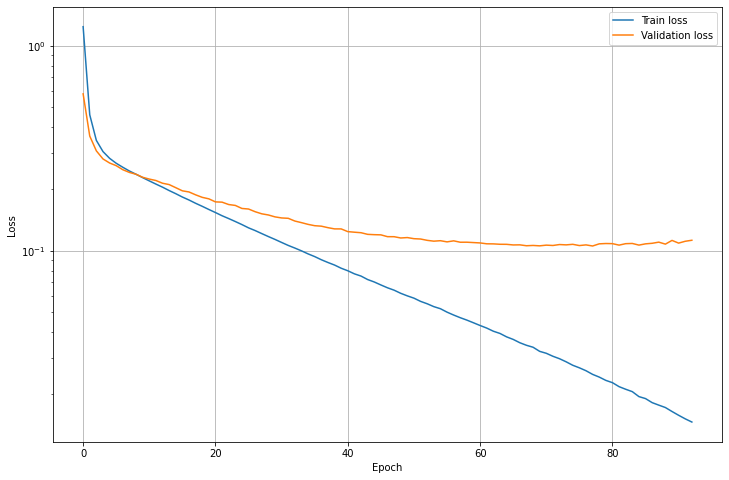

NETWORK INITIALIZATION
--------------------
Iteration: 0
--------------------
Avg train loss: 1.2655590772628784
Avg Validation Loss: 0.607113242149353
--------------------
Iteration: 10
--------------------
Avg train loss: 0.2257293462753296
Avg Validation Loss: 0.22983235120773315
--------------------
Iteration: 20
--------------------
Avg train loss: 0.16127386689186096
Avg Validation Loss: 0.18016962707042694
--------------------
Iteration: 30
--------------------
Avg train loss: 0.11693470180034637
Avg Validation Loss: 0.14832191169261932
--------------------
Iteration: 40
--------------------
Avg train loss: 0.08766617625951767
Avg Validation Loss: 0.12953875958919525
--------------------
Iteration: 50
--------------------
Avg train loss: 0.0662563368678093
Avg Validation Loss: 0.11779168248176575
--------------------
Iteration: 60
--------------------
Avg train loss: 0.0500655435025692
Avg Validation Loss: 0.1116042509675026
--------------------
Iteration: 70
-------------------

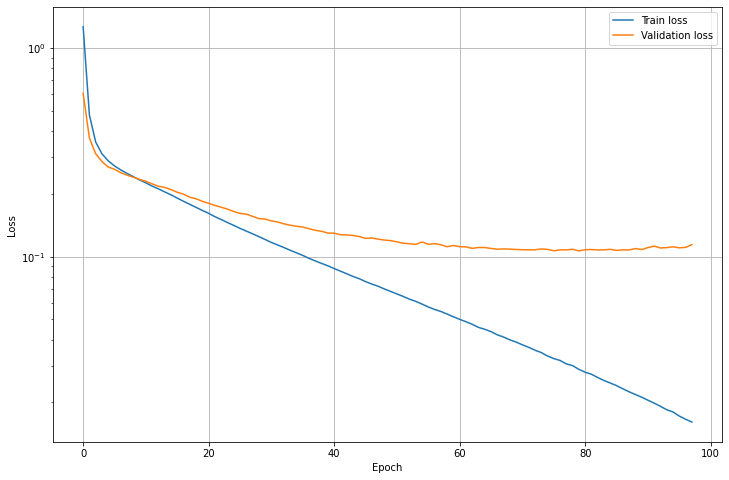

NETWORK INITIALIZATION
--------------------
Iteration: 0
--------------------
Avg train loss: 1.3169306516647339
Avg Validation Loss: 0.6503928303718567
--------------------
Iteration: 10
--------------------
Avg train loss: 0.23072579503059387
Avg Validation Loss: 0.2321944236755371
--------------------
Iteration: 20
--------------------
Avg train loss: 0.17032024264335632
Avg Validation Loss: 0.1866375207901001
--------------------
Iteration: 30
--------------------
Avg train loss: 0.12760160863399506
Avg Validation Loss: 0.1560220718383789
--------------------
Iteration: 40
--------------------
Avg train loss: 0.09671642631292343
Avg Validation Loss: 0.1361520141363144
--------------------
Iteration: 50
--------------------
Avg train loss: 0.07404777407646179
Avg Validation Loss: 0.1229204311966896
--------------------
Iteration: 60
--------------------
Avg train loss: 0.05725732818245888
Avg Validation Loss: 0.11540905386209488
--------------------
Iteration: 70
-------------------

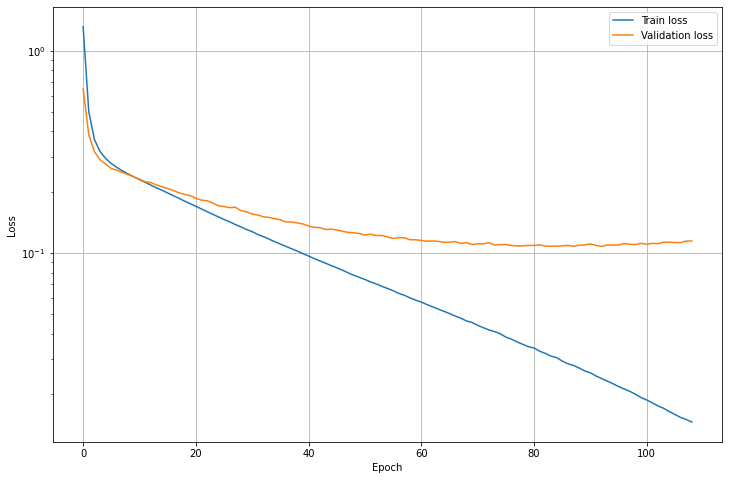

NETWORK INITIALIZATION
--------------------
Iteration: 0
--------------------
Avg train loss: 2.2458980083465576
Avg Validation Loss: 2.1420586109161377
--------------------
Iteration: 10
--------------------
Avg train loss: 0.3954143822193146
Avg Validation Loss: 0.4008611738681793
--------------------
Iteration: 20
--------------------
Avg train loss: 0.2512019872665405
Avg Validation Loss: 0.26783254742622375
--------------------
Iteration: 30
--------------------
Avg train loss: 0.19710566103458405
Avg Validation Loss: 0.2200438529253006
--------------------
Iteration: 40
--------------------
Avg train loss: 0.1613336205482483
Avg Validation Loss: 0.18598534166812897
--------------------
Iteration: 50
--------------------
Avg train loss: 0.13500678539276123
Avg Validation Loss: 0.16234435141086578
--------------------
Iteration: 60
--------------------
Avg train loss: 0.11436563730239868
Avg Validation Loss: 0.14390991628170013
--------------------
Iteration: 70
-------------------

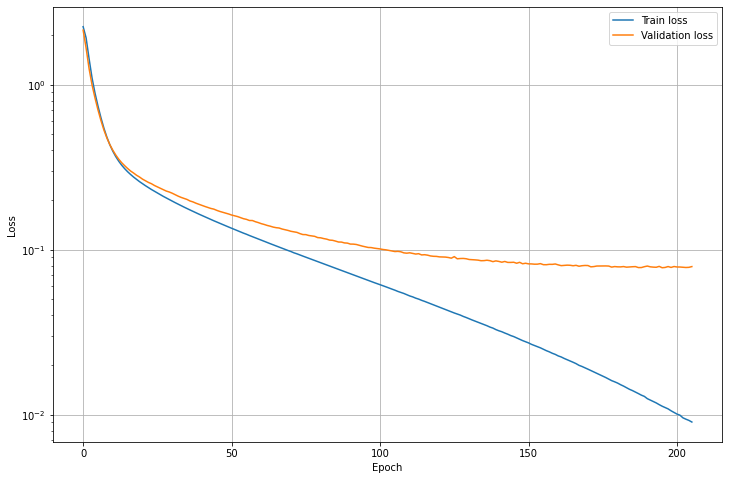

NETWORK INITIALIZATION
--------------------
Iteration: 0
--------------------
Avg train loss: 2.247309446334839
Avg Validation Loss: 2.1442387104034424
--------------------
Iteration: 10
--------------------
Avg train loss: 0.3803122341632843
Avg Validation Loss: 0.3853628933429718
--------------------
Iteration: 20
--------------------
Avg train loss: 0.24921146035194397
Avg Validation Loss: 0.26644936203956604
--------------------
Iteration: 30
--------------------
Avg train loss: 0.19330063462257385
Avg Validation Loss: 0.2156333178281784
--------------------
Iteration: 40
--------------------
Avg train loss: 0.15588989853858948
Avg Validation Loss: 0.1820342093706131
--------------------
Iteration: 50
--------------------
Avg train loss: 0.12801489233970642
Avg Validation Loss: 0.1569667011499405
--------------------
Iteration: 60
--------------------
Avg train loss: 0.10620645433664322
Avg Validation Loss: 0.13799086213111877
--------------------
Iteration: 70
--------------------

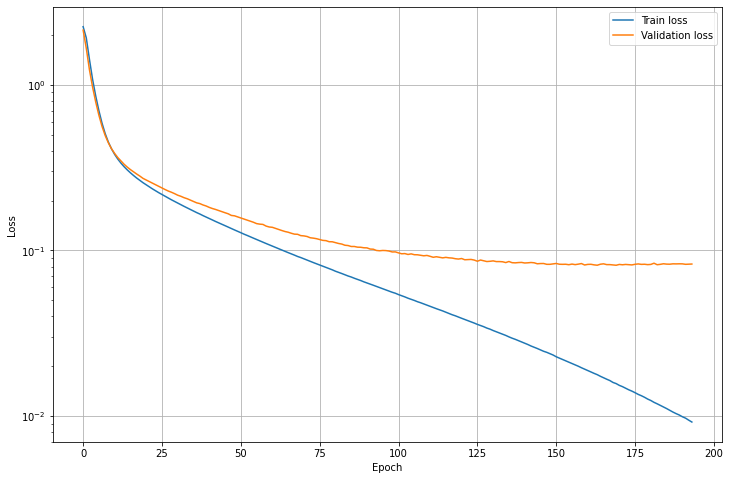

NETWORK INITIALIZATION
--------------------
Iteration: 0
--------------------
Avg train loss: 2.2464306354522705
Avg Validation Loss: 2.1272194385528564
--------------------
Iteration: 10
--------------------
Avg train loss: 0.37834984064102173
Avg Validation Loss: 0.3854247033596039
--------------------
Iteration: 20
--------------------
Avg train loss: 0.23879314959049225
Avg Validation Loss: 0.2574443221092224
--------------------
Iteration: 30
--------------------
Avg train loss: 0.18379603326320648
Avg Validation Loss: 0.2068837434053421
--------------------
Iteration: 40
--------------------
Avg train loss: 0.147346630692482
Avg Validation Loss: 0.17203707993030548
--------------------
Iteration: 50
--------------------
Avg train loss: 0.12071036547422409
Avg Validation Loss: 0.14896172285079956
--------------------
Iteration: 60
--------------------
Avg train loss: 0.09992200136184692
Avg Validation Loss: 0.1299728900194168
--------------------
Iteration: 70
--------------------

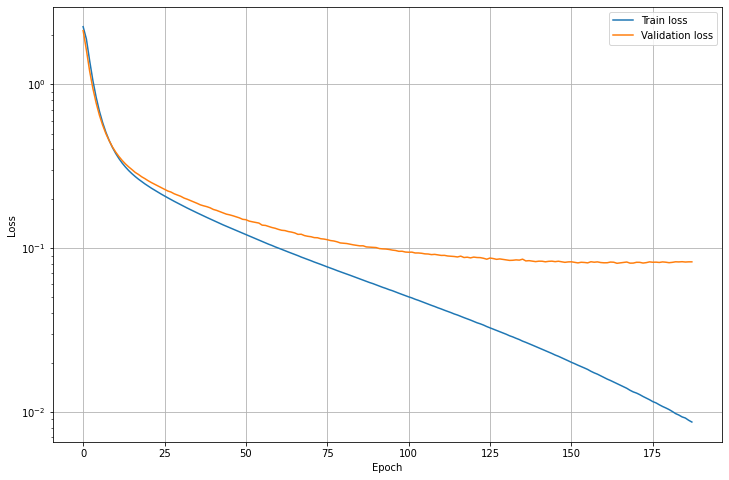

NETWORK INITIALIZATION
--------------------
Iteration: 0
--------------------
Avg train loss: 2.2472286224365234
Avg Validation Loss: 2.1435067653656006
--------------------
Iteration: 10
--------------------
Avg train loss: 0.39853158593177795
Avg Validation Loss: 0.4047170877456665
--------------------
Iteration: 20
--------------------
Avg train loss: 0.2554439306259155
Avg Validation Loss: 0.27422046661376953
--------------------
Iteration: 30
--------------------
Avg train loss: 0.1980292648077011
Avg Validation Loss: 0.2204582244157791
--------------------
Iteration: 40
--------------------
Avg train loss: 0.16008342802524567
Avg Validation Loss: 0.18608731031417847
--------------------
Iteration: 50
--------------------
Avg train loss: 0.13250146806240082
Avg Validation Loss: 0.1589651256799698
--------------------
Iteration: 60
--------------------
Avg train loss: 0.1114431694149971
Avg Validation Loss: 0.139315664768219
--------------------
Iteration: 70
--------------------
A

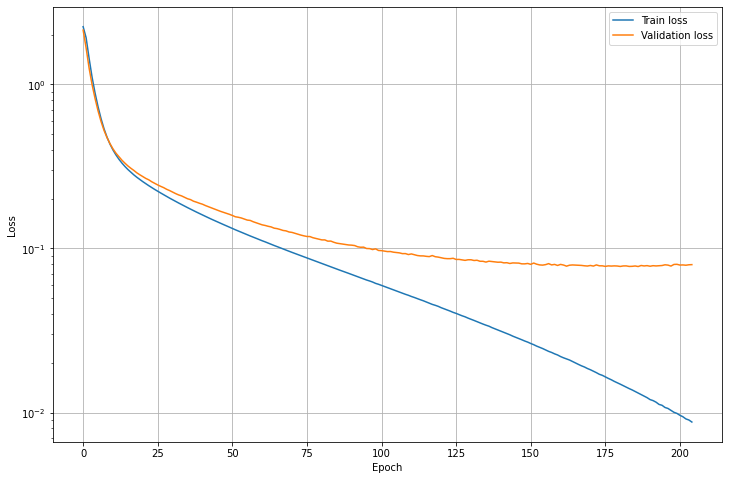

NETWORK INITIALIZATION
--------------------
Iteration: 0
--------------------
Avg train loss: 2.2405881881713867
Avg Validation Loss: 2.1238930225372314
--------------------
Iteration: 10
--------------------
Avg train loss: 0.37971532344818115
Avg Validation Loss: 0.387068510055542
--------------------
Iteration: 20
--------------------
Avg train loss: 0.24799896776676178
Avg Validation Loss: 0.2653909921646118
--------------------
Iteration: 30
--------------------
Avg train loss: 0.19003896415233612
Avg Validation Loss: 0.21327035129070282
--------------------
Iteration: 40
--------------------
Avg train loss: 0.15335381031036377
Avg Validation Loss: 0.18021248281002045
--------------------
Iteration: 50
--------------------
Avg train loss: 0.12673917412757874
Avg Validation Loss: 0.15573881566524506
--------------------
Iteration: 60
--------------------
Avg train loss: 0.1062566265463829
Avg Validation Loss: 0.13927437365055084
--------------------
Iteration: 70
------------------

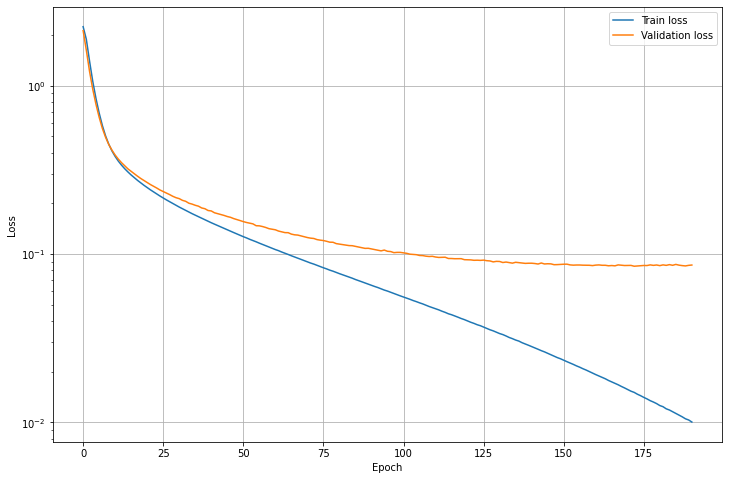

NETWORK INITIALIZATION
--------------------
Iteration: 0
--------------------
Avg train loss: 2.2321064472198486
Avg Validation Loss: 2.103895425796509
--------------------
Iteration: 10
--------------------
Avg train loss: 0.365632563829422
Avg Validation Loss: 0.371922105550766
--------------------
Iteration: 20
--------------------
Avg train loss: 0.2385966181755066
Avg Validation Loss: 0.2582894265651703
--------------------
Iteration: 30
--------------------
Avg train loss: 0.18492193520069122
Avg Validation Loss: 0.20922742784023285
--------------------
Iteration: 40
--------------------
Avg train loss: 0.1487201601266861
Avg Validation Loss: 0.17615513503551483
--------------------
Iteration: 50
--------------------
Avg train loss: 0.12176209688186646
Avg Validation Loss: 0.1508997231721878
--------------------
Iteration: 60
--------------------
Avg train loss: 0.1010633334517479
Avg Validation Loss: 0.13339971005916595
--------------------
Iteration: 70
--------------------
Avg

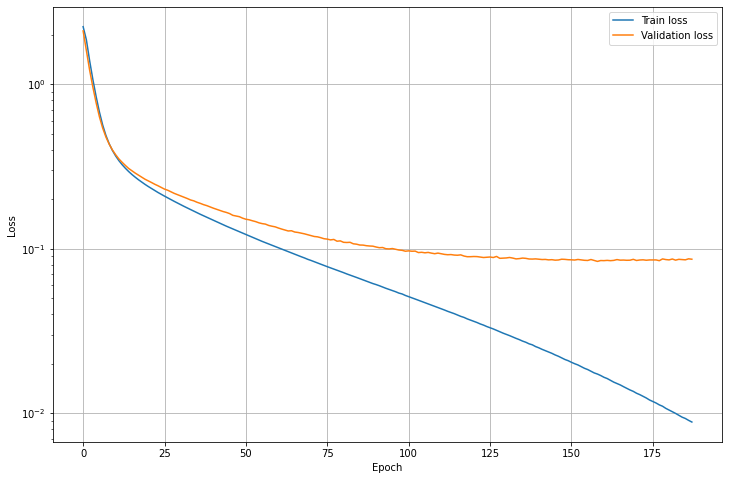

NETWORK INITIALIZATION
--------------------
Iteration: 0
--------------------
Avg train loss: 1.53252375125885
Avg Validation Loss: 0.7665542960166931
--------------------
Iteration: 10
--------------------
Avg train loss: 0.19833754003047943
Avg Validation Loss: 0.2084299474954605
--------------------
Iteration: 20
--------------------
Avg train loss: 0.1239200085401535
Avg Validation Loss: 0.14663638174533844
--------------------
Iteration: 30
--------------------
Avg train loss: 0.08589223027229309
Avg Validation Loss: 0.11858021467924118
--------------------
Iteration: 40
--------------------
Avg train loss: 0.06186084821820259
Avg Validation Loss: 0.10293085128068924
--------------------
Iteration: 50
--------------------
Avg train loss: 0.045106880366802216
Avg Validation Loss: 0.09455249458551407
--------------------
Iteration: 60
--------------------
Avg train loss: 0.032423149794340134
Avg Validation Loss: 0.09154727309942245
--------------------
Iteration: 70
----------------

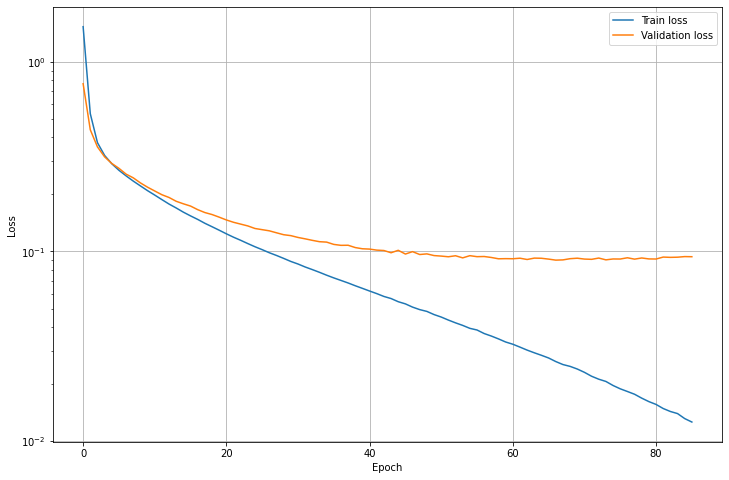

NETWORK INITIALIZATION
--------------------
Iteration: 0
--------------------
Avg train loss: 1.4749321937561035
Avg Validation Loss: 0.6962594985961914
--------------------
Iteration: 10
--------------------
Avg train loss: 0.19586250185966492
Avg Validation Loss: 0.2083580046892166
--------------------
Iteration: 20
--------------------
Avg train loss: 0.12593653798103333
Avg Validation Loss: 0.14895102381706238
--------------------
Iteration: 30
--------------------
Avg train loss: 0.08697022497653961
Avg Validation Loss: 0.11894579976797104
--------------------
Iteration: 40
--------------------
Avg train loss: 0.06112700700759888
Avg Validation Loss: 0.104433573782444
--------------------
Iteration: 50
--------------------
Avg train loss: 0.04402743652462959
Avg Validation Loss: 0.09758319705724716
--------------------
Iteration: 60
--------------------
Avg train loss: 0.031195595860481262
Avg Validation Loss: 0.09375479072332382
--------------------
Iteration: 70
----------------

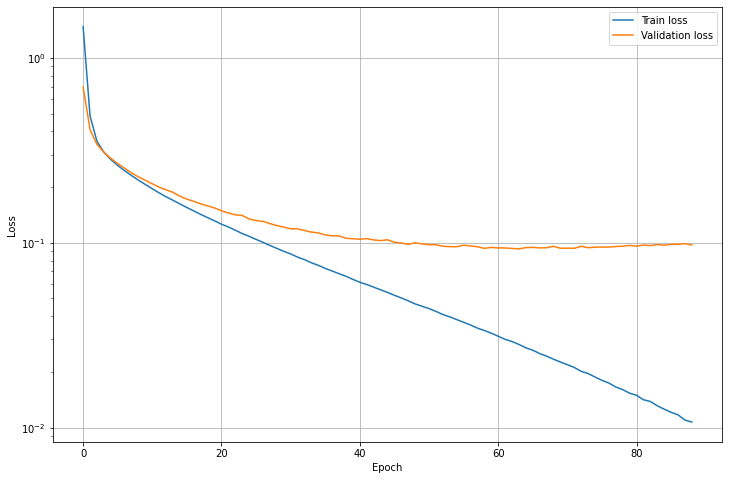

NETWORK INITIALIZATION
--------------------
Iteration: 0
--------------------
Avg train loss: 1.4383498430252075
Avg Validation Loss: 0.6846575140953064
--------------------
Iteration: 10
--------------------
Avg train loss: 0.19271516799926758
Avg Validation Loss: 0.2046516090631485
--------------------
Iteration: 20
--------------------
Avg train loss: 0.12362904101610184
Avg Validation Loss: 0.14898665249347687
--------------------
Iteration: 30
--------------------
Avg train loss: 0.08638211339712143
Avg Validation Loss: 0.123070627450943
--------------------
Iteration: 40
--------------------
Avg train loss: 0.06202687695622444
Avg Validation Loss: 0.10770785063505173
--------------------
Iteration: 50
--------------------
Avg train loss: 0.04515751823782921
Avg Validation Loss: 0.10113974660634995
--------------------
Iteration: 60
--------------------
Avg train loss: 0.032476380467414856
Avg Validation Loss: 0.0964345708489418
--------------------
Iteration: 70
-----------------

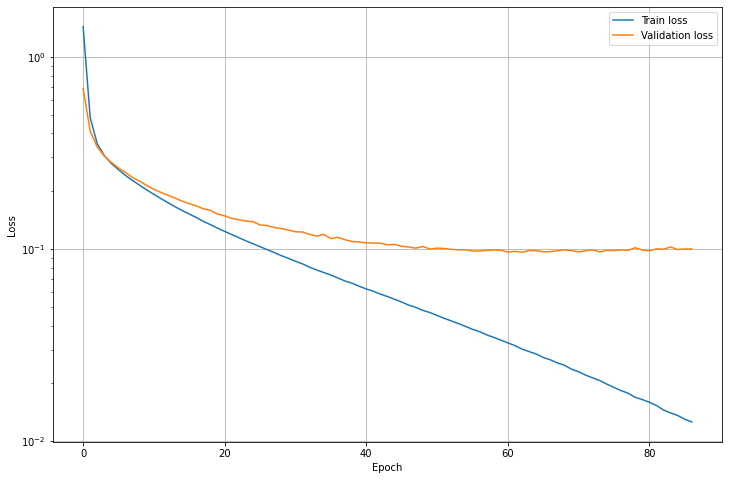

NETWORK INITIALIZATION
--------------------
Iteration: 0
--------------------
Avg train loss: 1.5310262441635132
Avg Validation Loss: 0.739422619342804
--------------------
Iteration: 10
--------------------
Avg train loss: 0.20295238494873047
Avg Validation Loss: 0.21331743896007538
--------------------
Iteration: 20
--------------------
Avg train loss: 0.12962661683559418
Avg Validation Loss: 0.1517968624830246
--------------------
Iteration: 30
--------------------
Avg train loss: 0.0887937843799591
Avg Validation Loss: 0.12192725390195847
--------------------
Iteration: 40
--------------------
Avg train loss: 0.06302858889102936
Avg Validation Loss: 0.10601675510406494
--------------------
Iteration: 50
--------------------
Avg train loss: 0.04538422450423241
Avg Validation Loss: 0.0982622429728508
--------------------
Iteration: 60
--------------------
Avg train loss: 0.03234076499938965
Avg Validation Loss: 0.09409918636083603
--------------------
Iteration: 70
------------------

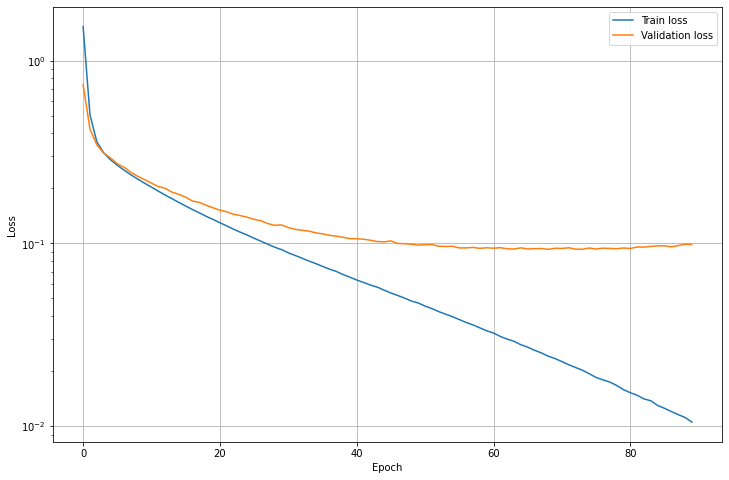

NETWORK INITIALIZATION
--------------------
Iteration: 0
--------------------
Avg train loss: 1.4663820266723633
Avg Validation Loss: 0.6929213404655457
--------------------
Iteration: 10
--------------------
Avg train loss: 0.20545344054698944
Avg Validation Loss: 0.21516354382038116
--------------------
Iteration: 20
--------------------
Avg train loss: 0.12897802889347076
Avg Validation Loss: 0.15200422704219818
--------------------
Iteration: 30
--------------------
Avg train loss: 0.08837662637233734
Avg Validation Loss: 0.12198713421821594
--------------------
Iteration: 40
--------------------
Avg train loss: 0.06234075129032135
Avg Validation Loss: 0.10759877413511276
--------------------
Iteration: 50
--------------------
Avg train loss: 0.0440639927983284
Avg Validation Loss: 0.09605873376131058
--------------------
Iteration: 60
--------------------
Avg train loss: 0.031098563224077225
Avg Validation Loss: 0.09290870279073715
--------------------
Iteration: 70
--------------

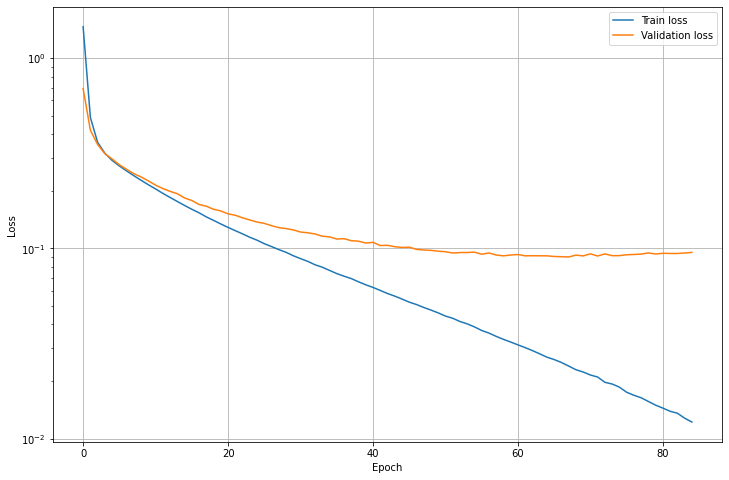

NETWORK INITIALIZATION
--------------------
Iteration: 0
--------------------
Avg train loss: 1.456126093864441
Avg Validation Loss: 0.6923818588256836
--------------------
Iteration: 10
--------------------
Avg train loss: 0.18823838233947754
Avg Validation Loss: 0.2022700309753418
--------------------
Iteration: 20
--------------------
Avg train loss: 0.1164122149348259
Avg Validation Loss: 0.14123618602752686
--------------------
Iteration: 30
--------------------
Avg train loss: 0.07755971699953079
Avg Validation Loss: 0.11238322407007217
--------------------
Iteration: 40
--------------------
Avg train loss: 0.05355453118681908
Avg Validation Loss: 0.09990599006414413
--------------------
Iteration: 50
--------------------
Avg train loss: 0.03746508061885834
Avg Validation Loss: 0.0950746163725853
--------------------
Iteration: 60
--------------------
Avg train loss: 0.026057500392198563
Avg Validation Loss: 0.09432893246412277
--------------------
Iteration: 70
-----------------

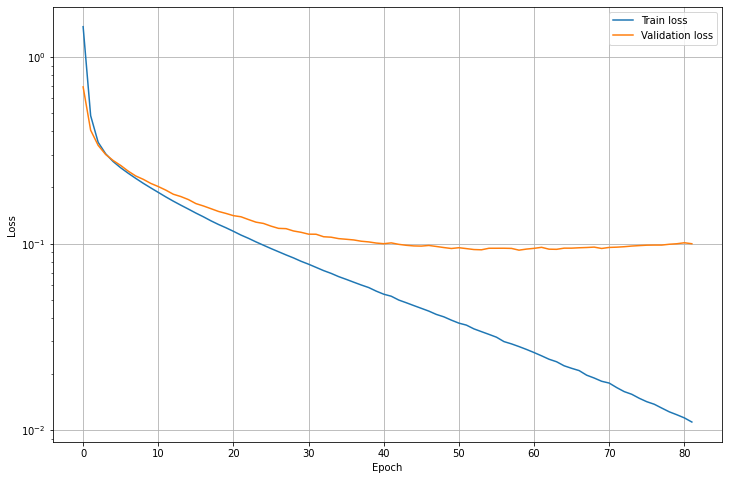

NETWORK INITIALIZATION
--------------------
Iteration: 0
--------------------
Avg train loss: 1.5019162893295288
Avg Validation Loss: 0.6270264983177185
--------------------
Iteration: 10
--------------------
Avg train loss: 0.22035710513591766
Avg Validation Loss: 0.24576187133789062
--------------------
Iteration: 20
--------------------
Avg train loss: 0.14876778423786163
Avg Validation Loss: 0.1861967295408249
--------------------
Iteration: 30
--------------------
Avg train loss: 0.10682674497365952
Avg Validation Loss: 0.14859367907047272
--------------------
Iteration: 40
--------------------
Avg train loss: 0.07836213707923889
Avg Validation Loss: 0.12723781168460846
--------------------
Iteration: 50
--------------------
Avg train loss: 0.05859552323818207
Avg Validation Loss: 0.11613016575574875
--------------------
Iteration: 60
--------------------
Avg train loss: 0.044162750244140625
Avg Validation Loss: 0.11187871545553207
--------------------
Iteration: 70
--------------

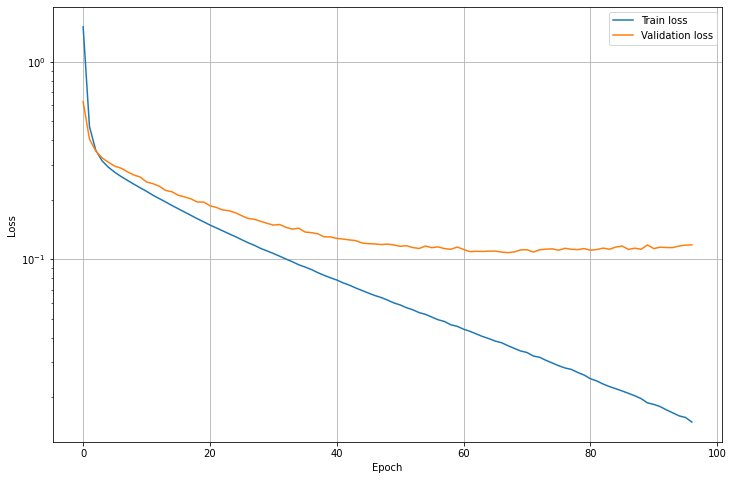

NETWORK INITIALIZATION
--------------------
Iteration: 0
--------------------
Avg train loss: 1.4655920267105103
Avg Validation Loss: 0.612398087978363
--------------------
Iteration: 10
--------------------
Avg train loss: 0.21717874705791473
Avg Validation Loss: 0.24355769157409668
--------------------
Iteration: 20
--------------------
Avg train loss: 0.1473381370306015
Avg Validation Loss: 0.18194855749607086
--------------------
Iteration: 30
--------------------
Avg train loss: 0.10477323085069656
Avg Validation Loss: 0.1483854204416275
--------------------
Iteration: 40
--------------------
Avg train loss: 0.07651767134666443
Avg Validation Loss: 0.1321018487215042
--------------------
Iteration: 50
--------------------
Avg train loss: 0.05631841719150543
Avg Validation Loss: 0.11623263359069824
--------------------
Iteration: 60
--------------------
Avg train loss: 0.041968367993831635
Avg Validation Loss: 0.111630879342556
--------------------
Iteration: 70
-------------------

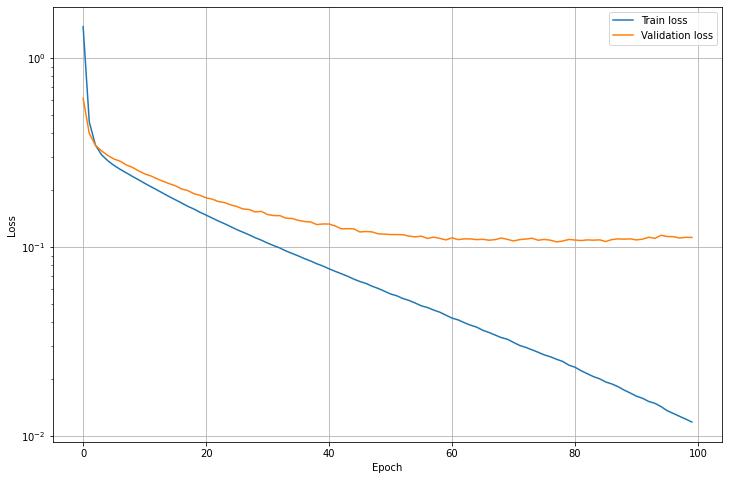

NETWORK INITIALIZATION
--------------------
Iteration: 0
--------------------
Avg train loss: 1.4413460493087769
Avg Validation Loss: 0.5902054905891418
--------------------
Iteration: 10
--------------------
Avg train loss: 0.20442217588424683
Avg Validation Loss: 0.2332015484571457
--------------------
Iteration: 20
--------------------
Avg train loss: 0.1352357566356659
Avg Validation Loss: 0.16854484379291534
--------------------
Iteration: 30
--------------------
Avg train loss: 0.09472531825304031
Avg Validation Loss: 0.13849864900112152
--------------------
Iteration: 40
--------------------
Avg train loss: 0.06903807818889618
Avg Validation Loss: 0.12123508006334305
--------------------
Iteration: 50
--------------------
Avg train loss: 0.05094150826334953
Avg Validation Loss: 0.11177897453308105
--------------------
Iteration: 60
--------------------
Avg train loss: 0.03752627223730087
Avg Validation Loss: 0.10862725973129272
--------------------
Iteration: 70
----------------

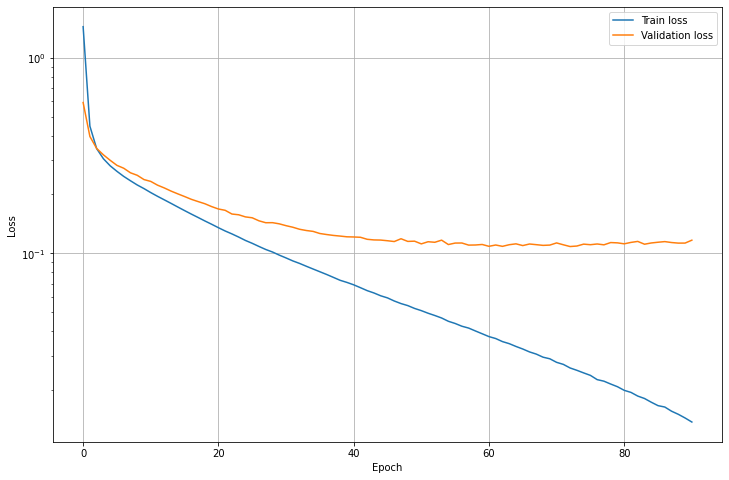

NETWORK INITIALIZATION
--------------------
Iteration: 0
--------------------
Avg train loss: 1.5260025262832642
Avg Validation Loss: 0.6183929443359375
--------------------
Iteration: 10
--------------------
Avg train loss: 0.20490553975105286
Avg Validation Loss: 0.22899369895458221
--------------------
Iteration: 20
--------------------
Avg train loss: 0.13770554959774017
Avg Validation Loss: 0.17190377414226532
--------------------
Iteration: 30
--------------------
Avg train loss: 0.09888850897550583
Avg Validation Loss: 0.13981156051158905
--------------------
Iteration: 40
--------------------
Avg train loss: 0.07449791580438614
Avg Validation Loss: 0.12192636728286743
--------------------
Iteration: 50
--------------------
Avg train loss: 0.056292612105607986
Avg Validation Loss: 0.11121789366006851
--------------------
Iteration: 60
--------------------
Avg train loss: 0.042821336537599564
Avg Validation Loss: 0.11168425530195236
--------------------
Iteration: 70
------------

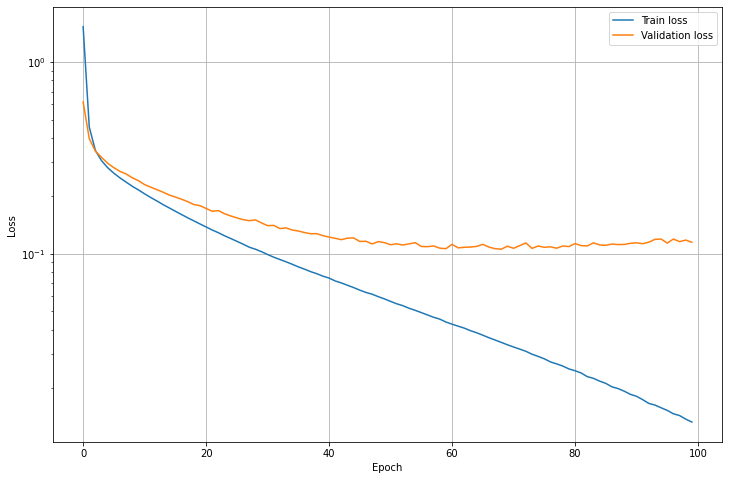

NETWORK INITIALIZATION
--------------------
Iteration: 0
--------------------
Avg train loss: 1.470814824104309
Avg Validation Loss: 0.5966809391975403
--------------------
Iteration: 10
--------------------
Avg train loss: 0.2148425579071045
Avg Validation Loss: 0.24483908712863922
--------------------
Iteration: 20
--------------------
Avg train loss: 0.14042167365550995
Avg Validation Loss: 0.17690658569335938
--------------------
Iteration: 30
--------------------
Avg train loss: 0.09761966019868851
Avg Validation Loss: 0.13813863694667816
--------------------
Iteration: 40
--------------------
Avg train loss: 0.07082615792751312
Avg Validation Loss: 0.12000610679388046
--------------------
Iteration: 50
--------------------
Avg train loss: 0.05338582769036293
Avg Validation Loss: 0.10623685270547867
--------------------
Iteration: 60
--------------------
Avg train loss: 0.039550162851810455
Avg Validation Loss: 0.10355215519666672
--------------------
Iteration: 70
---------------

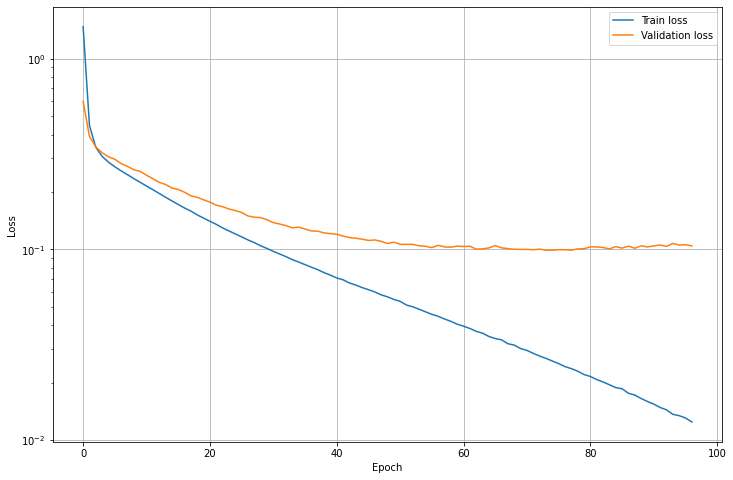

NETWORK INITIALIZATION
--------------------
Iteration: 0
--------------------
Avg train loss: 1.4129325151443481
Avg Validation Loss: 0.571797788143158
--------------------
Iteration: 10
--------------------
Avg train loss: 0.2146080732345581
Avg Validation Loss: 0.2442893236875534
--------------------
Iteration: 20
--------------------
Avg train loss: 0.14024727046489716
Avg Validation Loss: 0.17530162632465363
--------------------
Iteration: 30
--------------------
Avg train loss: 0.098388671875
Avg Validation Loss: 0.13956905901432037
--------------------
Iteration: 40
--------------------
Avg train loss: 0.07199643552303314
Avg Validation Loss: 0.11584147065877914
--------------------
Iteration: 50
--------------------
Avg train loss: 0.053356070071458817
Avg Validation Loss: 0.10868261009454727
--------------------
Iteration: 60
--------------------
Avg train loss: 0.039579927921295166
Avg Validation Loss: 0.10601931810379028
--------------------
Iteration: 70
--------------------

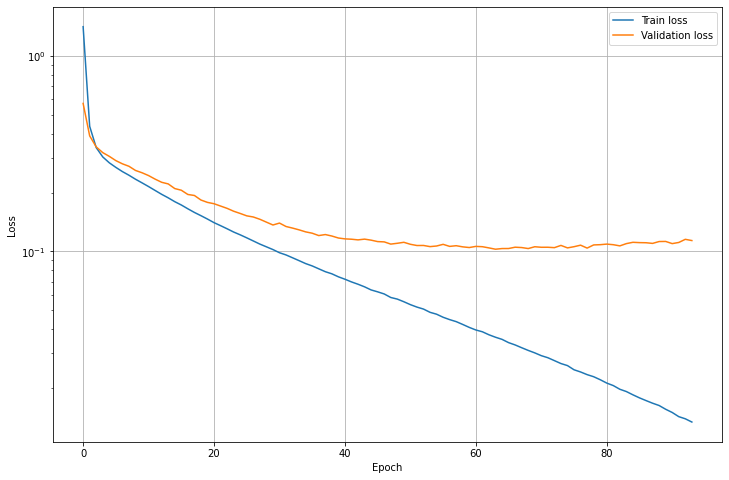

NETWORK INITIALIZATION
--------------------
Iteration: 0
--------------------
Avg train loss: 1.6212115287780762
Avg Validation Loss: 0.7269321084022522
--------------------
Iteration: 10
--------------------
Avg train loss: 0.23892728984355927
Avg Validation Loss: 0.2826259434223175
--------------------
Iteration: 20
--------------------
Avg train loss: 0.16782046854496002
Avg Validation Loss: 0.21481554210186005
--------------------
Iteration: 30
--------------------
Avg train loss: 0.12256918847560883
Avg Validation Loss: 0.1796402484178543
--------------------
Iteration: 40
--------------------
Avg train loss: 0.094399593770504
Avg Validation Loss: 0.15726007521152496
--------------------
Iteration: 50
--------------------
Avg train loss: 0.0743594691157341
Avg Validation Loss: 0.14239402115345
--------------------
Iteration: 60
--------------------
Avg train loss: 0.05829891189932823
Avg Validation Loss: 0.1355041116476059
--------------------
Iteration: 70
--------------------
Av

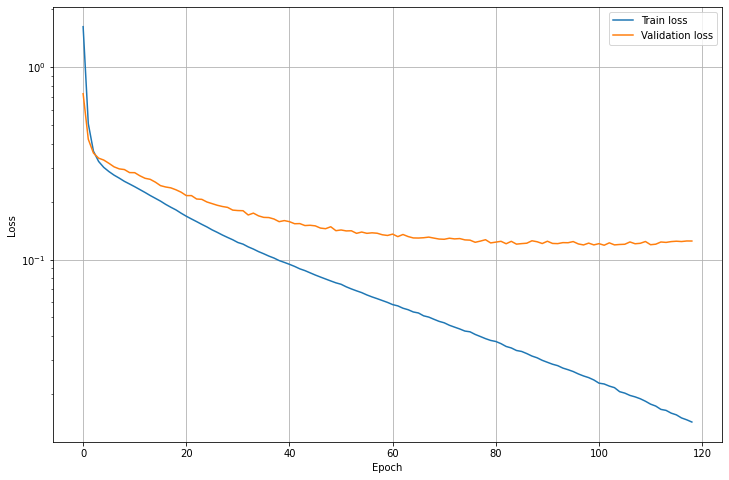

NETWORK INITIALIZATION
--------------------
Iteration: 0
--------------------
Avg train loss: 1.5753947496414185
Avg Validation Loss: 0.6529685258865356
--------------------
Iteration: 10
--------------------
Avg train loss: 0.23239363729953766
Avg Validation Loss: 0.2707388401031494
--------------------
Iteration: 20
--------------------
Avg train loss: 0.1564330756664276
Avg Validation Loss: 0.2043803185224533
--------------------
Iteration: 30
--------------------
Avg train loss: 0.11415494233369827
Avg Validation Loss: 0.17656123638153076
--------------------
Iteration: 40
--------------------
Avg train loss: 0.08648350089788437
Avg Validation Loss: 0.15110552310943604
--------------------
Iteration: 50
--------------------
Avg train loss: 0.06755932420492172
Avg Validation Loss: 0.1388440728187561
--------------------
Iteration: 60
--------------------
Avg train loss: 0.05350393056869507
Avg Validation Loss: 0.13260388374328613
--------------------
Iteration: 70
------------------

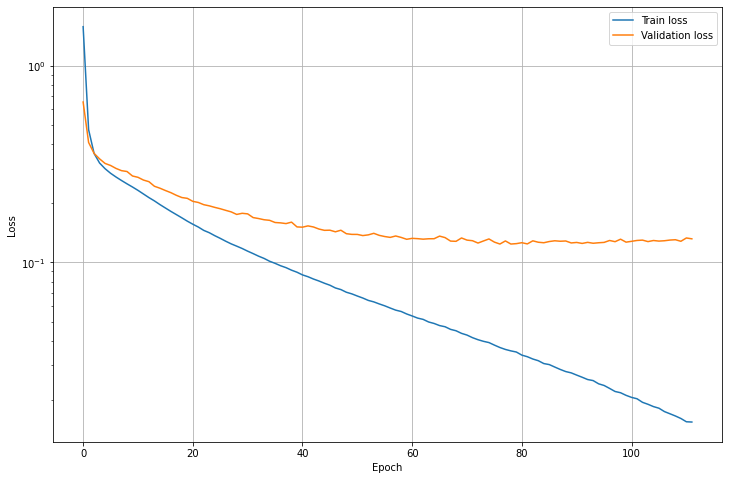

NETWORK INITIALIZATION
--------------------
Iteration: 0
--------------------
Avg train loss: 1.510719895362854
Avg Validation Loss: 0.6442084908485413
--------------------
Iteration: 10
--------------------
Avg train loss: 0.2221740037202835
Avg Validation Loss: 0.26203811168670654
--------------------
Iteration: 20
--------------------
Avg train loss: 0.15213659405708313
Avg Validation Loss: 0.2043350338935852
--------------------
Iteration: 30
--------------------
Avg train loss: 0.11385878920555115
Avg Validation Loss: 0.17492175102233887
--------------------
Iteration: 40
--------------------
Avg train loss: 0.08737652003765106
Avg Validation Loss: 0.1542072892189026
--------------------
Iteration: 50
--------------------
Avg train loss: 0.06815426051616669
Avg Validation Loss: 0.13893647491931915
--------------------
Iteration: 60
--------------------
Avg train loss: 0.05302370339632034
Avg Validation Loss: 0.13522328436374664
--------------------
Iteration: 70
------------------

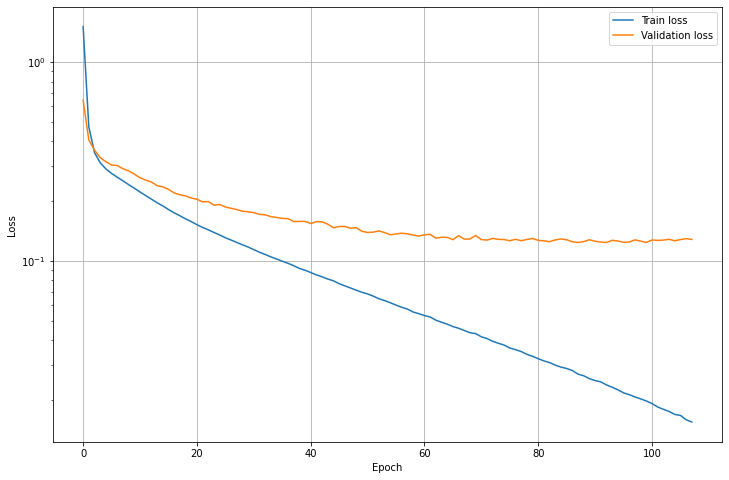

NETWORK INITIALIZATION
--------------------
Iteration: 0
--------------------
Avg train loss: 1.5983140468597412
Avg Validation Loss: 0.6870929598808289
--------------------
Iteration: 10
--------------------
Avg train loss: 0.22386638820171356
Avg Validation Loss: 0.26080071926116943
--------------------
Iteration: 20
--------------------
Avg train loss: 0.16149139404296875
Avg Validation Loss: 0.21128155291080475
--------------------
Iteration: 30
--------------------
Avg train loss: 0.1222725659608841
Avg Validation Loss: 0.1795542687177658
--------------------
Iteration: 40
--------------------
Avg train loss: 0.09524296224117279
Avg Validation Loss: 0.1577320098876953
--------------------
Iteration: 50
--------------------
Avg train loss: 0.07572759687900543
Avg Validation Loss: 0.14500053226947784
--------------------
Iteration: 60
--------------------
Avg train loss: 0.06053270399570465
Avg Validation Loss: 0.13477523624897003
--------------------
Iteration: 70
-----------------

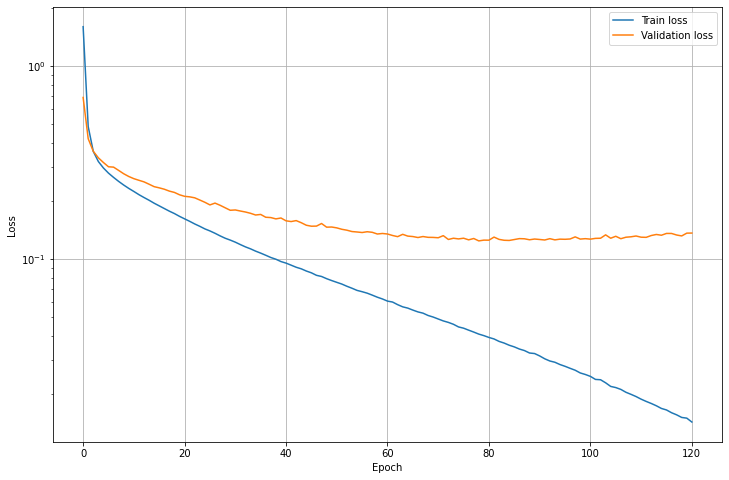

NETWORK INITIALIZATION
--------------------
Iteration: 0
--------------------
Avg train loss: 1.5503716468811035
Avg Validation Loss: 0.646725594997406
--------------------
Iteration: 10
--------------------
Avg train loss: 0.22712309658527374
Avg Validation Loss: 0.2675541639328003
--------------------
Iteration: 20
--------------------
Avg train loss: 0.1606614738702774
Avg Validation Loss: 0.20745258033275604
--------------------
Iteration: 30
--------------------
Avg train loss: 0.12010901421308517
Avg Validation Loss: 0.17484961450099945
--------------------
Iteration: 40
--------------------
Avg train loss: 0.092063307762146
Avg Validation Loss: 0.15266452729701996
--------------------
Iteration: 50
--------------------
Avg train loss: 0.07197796553373337
Avg Validation Loss: 0.14138548076152802
--------------------
Iteration: 60
--------------------
Avg train loss: 0.05652111768722534
Avg Validation Loss: 0.13478675484657288
--------------------
Iteration: 70
-------------------

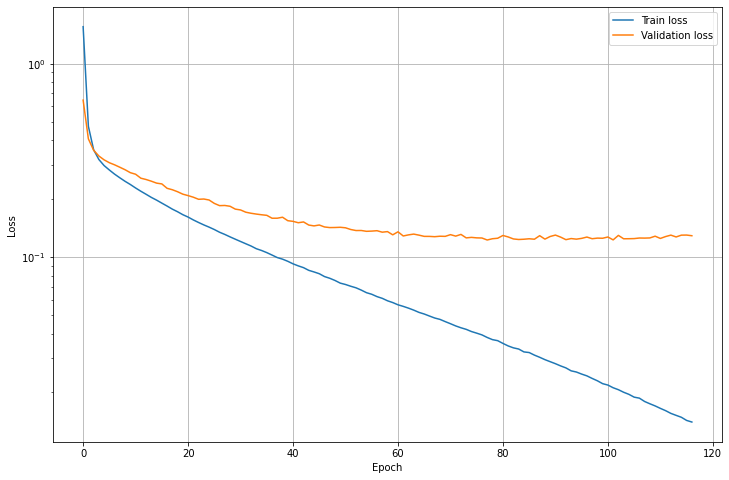

NETWORK INITIALIZATION
--------------------
Iteration: 0
--------------------
Avg train loss: 1.5175739526748657
Avg Validation Loss: 0.6350808143615723
--------------------
Iteration: 10
--------------------
Avg train loss: 0.2384788691997528
Avg Validation Loss: 0.27821680903434753
--------------------
Iteration: 20
--------------------
Avg train loss: 0.1631745994091034
Avg Validation Loss: 0.21079201996326447
--------------------
Iteration: 30
--------------------
Avg train loss: 0.11591505259275436
Avg Validation Loss: 0.17120599746704102
--------------------
Iteration: 40
--------------------
Avg train loss: 0.08664607256650925
Avg Validation Loss: 0.14859148859977722
--------------------
Iteration: 50
--------------------
Avg train loss: 0.0678606629371643
Avg Validation Loss: 0.14212320744991302
--------------------
Iteration: 60
--------------------
Avg train loss: 0.053674906492233276
Avg Validation Loss: 0.1308717131614685
--------------------
Iteration: 70
-----------------

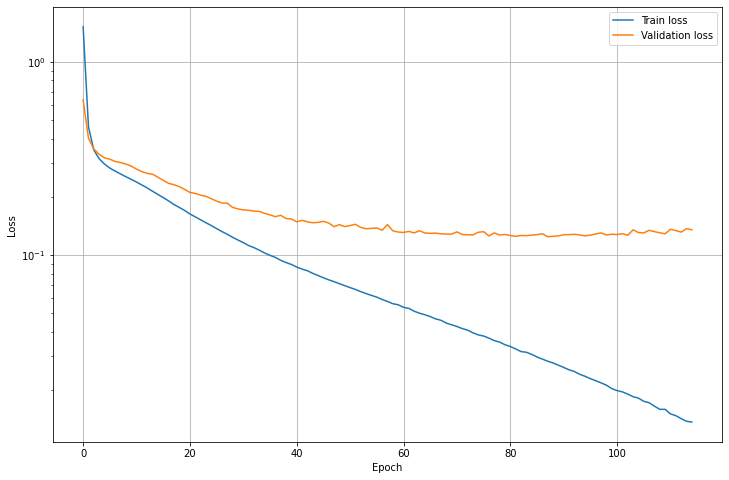

NETWORK INITIALIZATION
--------------------
Iteration: 0
--------------------
Avg train loss: 1.206747055053711
Avg Validation Loss: 0.603544294834137
--------------------
Iteration: 10
--------------------
Avg train loss: 0.21751555800437927
Avg Validation Loss: 0.256526380777359
--------------------
Iteration: 20
--------------------
Avg train loss: 0.15105287730693817
Avg Validation Loss: 0.19651931524276733
--------------------
Iteration: 30
--------------------
Avg train loss: 0.10660362243652344
Avg Validation Loss: 0.15865029394626617
--------------------
Iteration: 40
--------------------
Avg train loss: 0.07652688026428223
Avg Validation Loss: 0.13423067331314087
--------------------
Iteration: 50
--------------------
Avg train loss: 0.05565806105732918
Avg Validation Loss: 0.12088430672883987
--------------------
Iteration: 60
--------------------
Avg train loss: 0.0404304675757885
Avg Validation Loss: 0.11330509185791016
--------------------
Iteration: 70
-------------------

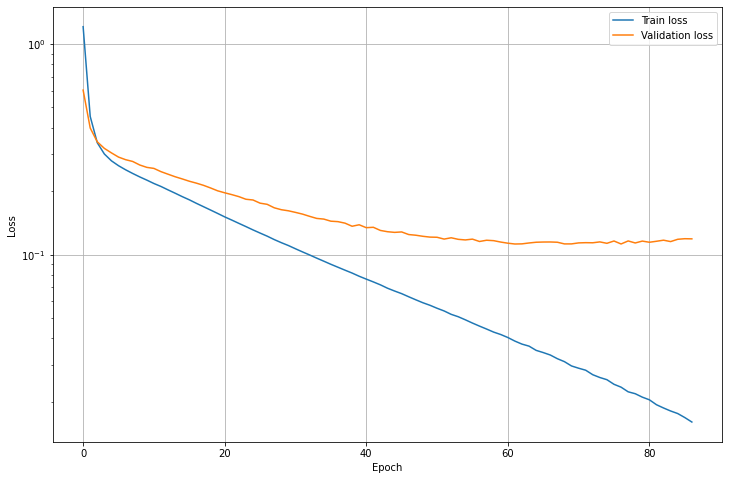

NETWORK INITIALIZATION
--------------------
Iteration: 0
--------------------
Avg train loss: 1.2011067867279053
Avg Validation Loss: 0.5794966816902161
--------------------
Iteration: 10
--------------------
Avg train loss: 0.21129962801933289
Avg Validation Loss: 0.2530912160873413
--------------------
Iteration: 20
--------------------
Avg train loss: 0.14395810663700104
Avg Validation Loss: 0.19092035293579102
--------------------
Iteration: 30
--------------------
Avg train loss: 0.10295180976390839
Avg Validation Loss: 0.15656037628650665
--------------------
Iteration: 40
--------------------
Avg train loss: 0.07590597867965698
Avg Validation Loss: 0.13496971130371094
--------------------
Iteration: 50
--------------------
Avg train loss: 0.055631086230278015
Avg Validation Loss: 0.12175557762384415
--------------------
Iteration: 60
--------------------
Avg train loss: 0.04072895273566246
Avg Validation Loss: 0.11693277209997177
--------------------
Iteration: 70
--------------

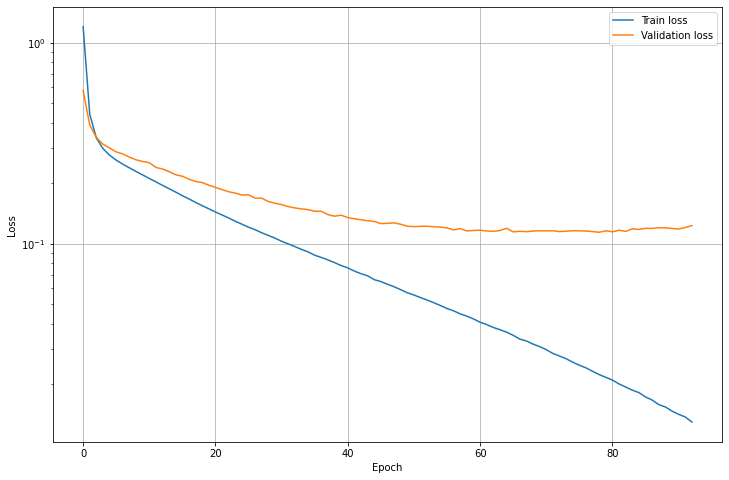

NETWORK INITIALIZATION
--------------------
Iteration: 0
--------------------
Avg train loss: 1.1629379987716675
Avg Validation Loss: 0.5670896768569946
--------------------
Iteration: 10
--------------------
Avg train loss: 0.205986887216568
Avg Validation Loss: 0.24085938930511475
--------------------
Iteration: 20
--------------------
Avg train loss: 0.13684791326522827
Avg Validation Loss: 0.18508662283420563
--------------------
Iteration: 30
--------------------
Avg train loss: 0.0962774008512497
Avg Validation Loss: 0.15217623114585876
--------------------
Iteration: 40
--------------------
Avg train loss: 0.06912527233362198
Avg Validation Loss: 0.13021482527256012
--------------------
Iteration: 50
--------------------
Avg train loss: 0.050403933972120285
Avg Validation Loss: 0.11964035034179688
--------------------
Iteration: 60
--------------------
Avg train loss: 0.036871593445539474
Avg Validation Loss: 0.11700236797332764
--------------------
Iteration: 70
---------------

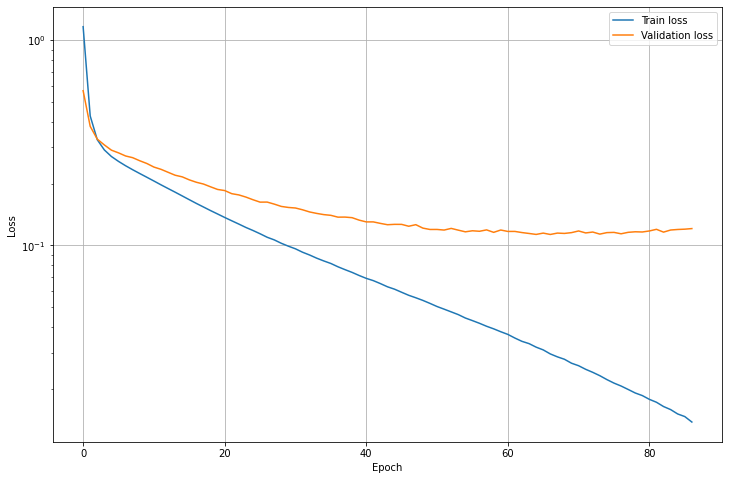

NETWORK INITIALIZATION
--------------------
Iteration: 0
--------------------
Avg train loss: 1.2264381647109985
Avg Validation Loss: 0.6081110835075378
--------------------
Iteration: 10
--------------------
Avg train loss: 0.22042131423950195
Avg Validation Loss: 0.25708162784576416
--------------------
Iteration: 20
--------------------
Avg train loss: 0.154085174202919
Avg Validation Loss: 0.19942493736743927
--------------------
Iteration: 30
--------------------
Avg train loss: 0.11106712371110916
Avg Validation Loss: 0.1645721197128296
--------------------
Iteration: 40
--------------------
Avg train loss: 0.08189705014228821
Avg Validation Loss: 0.14197145402431488
--------------------
Iteration: 50
--------------------
Avg train loss: 0.06060333549976349
Avg Validation Loss: 0.12716616690158844
--------------------
Iteration: 60
--------------------
Avg train loss: 0.044603705406188965
Avg Validation Loss: 0.11678995937108994
--------------------
Iteration: 70
----------------

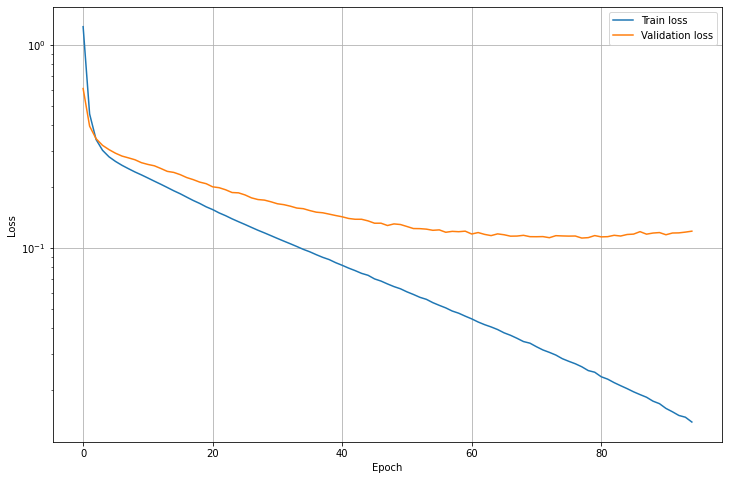

NETWORK INITIALIZATION
--------------------
Iteration: 0
--------------------
Avg train loss: 1.2021429538726807
Avg Validation Loss: 0.5925419926643372
--------------------
Iteration: 10
--------------------
Avg train loss: 0.21081943809986115
Avg Validation Loss: 0.24545378983020782
--------------------
Iteration: 20
--------------------
Avg train loss: 0.1420467346906662
Avg Validation Loss: 0.1863858550786972
--------------------
Iteration: 30
--------------------
Avg train loss: 0.10097210854291916
Avg Validation Loss: 0.15292958915233612
--------------------
Iteration: 40
--------------------
Avg train loss: 0.0725381076335907
Avg Validation Loss: 0.12905152142047882
--------------------
Iteration: 50
--------------------
Avg train loss: 0.052524060010910034
Avg Validation Loss: 0.1182568296790123
--------------------
Iteration: 60
--------------------
Avg train loss: 0.03743070736527443
Avg Validation Loss: 0.11272567510604858
--------------------
Iteration: 70
-----------------

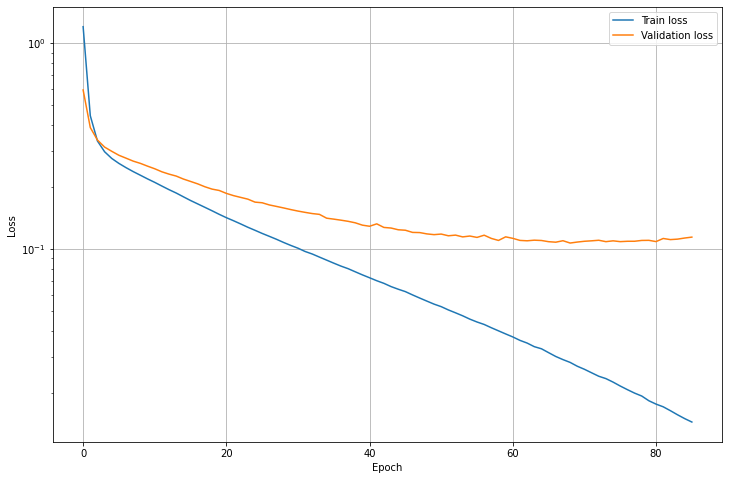

NETWORK INITIALIZATION
--------------------
Iteration: 0
--------------------
Avg train loss: 1.1721100807189941
Avg Validation Loss: 0.566329300403595
--------------------
Iteration: 10
--------------------
Avg train loss: 0.21030987799167633
Avg Validation Loss: 0.24807889759540558
--------------------
Iteration: 20
--------------------
Avg train loss: 0.14017421007156372
Avg Validation Loss: 0.19047188758850098
--------------------
Iteration: 30
--------------------
Avg train loss: 0.09843333810567856
Avg Validation Loss: 0.15646450221538544
--------------------
Iteration: 40
--------------------
Avg train loss: 0.07033251971006393
Avg Validation Loss: 0.13588859140872955
--------------------
Iteration: 50
--------------------
Avg train loss: 0.05014660954475403
Avg Validation Loss: 0.12334275990724564
--------------------
Iteration: 60
--------------------
Avg train loss: 0.03564315661787987
Avg Validation Loss: 0.11808682233095169
--------------------
Iteration: 70
---------------

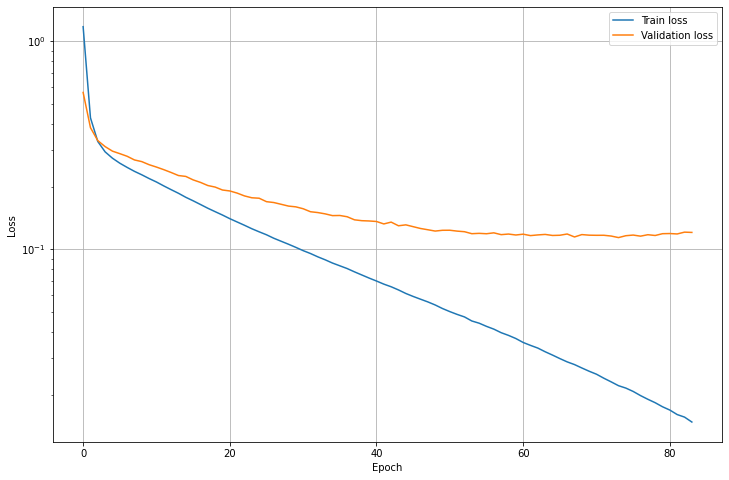

NETWORK INITIALIZATION
--------------------
Iteration: 0
--------------------
Avg train loss: 2.251051187515259
Avg Validation Loss: 2.1537625789642334
--------------------
Iteration: 10
--------------------
Avg train loss: 0.4111190736293793
Avg Validation Loss: 0.340777724981308
--------------------
Iteration: 20
--------------------
Avg train loss: 0.2648461163043976
Avg Validation Loss: 0.21731042861938477
--------------------
Iteration: 30
--------------------
Avg train loss: 0.20588496327400208
Avg Validation Loss: 0.17033950984477997
--------------------
Iteration: 40
--------------------
Avg train loss: 0.16515016555786133
Avg Validation Loss: 0.14066684246063232
--------------------
Iteration: 50
--------------------
Avg train loss: 0.1353270560503006
Avg Validation Loss: 0.12199568748474121
--------------------
Iteration: 60
--------------------
Avg train loss: 0.11290008574724197
Avg Validation Loss: 0.10892137140035629
--------------------
Iteration: 70
--------------------

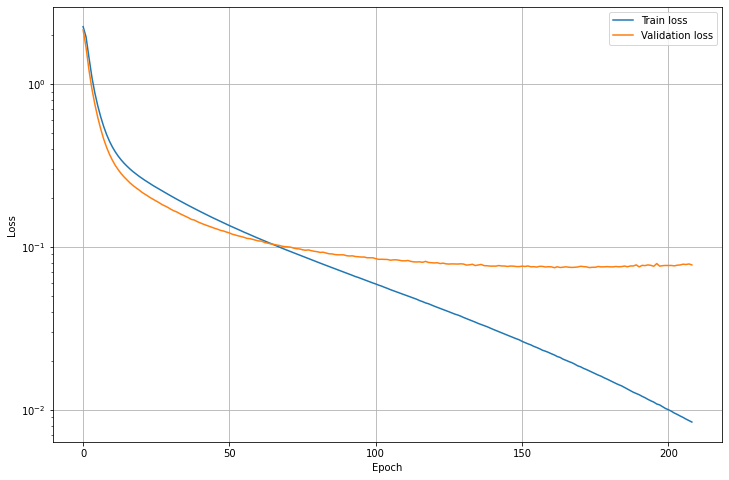

NETWORK INITIALIZATION
--------------------
Iteration: 0
--------------------
Avg train loss: 2.248199701309204
Avg Validation Loss: 2.1409695148468018
--------------------
Iteration: 10
--------------------
Avg train loss: 0.3855014145374298
Avg Validation Loss: 0.3182123601436615
--------------------
Iteration: 20
--------------------
Avg train loss: 0.2543765902519226
Avg Validation Loss: 0.2093251496553421
--------------------
Iteration: 30
--------------------
Avg train loss: 0.19917859137058258
Avg Validation Loss: 0.16565805673599243
--------------------
Iteration: 40
--------------------
Avg train loss: 0.16087797284126282
Avg Validation Loss: 0.13765312731266022
--------------------
Iteration: 50
--------------------
Avg train loss: 0.13173897564411163
Avg Validation Loss: 0.11954138427972794
--------------------
Iteration: 60
--------------------
Avg train loss: 0.10934867709875107
Avg Validation Loss: 0.10814646631479263
--------------------
Iteration: 70
-------------------

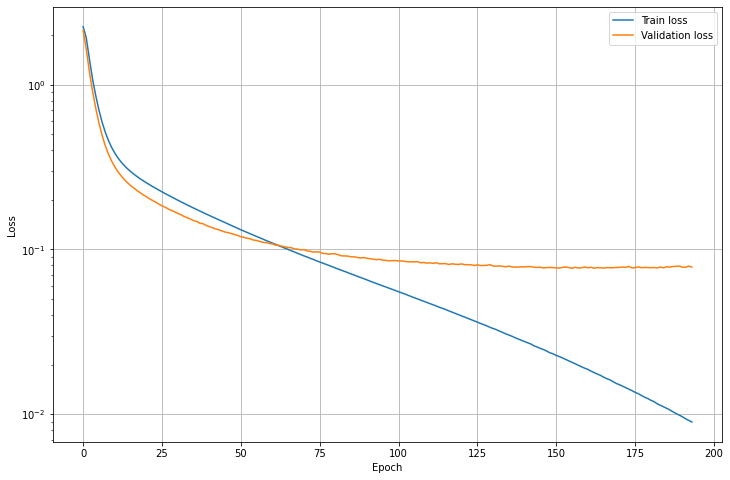

NETWORK INITIALIZATION
--------------------
Iteration: 0
--------------------
Avg train loss: 2.2386815547943115
Avg Validation Loss: 2.1135475635528564
--------------------
Iteration: 10
--------------------
Avg train loss: 0.37336650490760803
Avg Validation Loss: 0.30593714118003845
--------------------
Iteration: 20
--------------------
Avg train loss: 0.24157309532165527
Avg Validation Loss: 0.19729578495025635
--------------------
Iteration: 30
--------------------
Avg train loss: 0.18696345388889313
Avg Validation Loss: 0.15494993329048157
--------------------
Iteration: 40
--------------------
Avg train loss: 0.15022338926792145
Avg Validation Loss: 0.13036726415157318
--------------------
Iteration: 50
--------------------
Avg train loss: 0.12296634912490845
Avg Validation Loss: 0.11459197849035263
--------------------
Iteration: 60
--------------------
Avg train loss: 0.10195527225732803
Avg Validation Loss: 0.10368695855140686
--------------------
Iteration: 70
--------------

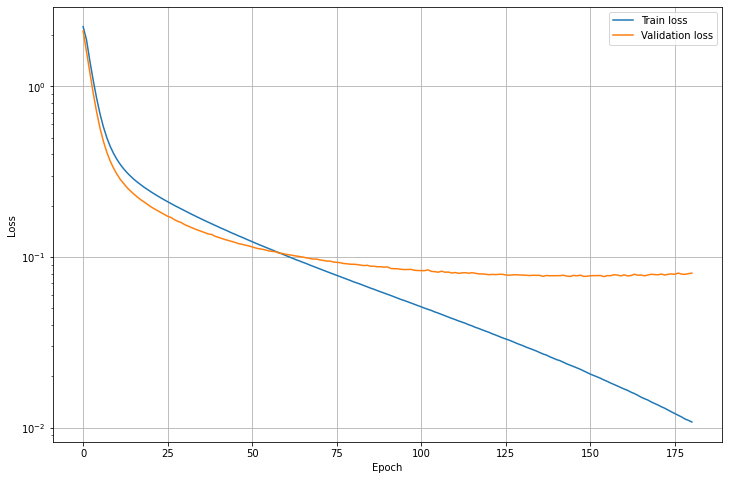

NETWORK INITIALIZATION
--------------------
Iteration: 0
--------------------
Avg train loss: 2.250878095626831
Avg Validation Loss: 2.155364990234375
--------------------
Iteration: 10
--------------------
Avg train loss: 0.40307748317718506
Avg Validation Loss: 0.3329307734966278
--------------------
Iteration: 20
--------------------
Avg train loss: 0.26129868626594543
Avg Validation Loss: 0.21588031947612762
--------------------
Iteration: 30
--------------------
Avg train loss: 0.2050754874944687
Avg Validation Loss: 0.17014120519161224
--------------------
Iteration: 40
--------------------
Avg train loss: 0.16727100312709808
Avg Validation Loss: 0.14272315800189972
--------------------
Iteration: 50
--------------------
Avg train loss: 0.13890939950942993
Avg Validation Loss: 0.12447381764650345
--------------------
Iteration: 60
--------------------
Avg train loss: 0.11622916907072067
Avg Validation Loss: 0.11079732328653336
--------------------
Iteration: 70
------------------

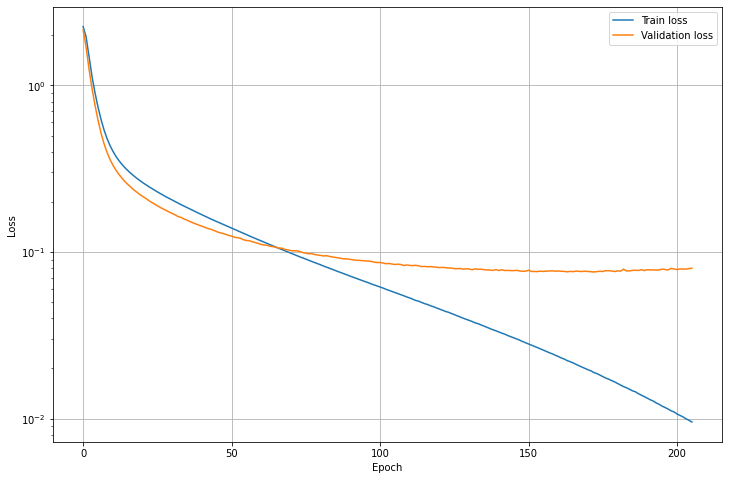

NETWORK INITIALIZATION
--------------------
Iteration: 0
--------------------
Avg train loss: 2.2409839630126953
Avg Validation Loss: 2.123753547668457
--------------------
Iteration: 10
--------------------
Avg train loss: 0.4007761478424072
Avg Validation Loss: 0.33290553092956543
--------------------
Iteration: 20
--------------------
Avg train loss: 0.252769410610199
Avg Validation Loss: 0.20819859206676483
--------------------
Iteration: 30
--------------------
Avg train loss: 0.1958191841840744
Avg Validation Loss: 0.16355638206005096
--------------------
Iteration: 40
--------------------
Avg train loss: 0.1578974425792694
Avg Validation Loss: 0.13543276488780975
--------------------
Iteration: 50
--------------------
Avg train loss: 0.12960661947727203
Avg Validation Loss: 0.11773671954870224
--------------------
Iteration: 60
--------------------
Avg train loss: 0.10773210972547531
Avg Validation Loss: 0.10503005981445312
--------------------
Iteration: 70
--------------------

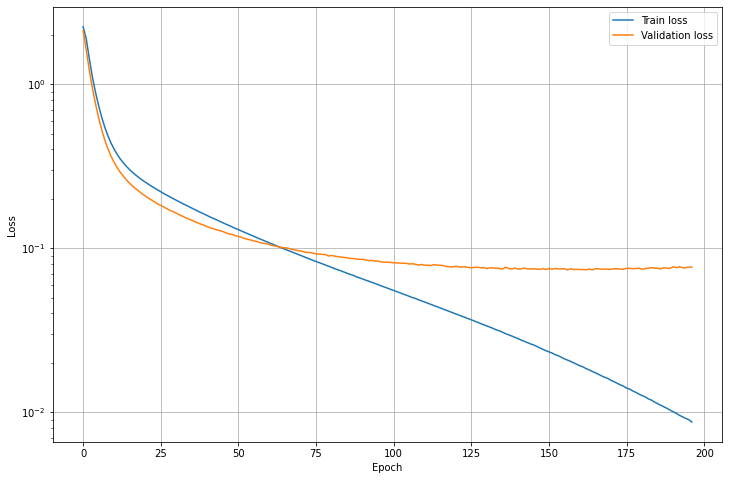

NETWORK INITIALIZATION
--------------------
Iteration: 0
--------------------
Avg train loss: 2.2293310165405273
Avg Validation Loss: 2.088351011276245
--------------------
Iteration: 10
--------------------
Avg train loss: 0.381801575422287
Avg Validation Loss: 0.31206953525543213
--------------------
Iteration: 20
--------------------
Avg train loss: 0.2470846325159073
Avg Validation Loss: 0.20071522891521454
--------------------
Iteration: 30
--------------------
Avg train loss: 0.1907321810722351
Avg Validation Loss: 0.15890352427959442
--------------------
Iteration: 40
--------------------
Avg train loss: 0.1537148654460907
Avg Validation Loss: 0.13222083449363708
--------------------
Iteration: 50
--------------------
Avg train loss: 0.12597903609275818
Avg Validation Loss: 0.11511918157339096
--------------------
Iteration: 60
--------------------
Avg train loss: 0.10429268330335617
Avg Validation Loss: 0.10349921137094498
--------------------
Iteration: 70
--------------------

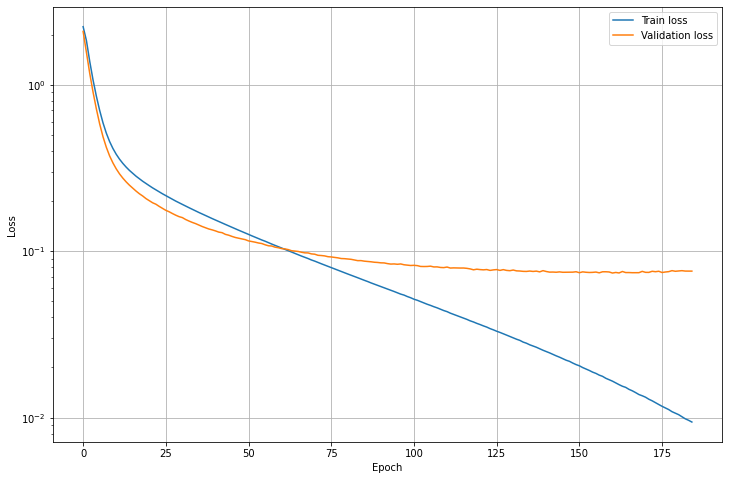

In [ ]:
n_eph=300
train_losses=[]
val_losses=[]
kf=KFold(n_splits=10)
i=0
itr=0
# List of dictionaries containing the model information in order to retrieve them
# for the testing phase
Models=[]
for train, val in kf.split(train_dataset):
  for opt in range(2):
    for un in range(3):
      # Net requires an act_h input, which specificies the desired activation function for the hidden layers
      # Si = Sigmoid()
      # Se = SELU()
      # Ge = GELU()
      # Lk = LeakyRelu()
      # SiL = SiLU()
      if i==0 or i==5:
        act_h='Lk'
      elif i==1 or i==6:
        act_h='Ge'
      elif i==2 or i==7:
        act_h='SiL'
      elif i==3 or i==8:
        act_h='Se'
      elif i==4 or i==9:
        act_h='Si'
      if i<4: 
        net=Net(Ni,Nh1+un*int(mt.ceil(Nh1/15)),Nh2+un*int(mt.ceil(Nh2/15)),No,act_h)
      else:
        net=Net(Ni,Nh1-un*int(mt.ceil(Nh1/15)),Nh2-un*int(mt.ceil(Nh2/15)),No,act_h)
      net.to(device)

      # The idea behind this step is that by increasing the number of hidden units, I should require more
      # sensible changes in the learning rate, and by decreasing that number I should require stronger changes
      if opt==0:
        if i<4:
          optimizer=optim.Adam(net.parameters(), lr=(1e-4-un*(1e-5)), weight_decay=1e-6)
        else:
          optimizer=optim.Adam(net.parameters(), lr=(1e-4+un*(1e-5)), weight_decay=1e-6)
        op="Adam"
      elif opt==1:
        if i<4:
          optimizer=optim.AdamW(net.parameters(), lr=(1e-4-un*(1e-5)), weight_decay=1e-6)
        else:
          optimizer=optim.AdamW(net.parameters(), lr=(1e-4+un*(1e-5)), weight_decay=1e-6)
        op="AdamW"

      # Consider the definition of a scheduler for the dynamic adaptation of the learning rate
    
      if i<4:
        Model={"hidden1":Nh1+un*int(mt.ceil(Nh1/15)),
               "hidden2":Nh2+un*int(mt.ceil(Nh2/15)),
               "Activation":act_h,
               "Optimizer":op}
      else:
        Model={"hidden1":(Nh1-un*int(mt.ceil(Nh1/15))),
               "hidden2":(Nh2-un*int(mt.ceil(Nh2/15))),
               "Activation":act_h,
               "Optimizer":op}
      Models.append(Model)

      # Conversion of the given dataset to Tensors
      Train_kf=DataLoader([(torch.flatten(training_transf(train_dataset[x][0])), train_dataset[x][1]) for x in train], batch_size=256, shuffle=True, num_workers=0)
      Val_kf=DataLoader([(torch.flatten(training_transf(train_dataset[x][0])), train_dataset[x][1]) for x in val], batch_size=256, shuffle=False, num_workers=0)

      train_loss_log=[]
      val_loss_log=[]
      for eph in range(n_eph):
        if (eph%10==0.):
          print("--------------------")
          print("Iteration: "+str(eph))
          print("--------------------")

        # Training phase
        net.train()
        Train_Loss_eph=[]
        for sample in Train_kf:
          sample_data=sample[0].to(device)
          sample_labels=sample[1].to(device)

          Out=net(sample_data)
          Loss=Loss_Function(Out,sample_labels)

          # Backpropagation step
          net.zero_grad()
          Loss.backward()
          optimizer.step()

          # Saving the loss for the epoch
          loss_batch=Loss.detach().cpu().numpy()
          Train_Loss_eph.append(loss_batch)
    
        # Statistics of the training sample loss
        tr_mean=np.mean(Train_Loss_eph)
        tr_std=np.std(Train_Loss_eph)
        if (eph%10)==0.:
          print(f"Avg train loss: {tr_mean}")
        train_loss_log.append(tr_mean)

        # Validation phase
        net.eval()
        Val_Loss_eph=[]
        with torch.no_grad():
          for sample in Val_kf:
            val_data=sample[0].to(device)
            val_labels=sample[1].to(device)

            Out_val=net(val_data)
            Loss=Loss_Function(Out_val, val_labels)

            loss_batch=Loss.detach().cpu().numpy()
    
            Val_Loss_eph.append(loss_batch)

        # Statistics of the validation sample loss
        vl_mean=np.mean(Val_Loss_eph)
        if (eph%10)==0.:
          print(f"Avg Validation Loss: {vl_mean}")
        val_loss_log.append(vl_mean)

        # Early stop condition
        # If the validation loss is increasing, the defined ratio returns an increasing scale
        # Try to define the same ratio preventing exploding ratio of validation scores
        # use exp(val(end)/val(end-1))
        if (eph>50 and (val_loss_log[eph-1]/val_loss_log[eph-2])>1) and vl_mean>(tr_mean+tr_std*5*np.exp(val_loss_log[eph-1]/val_loss_log[eph-2])):
          print("Early Stop condition: SATISFIED!")
          break

      train_losses.append(train_loss_log)
      val_losses.append(val_loss_log)

      # Saving the model in a dedicated file
      net_state_dict=net.state_dict()
      optim_state_dict=optimizer.state_dict()
      # Save the state dict to a file
      name1='net_parameters_'+str(itr)+'.torch'
      name2='net_optimizer_'+str(itr)+'.torch'
      torch.save(net_state_dict, name1)
      torch.save(optim_state_dict,name2)

      # Plot losses
      plt.figure(figsize=(12,8))
      plt.semilogy(train_loss_log, label='Train loss')
      plt.semilogy(val_loss_log, label='Validation loss')
      plt.xlabel('Epoch')
      plt.ylabel('Loss')
      plt.grid()
      plt.legend()
      name3='Train-Val_Loss_'+str(itr)+'.png'
      plt.savefig(name3)
      plt.show()
      

      itr+=1

  i+=1

## Model Choice
I use information from val_losses to choose the more adequate model (and eventually train this model on the whole training dataset) to deploy on the test set.

In [ ]:
# Definition of the best model based on some statistics on the val_losses list
# 10 different model are available for comparison
# Statistics: Mean and Std (based on the last 100 epochs - near convergence)
means=[]
for val in val_losses:
  mean=np.mean(val[-15:])
  means.append(mean)
top=np.copy(means)
top.sort()
BestMod_idx=[]
for score in top[:5]:
   BestMod_idx.append(means.index(score))

## Model Assessment on the Test Set
In this phase I test the best 5 models, based on the scores obtained from the "Model Choice" section on the test dataset and rank them based on their score on this set; I additionally provide also their score on the validation phase as a comparison.

In [ ]:
# Preparation of the test dataset
Test_dt = DataLoader([(torch.flatten(training_transf(test_dataset[x][0])), test_dataset[x][1]) for x in range(len(test_dataset))], batch_size=256, shuffle=False, num_workers=0)

In [ ]:
test_losses=[]
test_score=[]
for idx in BestMod_idx:
  test_loss=[]
  name_net='net_parameters_'+str(idx)+'.torch'
  name_opt='net_optimizer_'+str(idx)+'.torch'
  net=Net(Ni,Models[idx]["hidden1"],Models[idx]["hidden2"],No,Models[idx]["Activation"])
  # loading parameters
  net_state=torch.load(name_net)
  net.load_state_dict(net_state)
  # loading optimizer
  opt_state=torch.load(name_opt)
  optimizer.load_state_dict(opt_state)
  net.to(device)

  # Evaluation on the test set
  with torch.no_grad():
    for sample in Test_dt:
      image=sample[0].to(device)
      label=sample[1].to(device)
    
      lb_out=net(image)
      Loss=Loss_Function(lb_out, label)
      loss_batch=Loss.detach().cpu().numpy()

      test_loss.append(loss_batch)

  test_mn=np.mean(test_loss)
  test_losses.append(test_mn)

  print("-------------------------")
  print("Test Loss: "+str(test_mn))
  print("Model: ")
  print(Models[idx])
  print("Model Index: "+str(idx))
  print("-------------------------")

NETWORK INITIALIZATION
-------------------------
Test Loss: 0.07507472
Model: 
{'hidden1': 130, 'hidden2': 130, 'Activation': 'Si', 'Optimizer': 'AdamW'}
Model Index: 59
-------------------------
NETWORK INITIALIZATION
-------------------------
Test Loss: 0.07757063
Model: 
{'hidden1': 140, 'hidden2': 140, 'Activation': 'Si', 'Optimizer': 'AdamW'}
Model Index: 58
-------------------------
NETWORK INITIALIZATION
-------------------------
Test Loss: 0.07470354
Model: 
{'hidden1': 150, 'hidden2': 150, 'Activation': 'Si', 'Optimizer': 'Adam'}
Model Index: 54
-------------------------
NETWORK INITIALIZATION
-------------------------
Test Loss: 0.07109503
Model: 
{'hidden1': 140, 'hidden2': 140, 'Activation': 'Si', 'Optimizer': 'Adam'}
Model Index: 55
-------------------------
NETWORK INITIALIZATION
-------------------------
Test Loss: 0.07428411
Model: 
{'hidden1': 150, 'hidden2': 150, 'Activation': 'Si', 'Optimizer': 'Adam'}
Model Index: 24
-------------------------


## Network Analysis
Plotting of the histograms for the weights distribution in the two hidden layers, as well as the receptive fields for units in h1, h2, and in the output layer (where presumably we should see a coarse rendering of the digits).

In [ ]:
def RF_1(w_h1, n_vis, index):
  # w_h1: weight matrix between input layer and first hidden layer
  # n_vis: number of receptive fields to visualize

  n_x=mt.floor(mt.sqrt(n_vis))
  n_y=n_x
  n_vis=n_x*n_y
  
  fig, axs = plt.subplots(1,n_vis, figsize=(9,9))
  for i in range(n_vis):
    w1=w_h1.T[:,i]
    w1=np.reshape(w1,(28,28))
    idx=abs(w1) < 0.       #Threshold for activation
    w1[idx]=0

    axs[i].imshow(w1, cmap="gray")
  plt.tight_layout()
  name = "ReceptiveField_L1_"+str(index)+".png"
  plt.savefig(name)
  plt.show()

In [ ]:
def RF_2(w_h1, w_h2, n_vis, index):
  n_x=mt.floor(mt.sqrt(n_vis))
  n_y=n_x
  n_vis=n_x*n_y

  fig, axs = plt.subplots(1,n_vis, figsize=(9,9))
  for i in range(n_vis):
    w2=w_h2.T[:,i]
    w2=np.matmul(w_h1.T,w2)
    w2=np.reshape(w2,(28,28))
    idx=abs(w2) < 0.
    w2[idx]=0

    axs[i].imshow(w2, cmap="gray")
  plt.tight_layout()
  name = "ReceptiveField_L2_"+str(index)+".png"
  plt.savefig(name)
  plt.show()

In [ ]:
def RF_3(w_h1, w_h2, w_h3, n_vis, index):
  n_x=mt.floor(mt.sqrt(n_vis))
  n_y=n_x
  n_vis=n_x*n_y

  fig, axs = plt.subplots(1,n_vis, figsize=(9,9))
  for i in range(n_vis):
    w3=w_h3.T[:,i]
    ww=np.matmul(w_h1.T,w_h2.T)
    w3=np.matmul(ww,w3)
    w3=np.reshape(w3,(28,28))
    idx=abs(w3) < 0.
    w3[idx]=0

    axs[i].imshow(w3, cmap="gray")
  plt.tight_layout()
  name = "ReceptiveField_L3_"+str(index)+".png"
  plt.savefig(name)
  plt.show()

NETWORK INITIALIZATION
Weights' distribution for model: 59


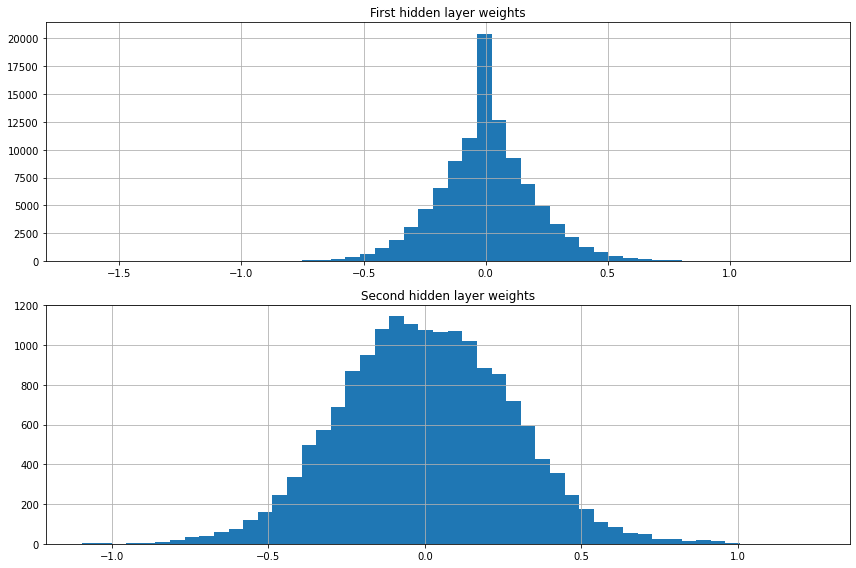

Biases' distribution for model: 59


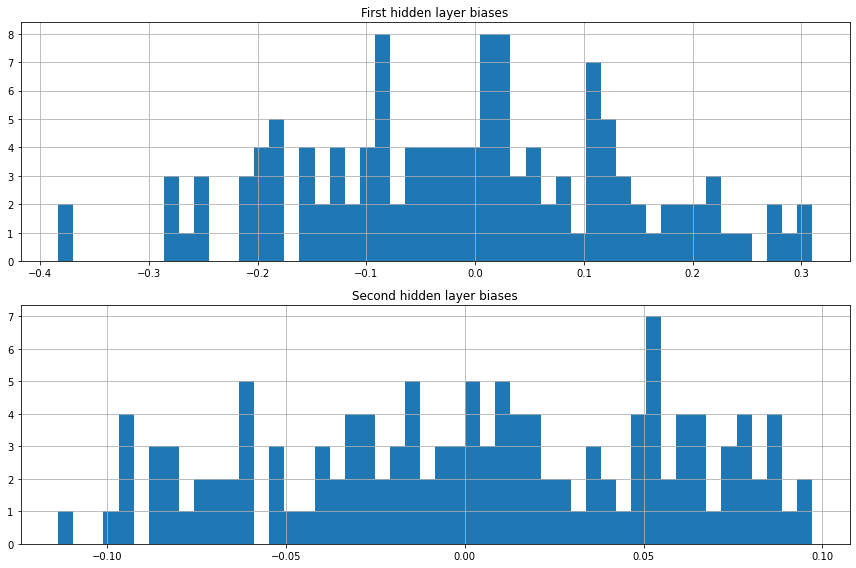

Receptive fields


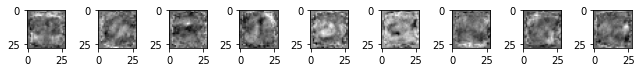

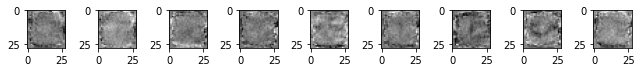

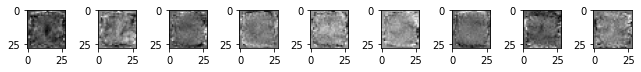

NETWORK INITIALIZATION
Weights' distribution for model: 58


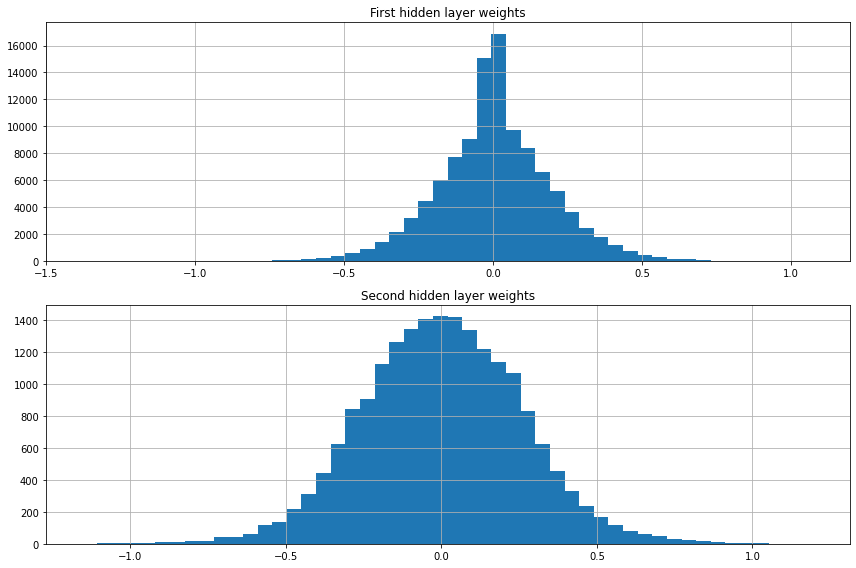

Biases' distribution for model: 58


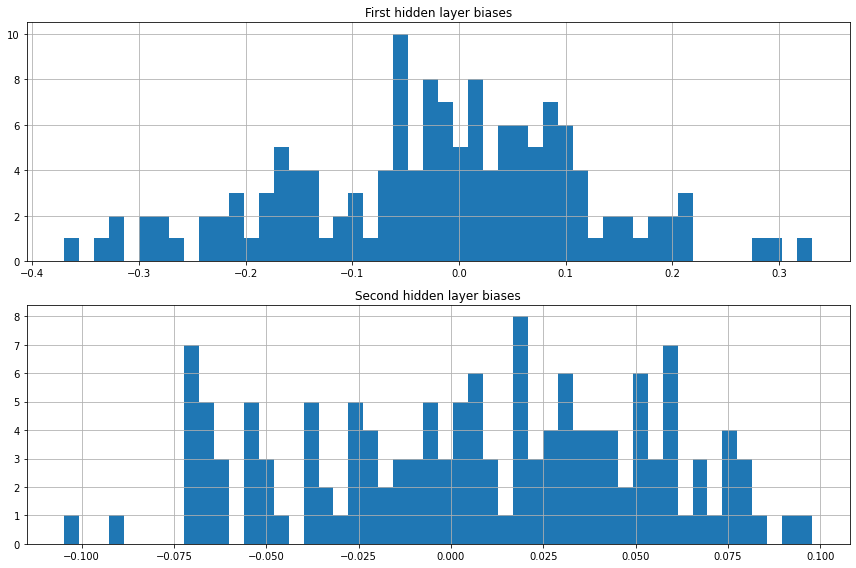

Receptive fields


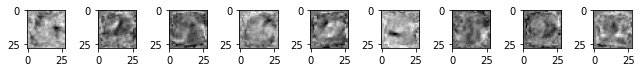

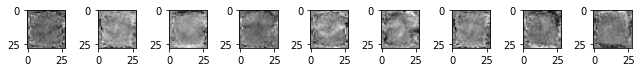

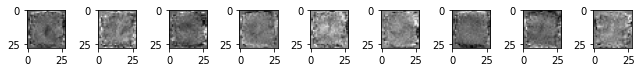

NETWORK INITIALIZATION
Weights' distribution for model: 54


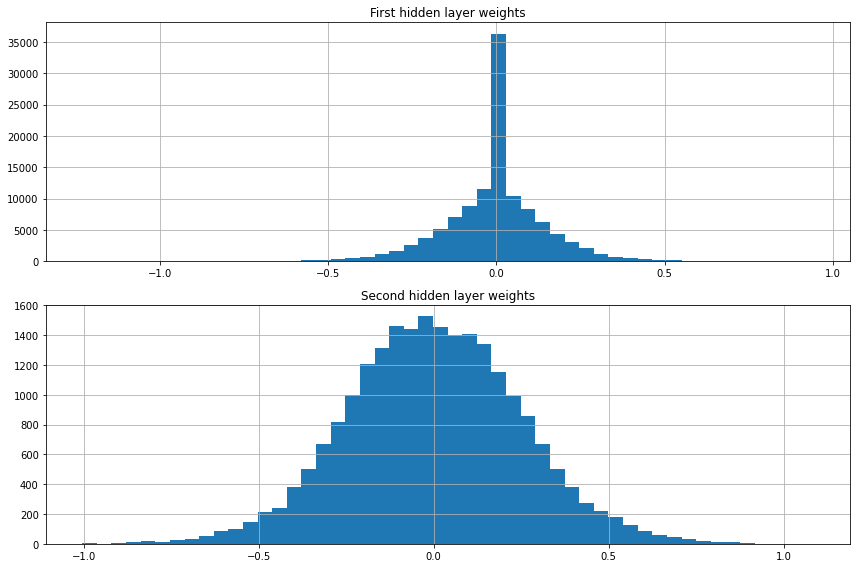

Biases' distribution for model: 54


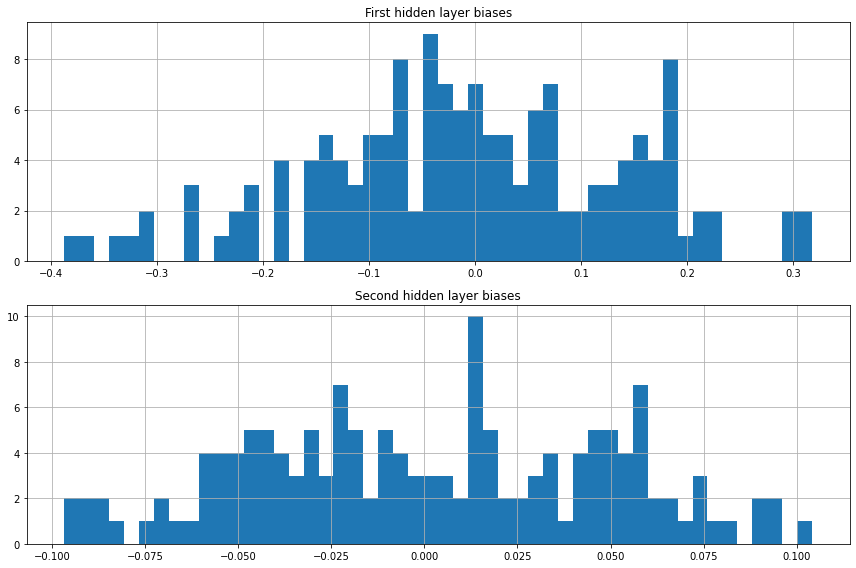

Receptive fields


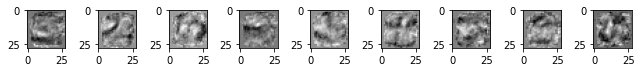

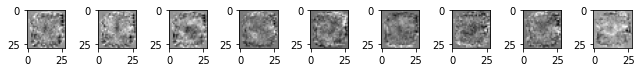

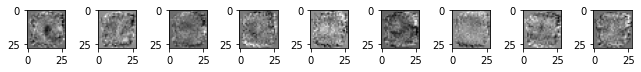

NETWORK INITIALIZATION
Weights' distribution for model: 55


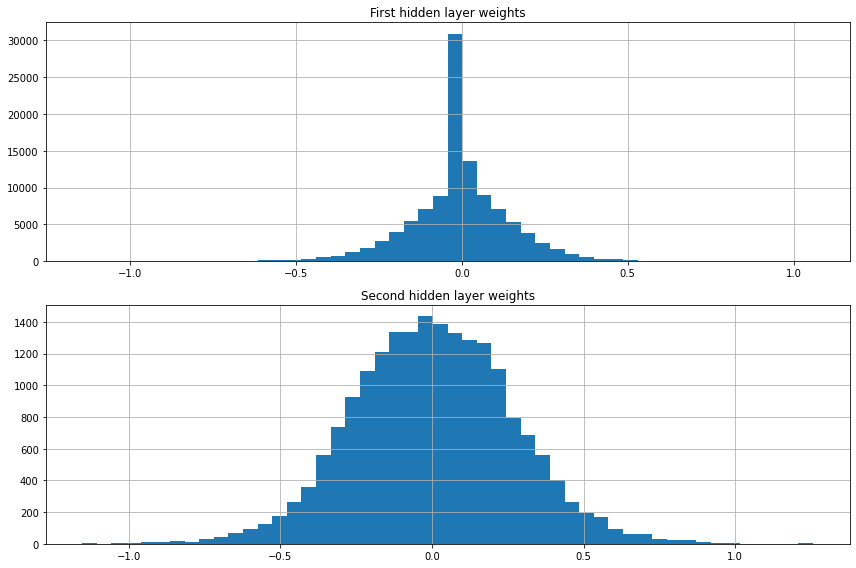

Biases' distribution for model: 55


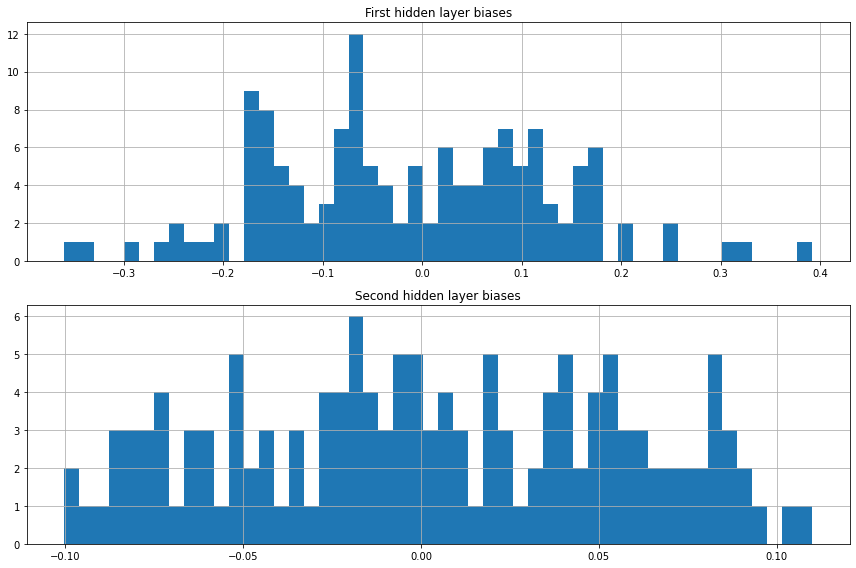

Receptive fields


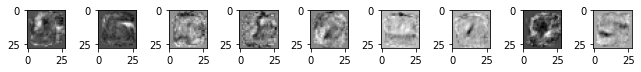

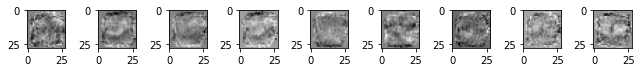

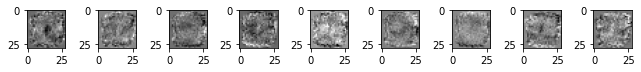

NETWORK INITIALIZATION
Weights' distribution for model: 24


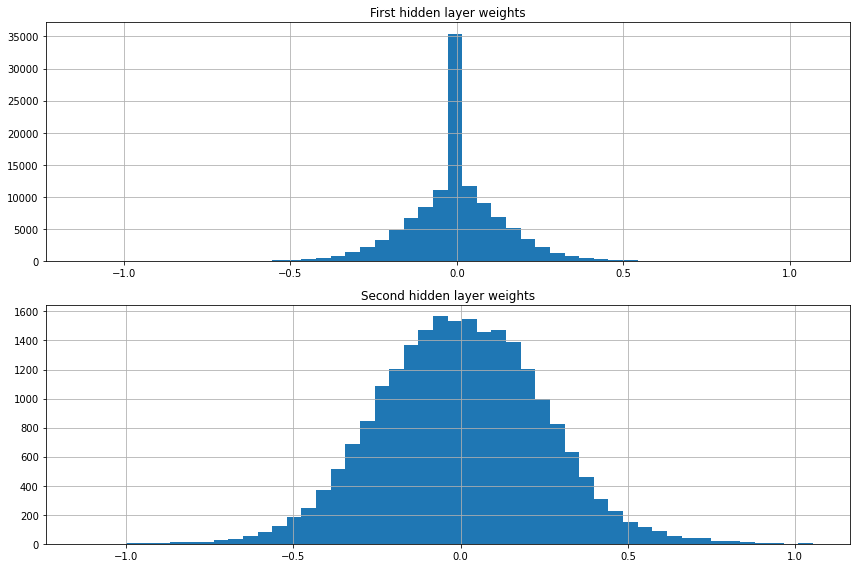

Biases' distribution for model: 24


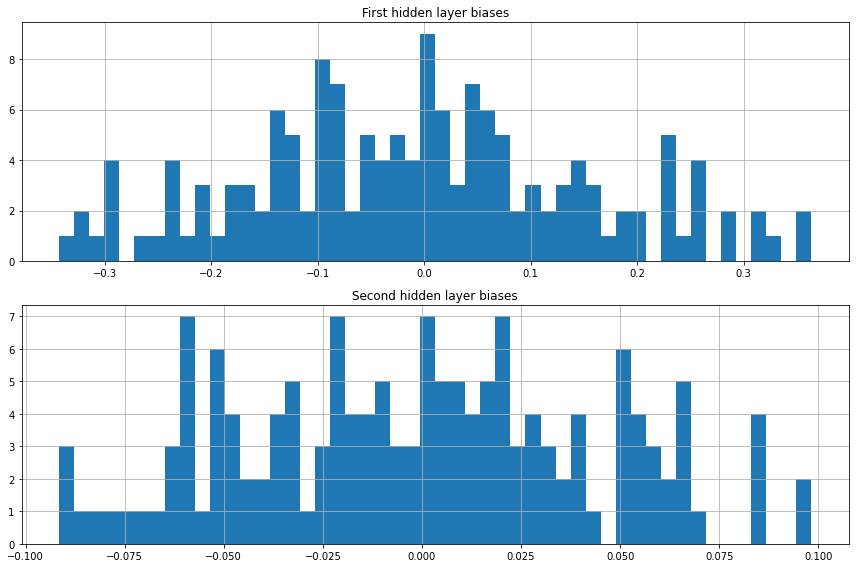

Receptive fields


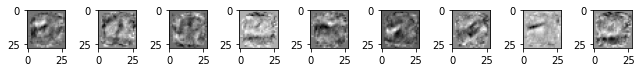

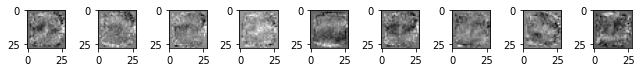

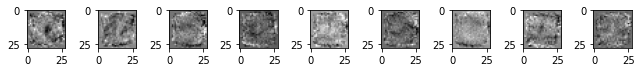

In [ ]:
for idx in BestMod_idx:
  name_net='net_parameters_'+str(idx)+'.torch'
  name_opt='net_optimizer_'+str(idx)+'.torch'
  net=Net(Ni,Models[idx]["hidden1"],Models[idx]["hidden2"],No,Models[idx]["Activation"])

  net_state=torch.load(name_net)
  net.load_state_dict(net_state)

  opt_state=torch.load(name_opt)
  optimizer.load_state_dict(opt_state)

  w_h1=net.fc1.weight.data.cpu().numpy()
  w_h2=net.fc2.weight.data.cpu().numpy()
  w_h3=net.out.weight.data.cpu().numpy()

  b_h1=net.fc1.bias.data.cpu().numpy()
  b_h2=net.fc2.bias.data.cpu().numpy()

  print("Weights' distribution for model: "+str(idx))
  fig, axs = plt.subplots(2, 1, figsize=(12,8))
  axs[0].hist(w_h1.flatten(), 50)
  axs[0].set_title('First hidden layer weights')
  axs[1].hist(w_h2.flatten(), 50)
  axs[1].set_title('Second hidden layer weights')
  [ax.grid() for ax in axs]
  plt.tight_layout()
  nameW="WeightsDistributionMod_"+str(idx)
  plt.savefig(nameW)
  plt.show()
  

  print("Biases' distribution for model: "+str(idx))
  fig, axs = plt.subplots(2, 1, figsize=(12,8))
  axs[0].hist(b_h1.flatten(), 50)
  axs[0].set_title('First hidden layer biases')
  axs[1].hist(b_h2.flatten(), 50)
  axs[1].set_title('Second hidden layer biases')
  [ax.grid() for ax in axs]
  plt.tight_layout()
  nameB="BiasestDistributionMod_"+str(idx)
  plt.savefig(nameB)
  plt.show()
  

  print("Receptive fields")
  RF_1(w_h1, 9, idx)
  RF_2(w_h1, w_h2, 9, idx)
  RF_3(w_h1, w_h2, w_h3, 10, idx)

 # Convolutional Model (CNN)
I hereby implement a CNN to perform the same kind of task, and later compare the results with those from the classical architecture.

## Net

In [ ]:
class NetCNN(nn.Module):

  def __init__(self,No, Ch1, Ch2, act_h):
    # Definition of the convolutional layers
    # Definition of the linear layer
    super().__init__()

    print("Network Initialized")
    self.cnn=nn.Sequential(
      # First convolutional layer
      nn.Conv2d(1,Ch1, kernel_size=3, padding=1, stride=2),
      nn.MaxPool2d(kernel_size=3, stride=2),
      # Second convolutional layer
      nn.Conv2d(Ch1, Ch2, kernel_size=3, padding=1, stride=2),
      #nn.MaxPool2d(kernel_size=2, stride=2) 
      )
    
    # Flattening module
    self.flatten=nn.Flatten(start_dim=1)

    if act_h=="Lk":
      self.lin=nn.Sequential(
        # First Linear Layer
        nn.Linear((Ch2*3*3), 128),
        nn.LeakyReLU(),
        #Second linear
        nn.Linear(128,128),
        nn.LeakyReLU(),
        # Output Linear Layer
        nn.Linear(128,No)  
        )  
    elif act_h=="Ge":
      self.lin=nn.Sequential(
        # First Linear Layer
        nn.Linear((Ch2*3*3), 128),
        nn.GELU(),
        # Second Linear Layer
        nn.Linear(128,128),
        nn.GELU(),
        # Output Linear layer
        nn.Linear(128,No)  
        )  
    elif act_h=="SiL":
      self.lin=nn.Sequential(
        # First Linear Layer
        nn.Linear((Ch2*3*3), 128),
        nn.SiLU(),
        # Second Linear Layer
        nn.Linear(128,128),
        nn.SiLU(),
        # Third Linear layer
        nn.Linear(128,No)  
        )  
    elif act_h=="Se":
      self.lin=nn.Sequential(
        # First Linear Layer
        nn.Linear((Ch2*3*3), 128),
        nn.SELU(),
        # Second Linear Layer
        nn.Linear(128,128),
        nn.SELU(),
        # Third Linear Layer
        nn.Linear(128,No)  
        )  
    elif act_h=="Si":
      self.lin=nn.Sequential(
        # First Linear Layer
        nn.Linear((Ch2*3*3), 128),
        nn.Sigmoid(),
        # Second Linear Layer
        nn.Linear(128,128),
        nn.Sigmoid(),
        # Third Linear Layer
        nn.Linear(128,No)  
        )  
    
  def forward(self,x):
    x=self.cnn(x)
    x=self.flatten(x)
    out=self.lin(x)
    return out

## Training Loop
Training loop for the Convolutional Model; it is very similar to the one for the simple ANN architecture, but contrary to the former it does not dive into parameters search.

In [ ]:
train_dataset.transform = training_transf

Network Initialized
--------------------
Iteration: 0
--------------------
Avg train loss: 2.057448625564575
Avg Validation Loss: 1.4760947227478027
--------------------
Iteration: 10
--------------------
Avg train loss: 0.2041538506746292
Avg Validation Loss: 0.19364742934703827
--------------------
Iteration: 20
--------------------
Avg train loss: 0.1363135129213333
Avg Validation Loss: 0.1302734762430191
--------------------
Iteration: 30
--------------------
Avg train loss: 0.10738687217235565
Avg Validation Loss: 0.10408308357000351
--------------------
Iteration: 40
--------------------
Avg train loss: 0.08957257866859436
Avg Validation Loss: 0.08984587341547012
--------------------
Iteration: 50
--------------------
Avg train loss: 0.07652618736028671
Avg Validation Loss: 0.0814768597483635
--------------------
Iteration: 60
--------------------
Avg train loss: 0.06674707680940628
Avg Validation Loss: 0.07665696740150452
--------------------
Iteration: 70
--------------------
A

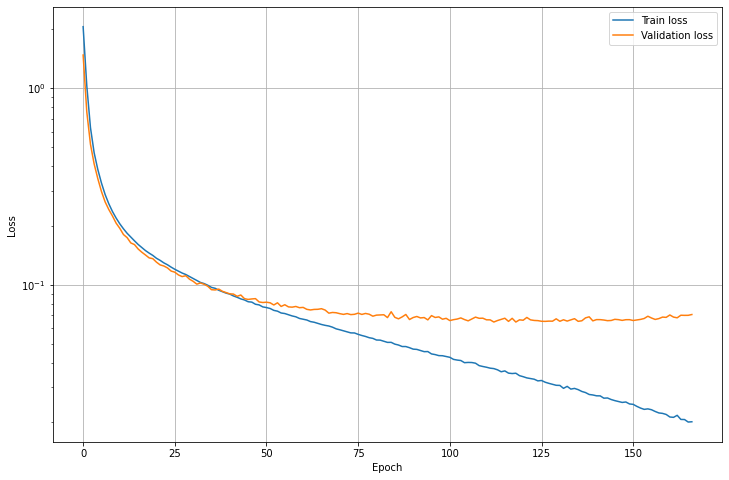

Network Initialized
--------------------
Iteration: 0
--------------------
Avg train loss: 1.9360584020614624
Avg Validation Loss: 1.2219908237457275
--------------------
Iteration: 10
--------------------
Avg train loss: 0.2434149831533432
Avg Validation Loss: 0.22593486309051514
--------------------
Iteration: 20
--------------------
Avg train loss: 0.1464056670665741
Avg Validation Loss: 0.144627645611763
--------------------
Iteration: 30
--------------------
Avg train loss: 0.11046873033046722
Avg Validation Loss: 0.1119261160492897
--------------------
Iteration: 40
--------------------
Avg train loss: 0.08977602422237396
Avg Validation Loss: 0.0966123715043068
--------------------
Iteration: 50
--------------------
Avg train loss: 0.07508116960525513
Avg Validation Loss: 0.08288276195526123
--------------------
Iteration: 60
--------------------
Avg train loss: 0.06410495936870575
Avg Validation Loss: 0.07499540597200394
--------------------
Iteration: 70
--------------------
Av

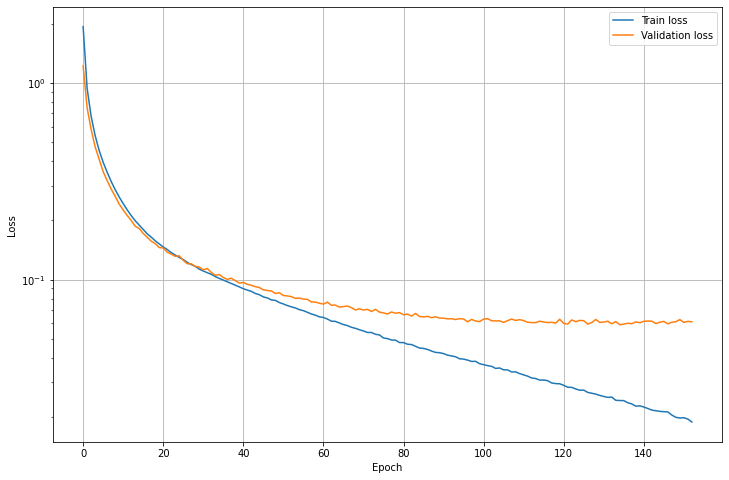

Network Initialized
--------------------
Iteration: 0
--------------------
Avg train loss: 1.9343585968017578
Avg Validation Loss: 1.1512500047683716
--------------------
Iteration: 10
--------------------
Avg train loss: 0.26067671179771423
Avg Validation Loss: 0.26661476492881775
--------------------
Iteration: 20
--------------------
Avg train loss: 0.1621781289577484
Avg Validation Loss: 0.1789846569299698
--------------------
Iteration: 30
--------------------
Avg train loss: 0.12043996900320053
Avg Validation Loss: 0.13677285611629486
--------------------
Iteration: 40
--------------------
Avg train loss: 0.09596209228038788
Avg Validation Loss: 0.11318143457174301
--------------------
Iteration: 50
--------------------
Avg train loss: 0.07849087566137314
Avg Validation Loss: 0.09708889573812485
--------------------
Iteration: 60
--------------------
Avg train loss: 0.06668340414762497
Avg Validation Loss: 0.0894133672118187
--------------------
Iteration: 70
--------------------

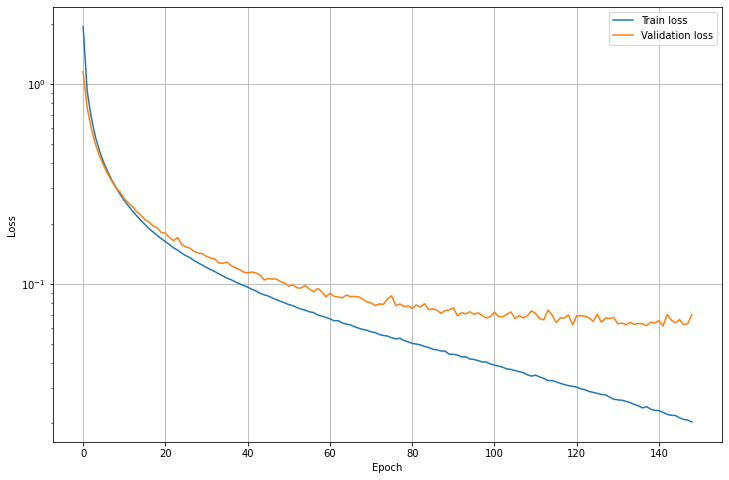

Network Initialized
--------------------
Iteration: 0
--------------------
Avg train loss: 1.9072424173355103
Avg Validation Loss: 1.0865683555603027
--------------------
Iteration: 10
--------------------
Avg train loss: 0.24206195771694183
Avg Validation Loss: 0.2502577006816864
--------------------
Iteration: 20
--------------------
Avg train loss: 0.15210512280464172
Avg Validation Loss: 0.16291853785514832
--------------------
Iteration: 30
--------------------
Avg train loss: 0.1149204671382904
Avg Validation Loss: 0.13078740239143372
--------------------
Iteration: 40
--------------------
Avg train loss: 0.0935981422662735
Avg Validation Loss: 0.10643765330314636
--------------------
Iteration: 50
--------------------
Avg train loss: 0.07866668701171875
Avg Validation Loss: 0.0931016281247139
--------------------
Iteration: 60
--------------------
Avg train loss: 0.06682942062616348
Avg Validation Loss: 0.08520492166280746
--------------------
Iteration: 70
--------------------


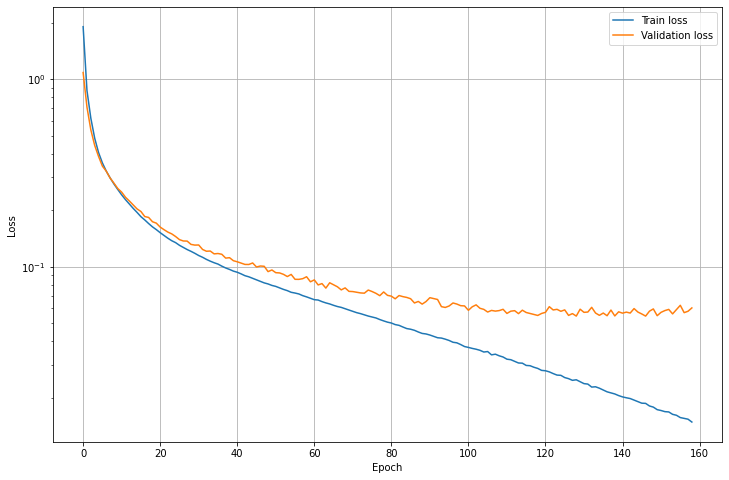

Network Initialized
--------------------
Iteration: 0
--------------------
Avg train loss: 1.9704173803329468
Avg Validation Loss: 1.185197114944458
--------------------
Iteration: 10
--------------------
Avg train loss: 0.251955509185791
Avg Validation Loss: 0.27527475357055664
--------------------
Iteration: 20
--------------------
Avg train loss: 0.16336381435394287
Avg Validation Loss: 0.1826389580965042
--------------------
Iteration: 30
--------------------
Avg train loss: 0.12423679977655411
Avg Validation Loss: 0.14248213171958923
--------------------
Iteration: 40
--------------------
Avg train loss: 0.10054777562618256
Avg Validation Loss: 0.11422490328550339
--------------------
Iteration: 50
--------------------
Avg train loss: 0.08491621166467667
Avg Validation Loss: 0.09517348557710648
--------------------
Iteration: 60
--------------------
Avg train loss: 0.07345610857009888
Avg Validation Loss: 0.08316553384065628
--------------------
Iteration: 70
--------------------


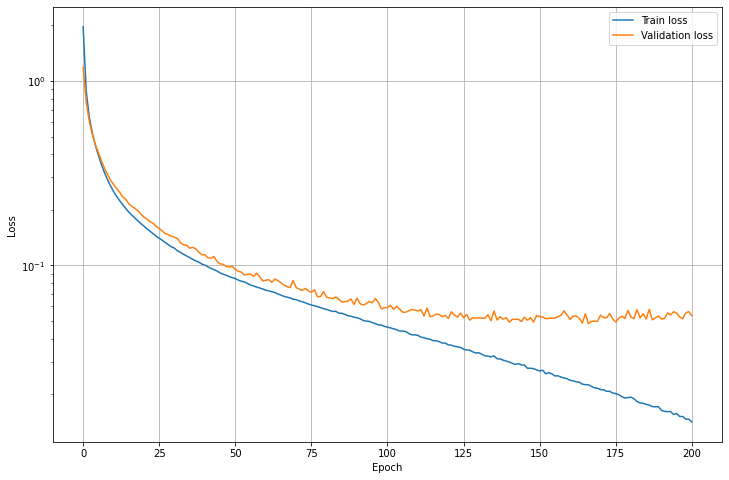

Network Initialized
--------------------
Iteration: 0
--------------------
Avg train loss: 2.0186362266540527
Avg Validation Loss: 1.3154009580612183
--------------------
Iteration: 10
--------------------
Avg train loss: 0.20098894834518433
Avg Validation Loss: 0.21592535078525543
--------------------
Iteration: 20
--------------------
Avg train loss: 0.13625313341617584
Avg Validation Loss: 0.152659609913826
--------------------
Iteration: 30
--------------------
Avg train loss: 0.10682741552591324
Avg Validation Loss: 0.11919581890106201
--------------------
Iteration: 40
--------------------
Avg train loss: 0.08865086734294891
Avg Validation Loss: 0.10405246168375015
--------------------
Iteration: 50
--------------------
Avg train loss: 0.07521556317806244
Avg Validation Loss: 0.08899637311697006
--------------------
Iteration: 60
--------------------
Avg train loss: 0.06630735844373703
Avg Validation Loss: 0.08375359326601028
--------------------
Iteration: 70
-------------------

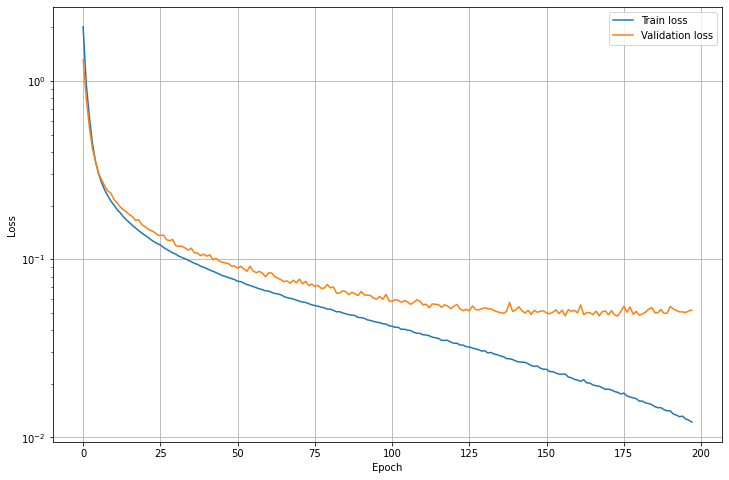

Network Initialized
--------------------
Iteration: 0
--------------------
Avg train loss: 1.686898946762085
Avg Validation Loss: 1.022326946258545
--------------------
Iteration: 10
--------------------
Avg train loss: 0.1796169877052307
Avg Validation Loss: 0.1686909794807434
--------------------
Iteration: 20
--------------------
Avg train loss: 0.12314954400062561
Avg Validation Loss: 0.12107264250516891
--------------------
Iteration: 30
--------------------
Avg train loss: 0.09733926504850388
Avg Validation Loss: 0.09974510222673416
--------------------
Iteration: 40
--------------------
Avg train loss: 0.08110243082046509
Avg Validation Loss: 0.08639127016067505
--------------------
Iteration: 50
--------------------
Avg train loss: 0.06986740231513977
Avg Validation Loss: 0.07947760820388794
--------------------
Iteration: 60
--------------------
Avg train loss: 0.06142475828528404
Avg Validation Loss: 0.0752696618437767
--------------------
Iteration: 70
--------------------
A

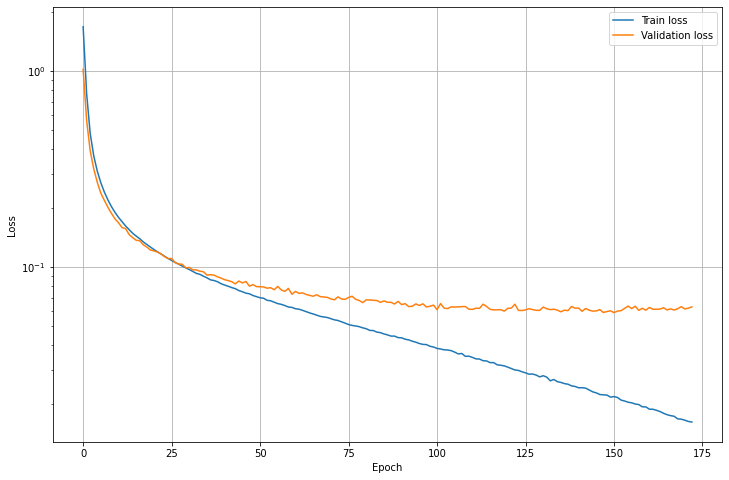

Network Initialized
--------------------
Iteration: 0
--------------------
Avg train loss: 1.7493535280227661
Avg Validation Loss: 1.113881230354309
--------------------
Iteration: 10
--------------------
Avg train loss: 0.17831963300704956
Avg Validation Loss: 0.16586697101593018
--------------------
Iteration: 20
--------------------
Avg train loss: 0.11189833283424377
Avg Validation Loss: 0.10636600106954575
--------------------
Iteration: 30
--------------------
Avg train loss: 0.08669061958789825
Avg Validation Loss: 0.08806133270263672
--------------------
Iteration: 40
--------------------
Avg train loss: 0.07208727300167084
Avg Validation Loss: 0.0785040482878685
--------------------
Iteration: 50
--------------------
Avg train loss: 0.06107110530138016
Avg Validation Loss: 0.07089904695749283
--------------------
Iteration: 60
--------------------
Avg train loss: 0.0526583269238472
Avg Validation Loss: 0.0680989995598793
--------------------
Iteration: 70
--------------------


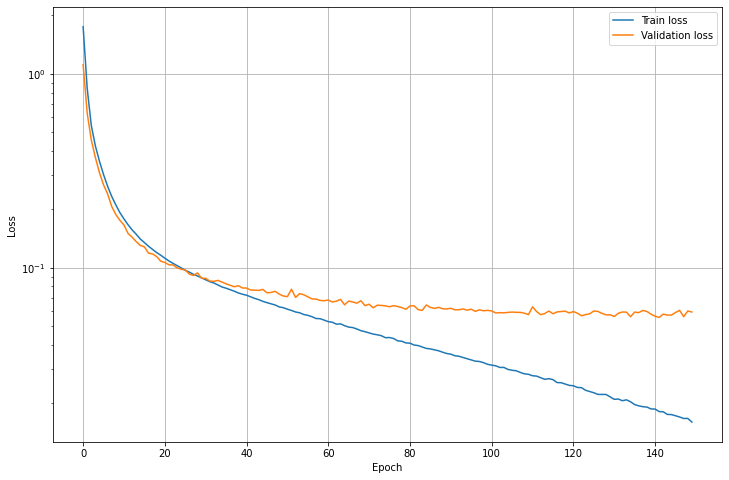

Network Initialized
--------------------
Iteration: 0
--------------------
Avg train loss: 2.2925028800964355
Avg Validation Loss: 2.255519151687622
--------------------
Iteration: 10
--------------------
Avg train loss: 0.5635288953781128
Avg Validation Loss: 0.5679786801338196
--------------------
Iteration: 20
--------------------
Avg train loss: 0.26303884387016296
Avg Validation Loss: 0.2738983929157257
--------------------
Iteration: 30
--------------------
Avg train loss: 0.17552953958511353
Avg Validation Loss: 0.18678545951843262
--------------------
Iteration: 40
--------------------
Avg train loss: 0.1325620412826538
Avg Validation Loss: 0.14618366956710815
--------------------
Iteration: 50
--------------------
Avg train loss: 0.10617723315954208
Avg Validation Loss: 0.12282225489616394
--------------------
Iteration: 60
--------------------
Avg train loss: 0.08828086405992508
Avg Validation Loss: 0.1078748106956482
--------------------
Iteration: 70
--------------------
Av

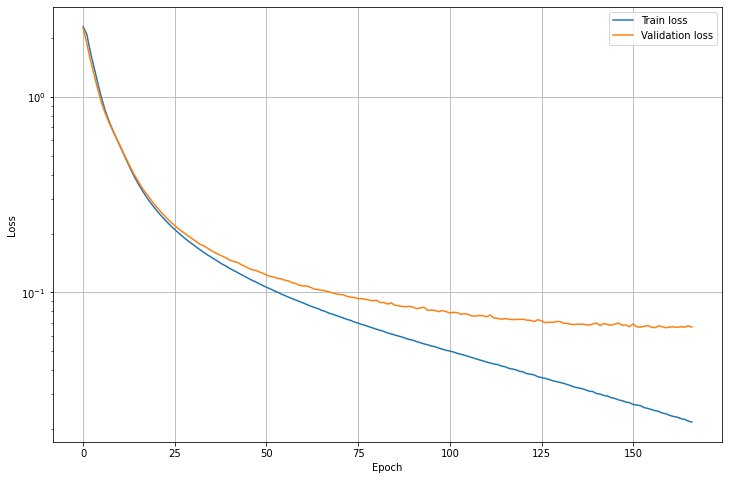

Network Initialized
--------------------
Iteration: 0
--------------------
Avg train loss: 2.2898452281951904
Avg Validation Loss: 2.2290093898773193
--------------------
Iteration: 10
--------------------
Avg train loss: 0.5945800542831421
Avg Validation Loss: 0.6010875105857849
--------------------
Iteration: 20
--------------------
Avg train loss: 0.2986016273498535
Avg Validation Loss: 0.3108671307563782
--------------------
Iteration: 30
--------------------
Avg train loss: 0.19726553559303284
Avg Validation Loss: 0.2077329158782959
--------------------
Iteration: 40
--------------------
Avg train loss: 0.148625448346138
Avg Validation Loss: 0.1607208102941513
--------------------
Iteration: 50
--------------------
Avg train loss: 0.11959119141101837
Avg Validation Loss: 0.13039445877075195
--------------------
Iteration: 60
--------------------
Avg train loss: 0.09986450523138046
Avg Validation Loss: 0.11301865428686142
--------------------
Iteration: 70
--------------------
Avg 

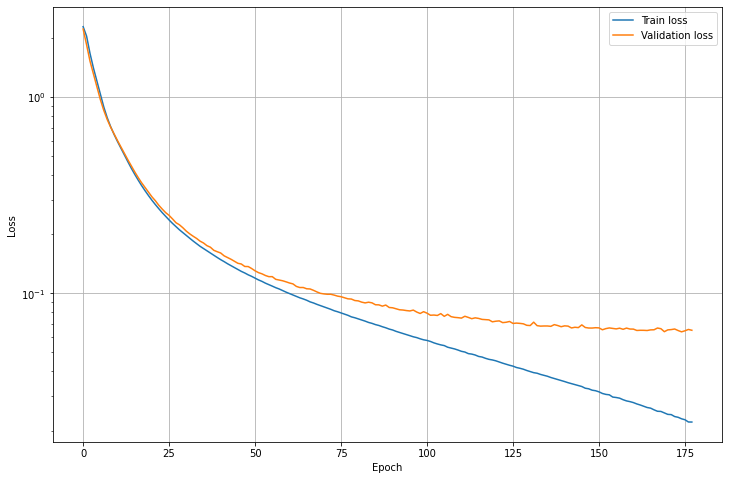

Network Initialized
--------------------
Iteration: 0
--------------------
Avg train loss: 2.069521427154541
Avg Validation Loss: 1.5023938417434692
--------------------
Iteration: 10
--------------------
Avg train loss: 0.20995183289051056
Avg Validation Loss: 0.20694927871227264
--------------------
Iteration: 20
--------------------
Avg train loss: 0.13818569481372833
Avg Validation Loss: 0.1480255275964737
--------------------
Iteration: 30
--------------------
Avg train loss: 0.10498304665088654
Avg Validation Loss: 0.11359921097755432
--------------------
Iteration: 40
--------------------
Avg train loss: 0.08444086462259293
Avg Validation Loss: 0.0962969958782196
--------------------
Iteration: 50
--------------------
Avg train loss: 0.0710497722029686
Avg Validation Loss: 0.08572659641504288
--------------------
Iteration: 60
--------------------
Avg train loss: 0.06023821979761124
Avg Validation Loss: 0.07871510833501816
--------------------
Iteration: 70
--------------------


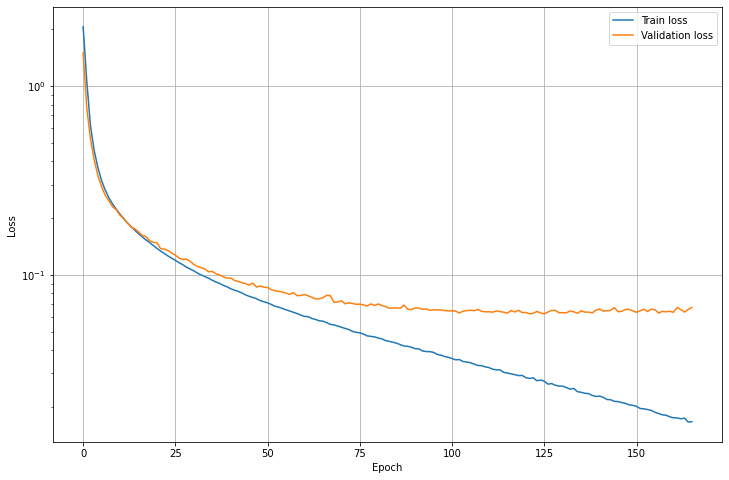

Network Initialized
--------------------
Iteration: 0
--------------------
Avg train loss: 1.9115722179412842
Avg Validation Loss: 1.1973658800125122
--------------------
Iteration: 10
--------------------
Avg train loss: 0.20799125730991364
Avg Validation Loss: 0.20421741902828217
--------------------
Iteration: 20
--------------------
Avg train loss: 0.133737251162529
Avg Validation Loss: 0.1366087943315506
--------------------
Iteration: 30
--------------------
Avg train loss: 0.10044381022453308
Avg Validation Loss: 0.10629207640886307
--------------------
Iteration: 40
--------------------
Avg train loss: 0.08165339380502701
Avg Validation Loss: 0.09561532735824585
--------------------
Iteration: 50
--------------------
Avg train loss: 0.06882790476083755
Avg Validation Loss: 0.08321952074766159
--------------------
Iteration: 60
--------------------
Avg train loss: 0.05942944064736366
Avg Validation Loss: 0.0803978368639946
--------------------
Iteration: 70
--------------------


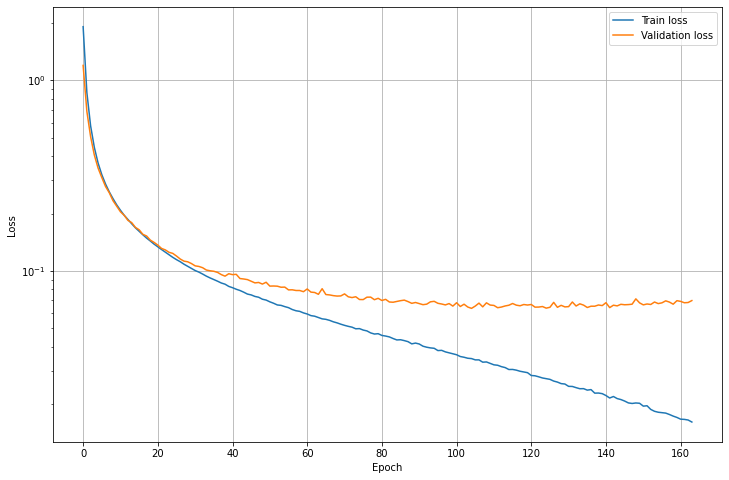

Network Initialized
--------------------
Iteration: 0
--------------------
Avg train loss: 1.9205869436264038
Avg Validation Loss: 1.094567060470581
--------------------
Iteration: 10
--------------------
Avg train loss: 0.20212630927562714
Avg Validation Loss: 0.20582695305347443
--------------------
Iteration: 20
--------------------
Avg train loss: 0.13485415279865265
Avg Validation Loss: 0.14518313109874725
--------------------
Iteration: 30
--------------------
Avg train loss: 0.1040189117193222
Avg Validation Loss: 0.11567345261573792
--------------------
Iteration: 40
--------------------
Avg train loss: 0.085050068795681
Avg Validation Loss: 0.1056978702545166
--------------------
Iteration: 50
--------------------
Avg train loss: 0.07118477672338486
Avg Validation Loss: 0.09171412140130997
--------------------
Iteration: 60
--------------------
Avg train loss: 0.06173063442111015
Avg Validation Loss: 0.08434178680181503
--------------------
Iteration: 70
--------------------
A

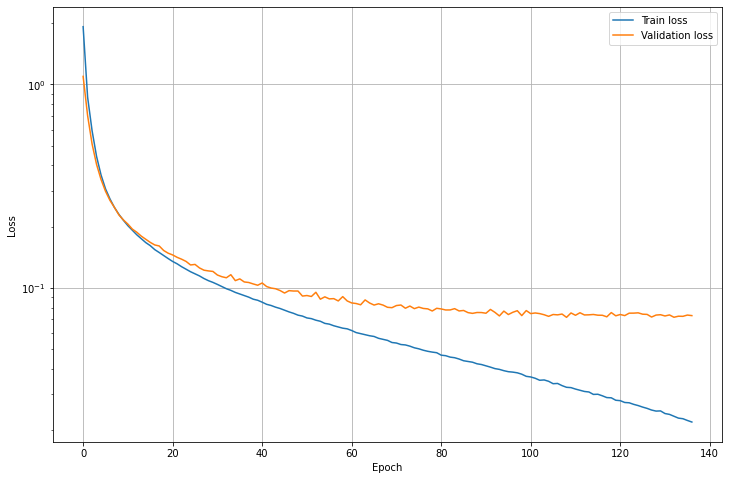

Network Initialized
--------------------
Iteration: 0
--------------------
Avg train loss: 2.005718469619751
Avg Validation Loss: 1.2036466598510742
--------------------
Iteration: 10
--------------------
Avg train loss: 0.2778131067752838
Avg Validation Loss: 0.28924083709716797
--------------------
Iteration: 20
--------------------
Avg train loss: 0.17573785781860352
Avg Validation Loss: 0.192096546292305
--------------------
Iteration: 30
--------------------
Avg train loss: 0.13131655752658844
Avg Validation Loss: 0.1504252403974533
--------------------
Iteration: 40
--------------------
Avg train loss: 0.1044907420873642
Avg Validation Loss: 0.12067537754774094
--------------------
Iteration: 50
--------------------
Avg train loss: 0.08830536156892776
Avg Validation Loss: 0.10863193869590759
--------------------
Iteration: 60
--------------------
Avg train loss: 0.0758381187915802
Avg Validation Loss: 0.0972268357872963
--------------------
Iteration: 70
--------------------
Avg 

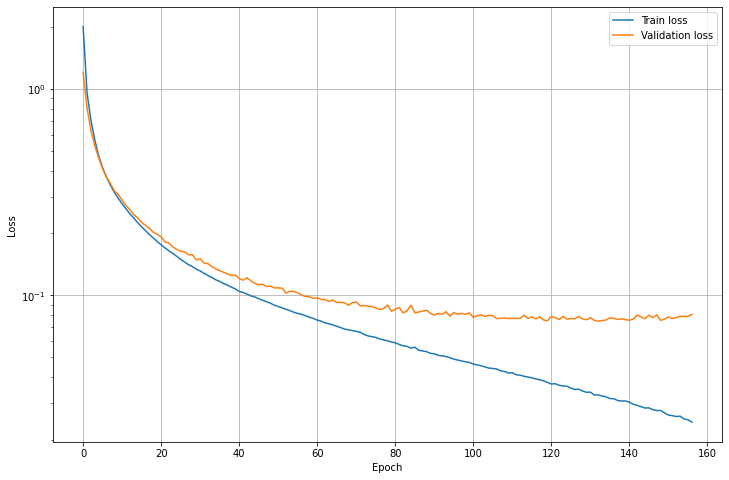

Network Initialized
--------------------
Iteration: 0
--------------------
Avg train loss: 1.9142884016036987
Avg Validation Loss: 1.0787748098373413
--------------------
Iteration: 10
--------------------
Avg train loss: 0.22940082848072052
Avg Validation Loss: 0.2467745989561081
--------------------
Iteration: 20
--------------------
Avg train loss: 0.14707233011722565
Avg Validation Loss: 0.17233331501483917
--------------------
Iteration: 30
--------------------
Avg train loss: 0.11260581016540527
Avg Validation Loss: 0.1362018585205078
--------------------
Iteration: 40
--------------------
Avg train loss: 0.09211286157369614
Avg Validation Loss: 0.1166389212012291
--------------------
Iteration: 50
--------------------
Avg train loss: 0.07791672646999359
Avg Validation Loss: 0.10600336641073227
--------------------
Iteration: 60
--------------------
Avg train loss: 0.06708978861570358
Avg Validation Loss: 0.09465557336807251
--------------------
Iteration: 70
--------------------

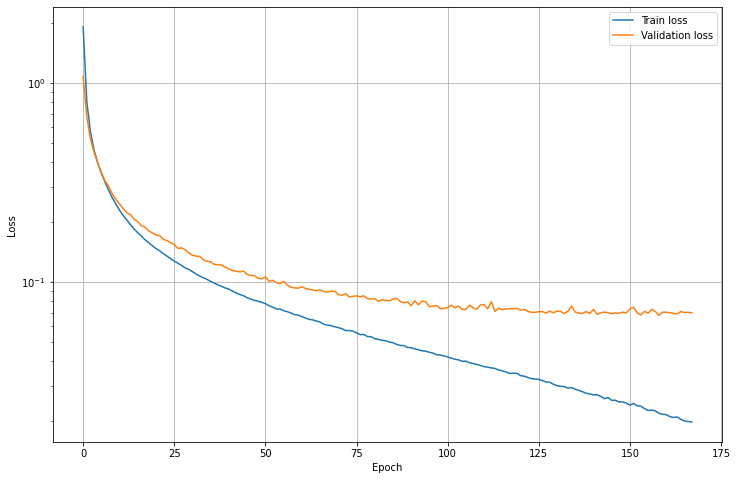

Network Initialized
--------------------
Iteration: 0
--------------------
Avg train loss: 2.05039381980896
Avg Validation Loss: 1.3184617757797241
--------------------
Iteration: 10
--------------------
Avg train loss: 0.24278049170970917
Avg Validation Loss: 0.2624870538711548
--------------------
Iteration: 20
--------------------
Avg train loss: 0.1540374755859375
Avg Validation Loss: 0.17732040584087372
--------------------
Iteration: 30
--------------------
Avg train loss: 0.11998651921749115
Avg Validation Loss: 0.1420847326517105
--------------------
Iteration: 40
--------------------
Avg train loss: 0.10070392489433289
Avg Validation Loss: 0.12291428446769714
--------------------
Iteration: 50
--------------------
Avg train loss: 0.08700620383024216
Avg Validation Loss: 0.1104215756058693
--------------------
Iteration: 60
--------------------
Avg train loss: 0.07541588693857193
Avg Validation Loss: 0.09829490631818771
--------------------
Iteration: 70
--------------------
Av

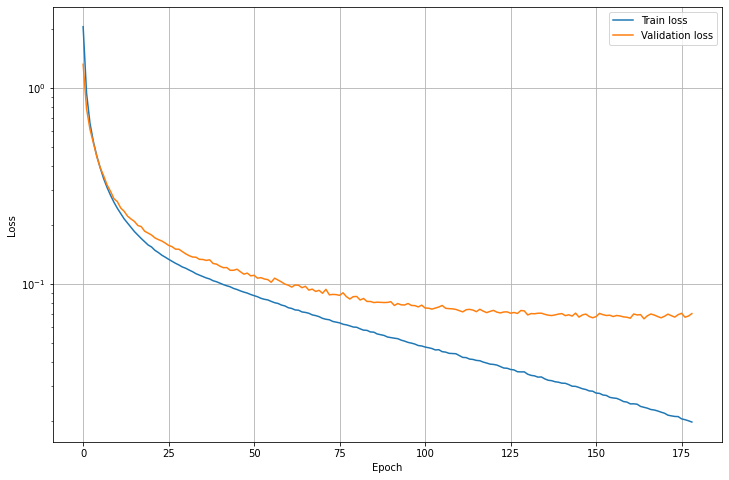

Network Initialized
--------------------
Iteration: 0
--------------------
Avg train loss: 1.7993590831756592
Avg Validation Loss: 1.1027940511703491
--------------------
Iteration: 10
--------------------
Avg train loss: 0.17082300782203674
Avg Validation Loss: 0.1792163848876953
--------------------
Iteration: 20
--------------------
Avg train loss: 0.11565283685922623
Avg Validation Loss: 0.12943817675113678
--------------------
Iteration: 30
--------------------
Avg train loss: 0.09146220982074738
Avg Validation Loss: 0.10746399313211441
--------------------
Iteration: 40
--------------------
Avg train loss: 0.07663130015134811
Avg Validation Loss: 0.09447604417800903
--------------------
Iteration: 50
--------------------
Avg train loss: 0.06620476394891739
Avg Validation Loss: 0.08754143863916397
--------------------
Iteration: 60
--------------------
Avg train loss: 0.05779406428337097
Avg Validation Loss: 0.08376235514879227
--------------------
Iteration: 70
------------------

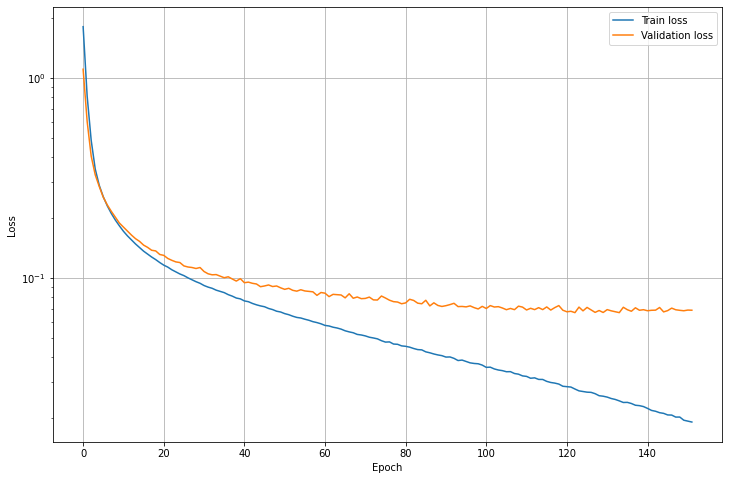

Network Initialized
--------------------
Iteration: 0
--------------------
Avg train loss: 1.819535732269287
Avg Validation Loss: 1.1746723651885986
--------------------
Iteration: 10
--------------------
Avg train loss: 0.16712036728858948
Avg Validation Loss: 0.1736506223678589
--------------------
Iteration: 20
--------------------
Avg train loss: 0.11114229261875153
Avg Validation Loss: 0.12627454102039337
--------------------
Iteration: 30
--------------------
Avg train loss: 0.08619572222232819
Avg Validation Loss: 0.10722269862890244
--------------------
Iteration: 40
--------------------
Avg train loss: 0.07210956513881683
Avg Validation Loss: 0.09608497470617294
--------------------
Iteration: 50
--------------------
Avg train loss: 0.06197104975581169
Avg Validation Loss: 0.08915910869836807
--------------------
Iteration: 60
--------------------
Avg train loss: 0.05417761579155922
Avg Validation Loss: 0.08272723853588104
--------------------
Iteration: 70
-------------------

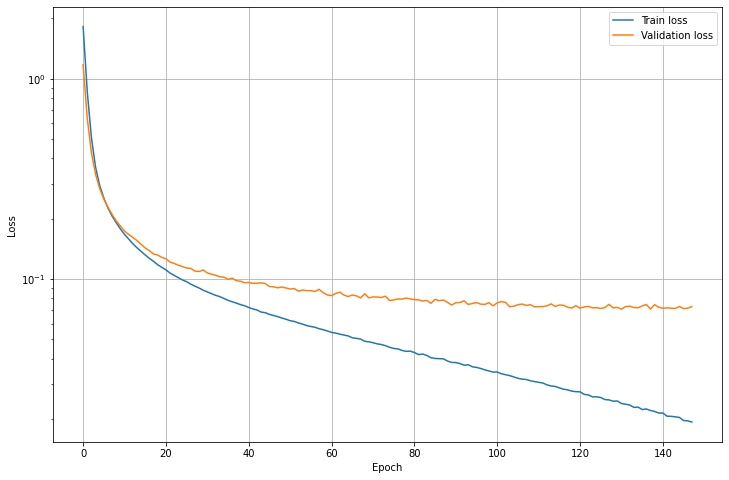

Network Initialized
--------------------
Iteration: 0
--------------------
Avg train loss: 2.28926420211792
Avg Validation Loss: 2.2538020610809326
--------------------
Iteration: 10
--------------------
Avg train loss: 0.5341451168060303
Avg Validation Loss: 0.4506058692932129
--------------------
Iteration: 20
--------------------
Avg train loss: 0.2618420124053955
Avg Validation Loss: 0.2107803374528885
--------------------
Iteration: 30
--------------------
Avg train loss: 0.1769324243068695
Avg Validation Loss: 0.14890950918197632
--------------------
Iteration: 40
--------------------
Avg train loss: 0.13400211930274963
Avg Validation Loss: 0.11790937930345535
--------------------
Iteration: 50
--------------------
Avg train loss: 0.10804113745689392
Avg Validation Loss: 0.10046843439340591
--------------------
Iteration: 60
--------------------
Avg train loss: 0.09020524471998215
Avg Validation Loss: 0.08929527550935745
--------------------
Iteration: 70
--------------------
Avg

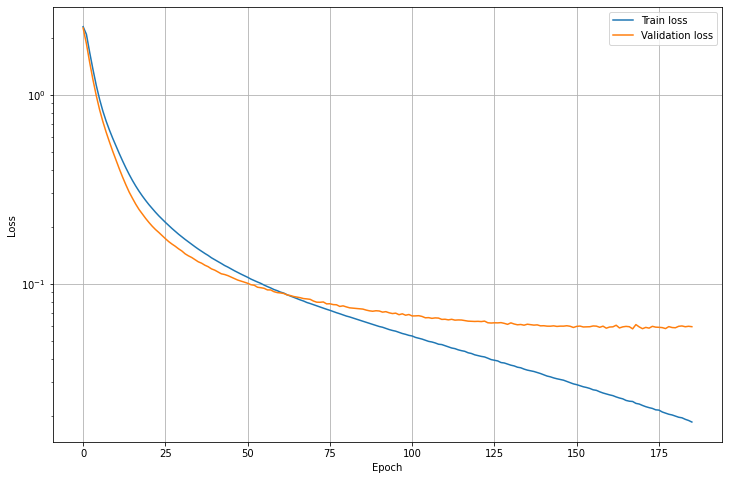

Network Initialized
--------------------
Iteration: 0
--------------------
Avg train loss: 2.2838029861450195
Avg Validation Loss: 2.2332215309143066
--------------------
Iteration: 10
--------------------
Avg train loss: 0.44442328810691833
Avg Validation Loss: 0.37157273292541504
--------------------
Iteration: 20
--------------------
Avg train loss: 0.21738936007022858
Avg Validation Loss: 0.1819492131471634
--------------------
Iteration: 30
--------------------
Avg train loss: 0.15731573104858398
Avg Validation Loss: 0.13602067530155182
--------------------
Iteration: 40
--------------------
Avg train loss: 0.12546685338020325
Avg Validation Loss: 0.11449658125638962
--------------------
Iteration: 50
--------------------
Avg train loss: 0.10454960912466049
Avg Validation Loss: 0.09872230142354965
--------------------
Iteration: 60
--------------------
Avg train loss: 0.08888109028339386
Avg Validation Loss: 0.08892542123794556
--------------------
Iteration: 70
------------------

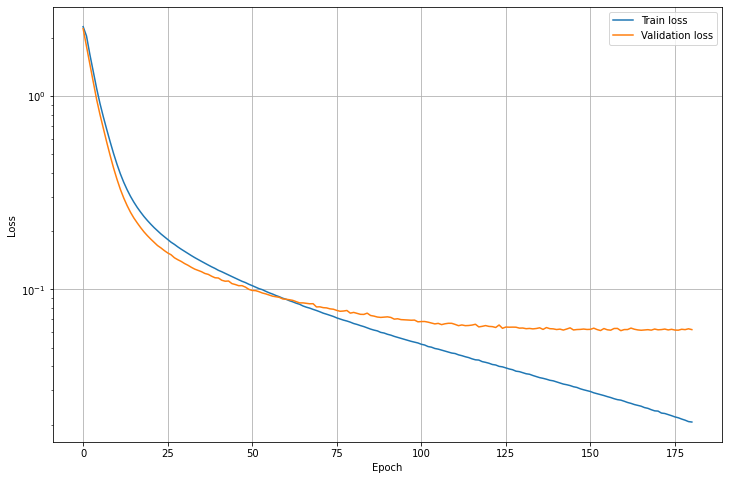

In [ ]:
n_eph=300
train_losses_CNN=[]
val_losses_CNN=[]
kf=KFold(n_splits=10)
Ch1=10
Ch2=32
i=0
itr=0
# List of dictionaries containing the model information in order to retrieve them
# for the testing phase
Models_CNN=[]
for train, val in kf.split(train_dataset):
  for opt in range(2):
    # Net requires an act_h input, which specificies the desired activation function for the hidden layers
    # Si = Sigmoid()
    # Se = SELU()
    # Ge = GELU()
    # Lk = LeakyRelu()
    # SiL = SiLU()
    if i==0 or i==5:
      act_h='Lk'
    elif i==1 or i==6:
      act_h='Ge'
    elif i==2 or i==7:
      act_h='SiL'
    elif i==3 or i==8:
      act_h='Se'
    elif i==4 or i==9:
      act_h='Si' 
    netCNN=NetCNN(No, Ch1, Ch2, act_h)
    netCNN.to(device)

    # The idea behind this step is that by increasing the number of hidden units, I should require more
    # sensible changes in the learning rate, and by decreasing that number I should require stronger changes
    if opt==0:
      optimizer=optim.Adam(netCNN.parameters(), lr=1e-4, weight_decay=1e-6)
      op="Adam"
    elif opt==1:
      optimizer=optim.AdamW(netCNN.parameters(), lr=1e-4, weight_decay=1e-6)
      op="AdamW"

    # Consider the definition of a scheduler for the dynamic adaptation of the learning rate
    
    Model={"Channel1":Ch1,
          "Channel2":Ch2,
          "Activation":act_h,
          "Optimizer":op}
    Models_CNN.append(Model)

    # Conversion of the given dataset to Tensors
    Train_kf=DataLoader([train_dataset[x] for x in train], batch_size=256, shuffle=True, num_workers=0)
    Val_kf=DataLoader([train_dataset[x] for x in val], batch_size=256, shuffle=False, num_workers=0)

    train_loss_log=[]
    val_loss_log=[]
    for eph in range(n_eph):
      if (eph%10==0.):
        print("--------------------")
        print("Iteration: "+str(eph))
        print("--------------------")

      # Training phase
      netCNN.train()
      Train_Loss_eph=[]
      for sample_data, sample_label in Train_kf:
        sample_data=sample_data.to(device)
        sample_labels=sample_label.to(device)

        Out=netCNN(sample_data)
        Loss=Loss_Function(Out,sample_labels)

        # Backpropagation step
        netCNN.zero_grad()
        Loss.backward()
        optimizer.step()

        # Saving the loss for the epoch
        loss_batch=Loss.detach().cpu().numpy()
        Train_Loss_eph.append(loss_batch)
    
      # Statistics of the training sample loss
      tr_mean=np.mean(Train_Loss_eph)
      tr_std=np.std(Train_Loss_eph)
      if (eph%10)==0.:
        print(f"Avg train loss: {tr_mean}")
      train_loss_log.append(tr_mean)

      # Validation phase
      netCNN.eval()
      Val_Loss_eph=[]
      with torch.no_grad():
        for sample in Val_kf:
          val_data=sample[0].to(device)
          val_labels=sample[1].to(device)

          Out_val=netCNN(val_data)
          Loss=Loss_Function(Out_val, val_labels)

          loss_batch=Loss.detach().cpu().numpy()
    
          Val_Loss_eph.append(loss_batch)

      # Statistics of the validation sample loss
      vl_mean=np.mean(Val_Loss_eph)
      if (eph%10)==0.:
        print(f"Avg Validation Loss: {vl_mean}")
      val_loss_log.append(vl_mean)

      # Early stop condition
      # If the validation loss is increasing, the defined ratio returns an increasing scale
      # Try to define the same ratio preventing exploding ratio of validation scores
      # use exp(val(end)/val(end-1))
      if (eph>50 and (val_loss_log[eph-1]/val_loss_log[eph-2])>1) and vl_mean>(tr_mean+tr_std*1.5*np.exp(val_loss_log[eph-1]/val_loss_log[eph-2])):
        print("Early Stop condition: SATISFIED!")
        break

    train_losses_CNN.append(train_loss_log)
    val_losses_CNN.append(val_loss_log)

    # Saving the model in a dedicated file
    net_state_dict=netCNN.state_dict()
    optim_state_dict=optimizer.state_dict()
    # Save the state dict to a file
    name1='net_parameters_CNN_'+str(itr)+'.torch'
    name2='net_optimizer_CNN_'+str(itr)+'.torch'
    torch.save(net_state_dict, name1)
    torch.save(optim_state_dict,name2)

    # Plot losses
    plt.figure(figsize=(12,8))
    plt.semilogy(train_loss_log, label='Train loss')
    plt.semilogy(val_loss_log, label='Validation loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.grid()
    plt.legend()
    name3='Train-Val_Loss_CNN_'+str(itr)+'.png'
    plt.savefig(name3)
    plt.show()
    

    itr+=1

  i+=1

## Model Choice
Selection of the best model based on its performance on the validation set.

In [ ]:
# Definition of the best model based on some statistics on the val_losses list
# 10 different model are available for comparison
# Statistics: Mean and Std (based on the last 100 epochs - near convergence)
means_CNN=[]
for val in val_losses_CNN:
  mean=np.mean(val[-15:])
  means_CNN.append(mean)
top_CNN=np.copy(means_CNN)
top_CNN.sort()
BestModCNN_idx=[]
for score in top_CNN[:5]:
   BestModCNN_idx.append(means_CNN.index(score))

## Model Assessment on the Test Set

In [ ]:
Test_dt_unfl=DataLoader([(training_transf(test_dataset[x][0]), test_dataset[x][1]) for x in range(len(test_dataset))], batch_size=256, shuffle=False, num_workers=0)

In [ ]:
test_losses_CNN=[]
test_score_CNN=[]
for idx in BestModCNN_idx:
  test_loss=[]
  name_net='net_parameters_CNN_'+str(idx)+'.torch'
  name_opt='net_optimizer_CNN_'+str(idx)+'.torch'
  net=NetCNN(No,Models_CNN[idx]["Channel1"],Models_CNN[idx]["Channel2"],Models_CNN[idx]["Activation"])
  # loading parameters
  net_state=torch.load(name_net)
  net.load_state_dict(net_state)
  # loading optimizer
  opt_state=torch.load(name_opt)
  optimizer.load_state_dict(opt_state)
  net.to(device)

  # Evaluation on the test set
  with torch.no_grad():
    for sample in Test_dt_unfl:
      image=sample[0].to(device)
      label=sample[1].to(device)
    
      lb_out=net(image)
      Loss=Loss_Function(lb_out, label)
      loss_batch=Loss.detach().cpu().numpy()

      test_loss.append(loss_batch)

  test_mn=np.mean(test_loss)
  test_losses_CNN.append(test_mn)

  print("-------------------------")
  print("Test Loss (CNN model): "+str(test_mn))
  print("Model: ")
  print(Models_CNN[idx])
  print("Model Index: "+str(idx))
  print("-------------------------")